In [1]:
import json
from datetime import datetime

from datasets import load_dataset, Dataset
import numpy as np
import matplotlib.pyplot as plt

from process_data import *

/home/gabriel/miniconda3/envs/rome/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### AM-Deepseek-Distill

Features: ['question', 'answer', 'question_source', 'answer_source', 'category', 'ground_truth', 'test_case', 'instruction_constrain', 'pass_rate_r1', 'pass_rate_7b', 'pass_rate_1.5b', 'verify_score', 'ppl', 'model_name']
Number of samples: 1000
Sample: {
    "answer": "<think>Okay, let's tackle this problem step by step. So, we have a function f(x) = |x - a| - |x + b|, and we're told that its maximum value is 3. We need to find a + b for part (I), and then for part (II), given another function g(x) = -x\u00b2 - a x - b, we need to find the range of a such that g(x) < f(x) for all x \u2265 a. Alright, let's start with part (I).\n\nFirst, I remember that functions involving absolute values can often be analyzed by considering different cases based on the critical points where the expressions inside the absolute values change their sign. For |x - a|, the critical point is at x = a, and for |x + b|, the critical point is at x = -b. So, the function f(x) will have different expressions dep

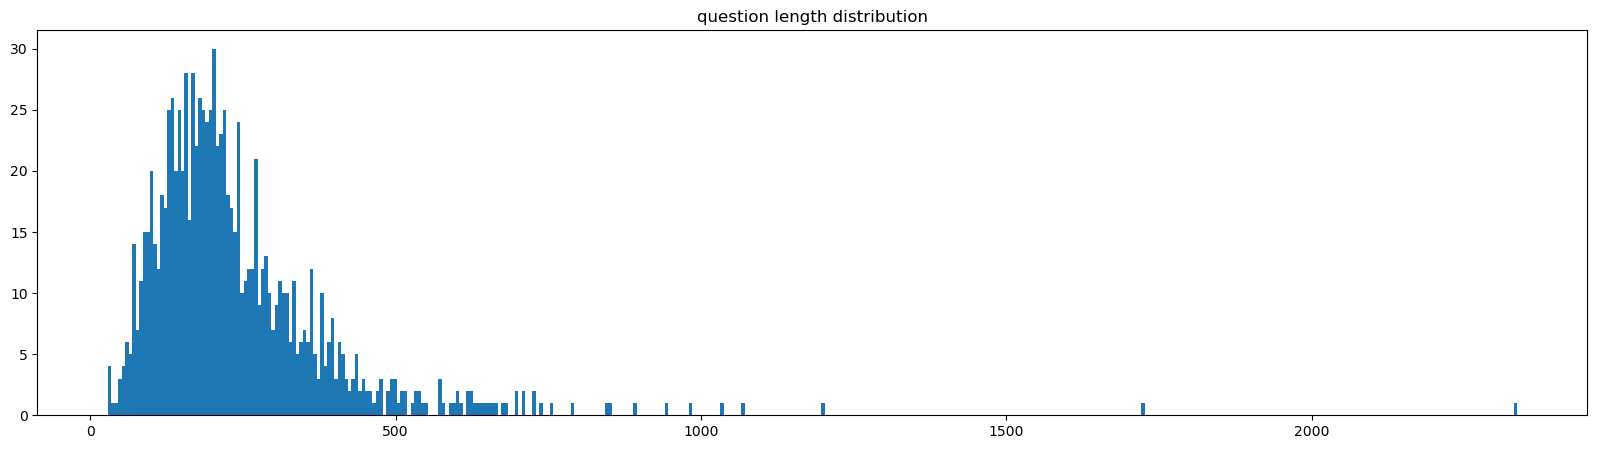

There are 1000 question.


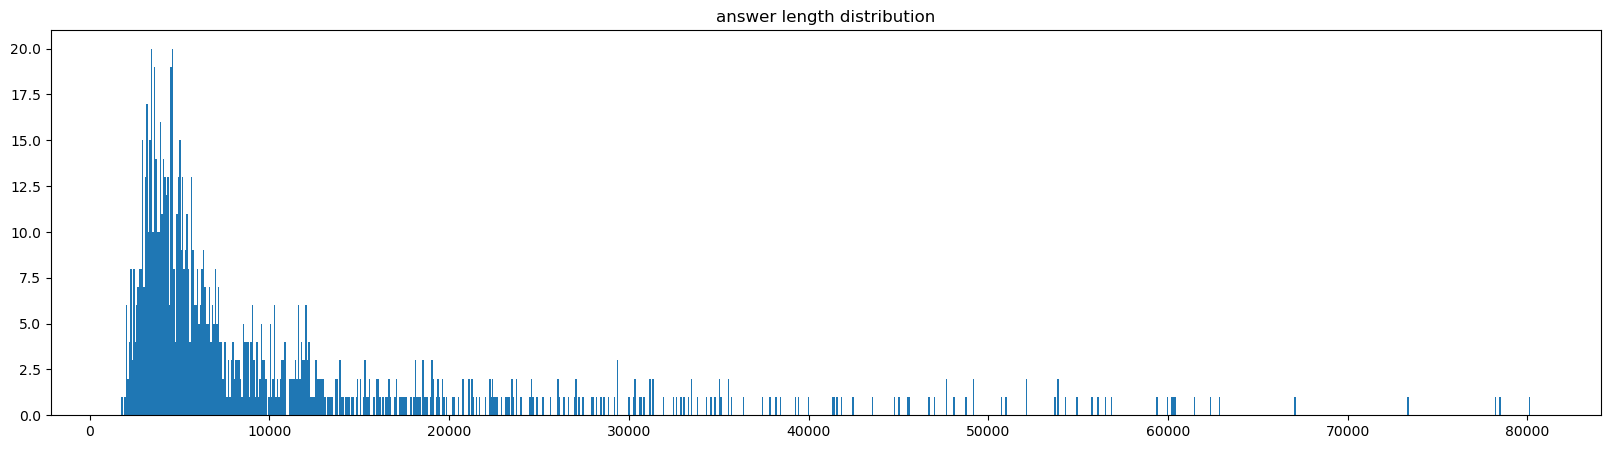

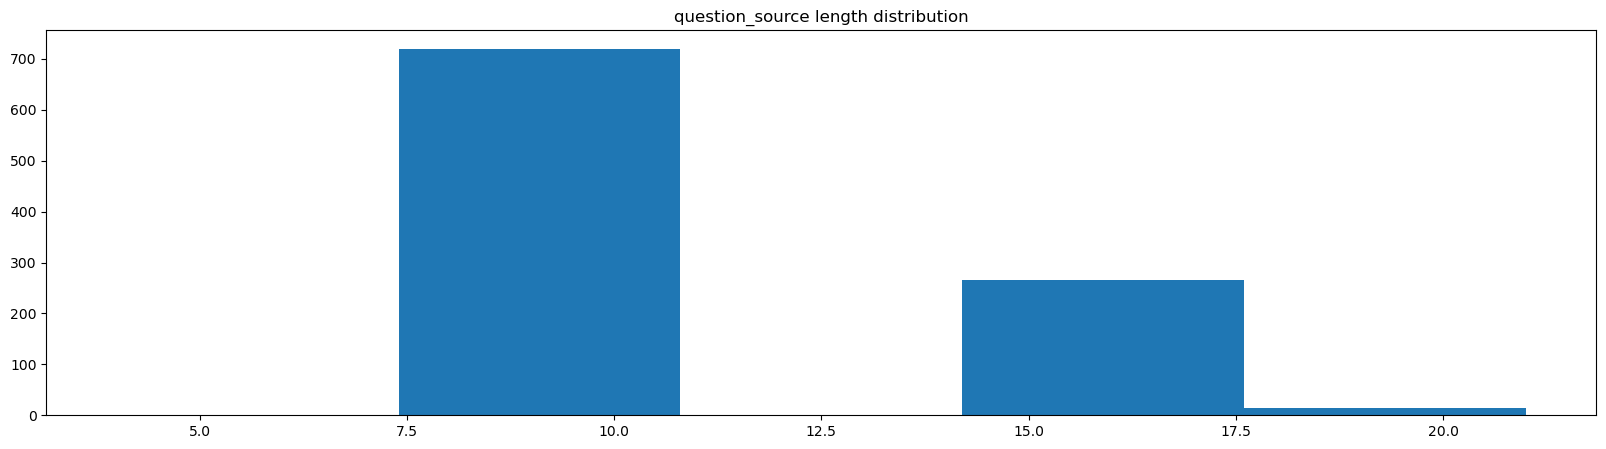

There are 6 question_source.


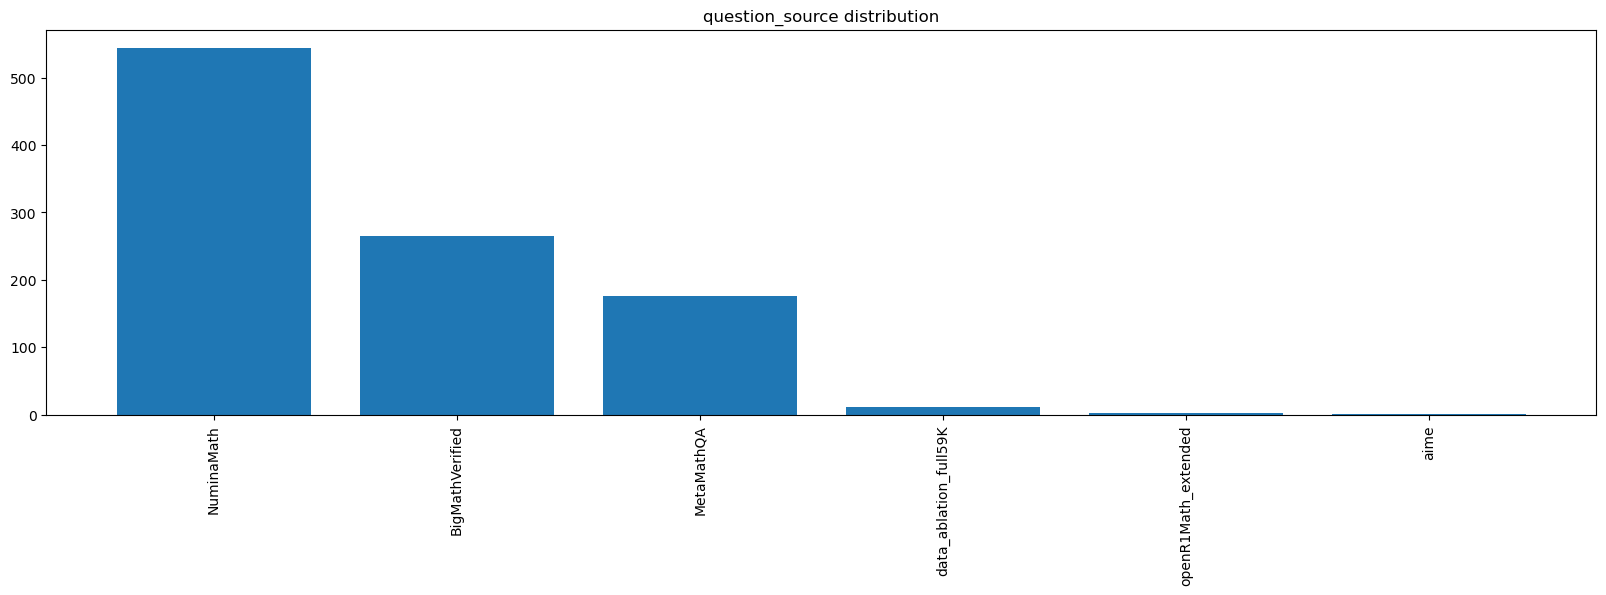

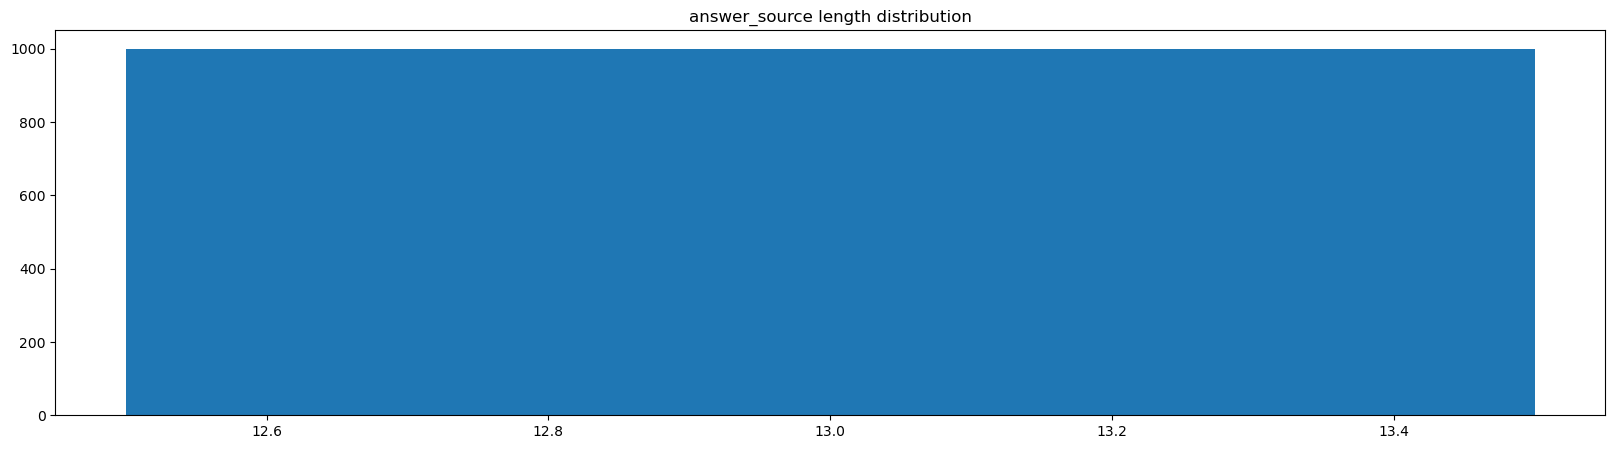

There are 1 answer_source.


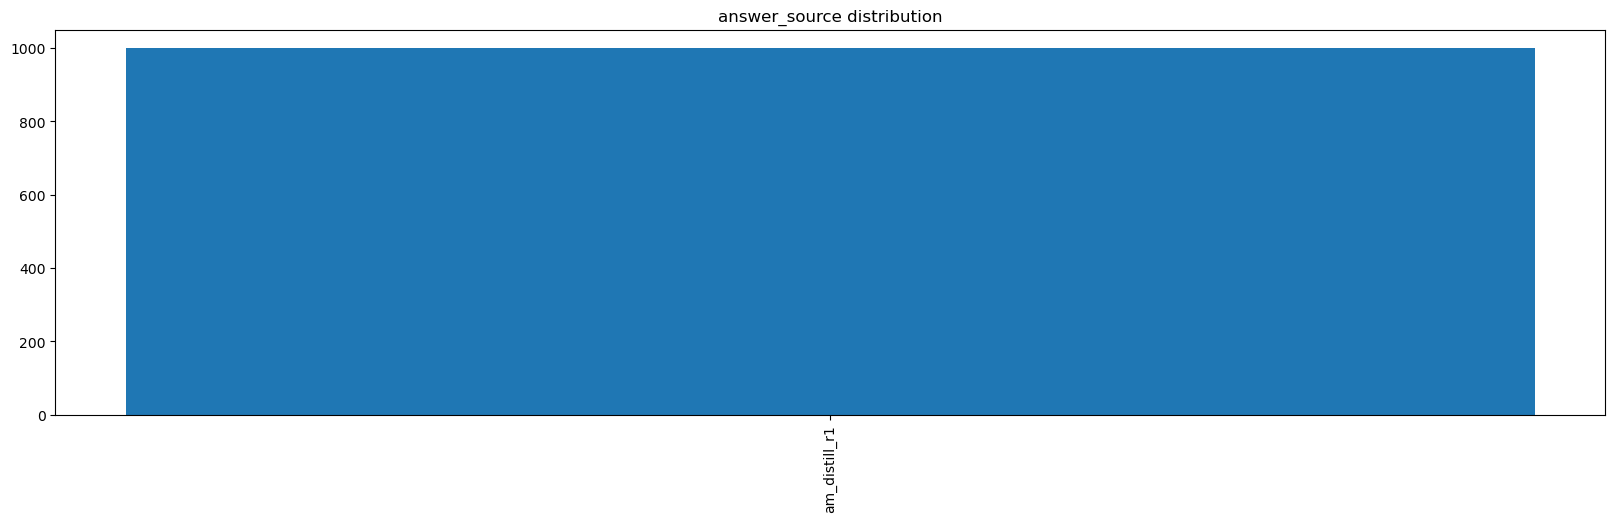

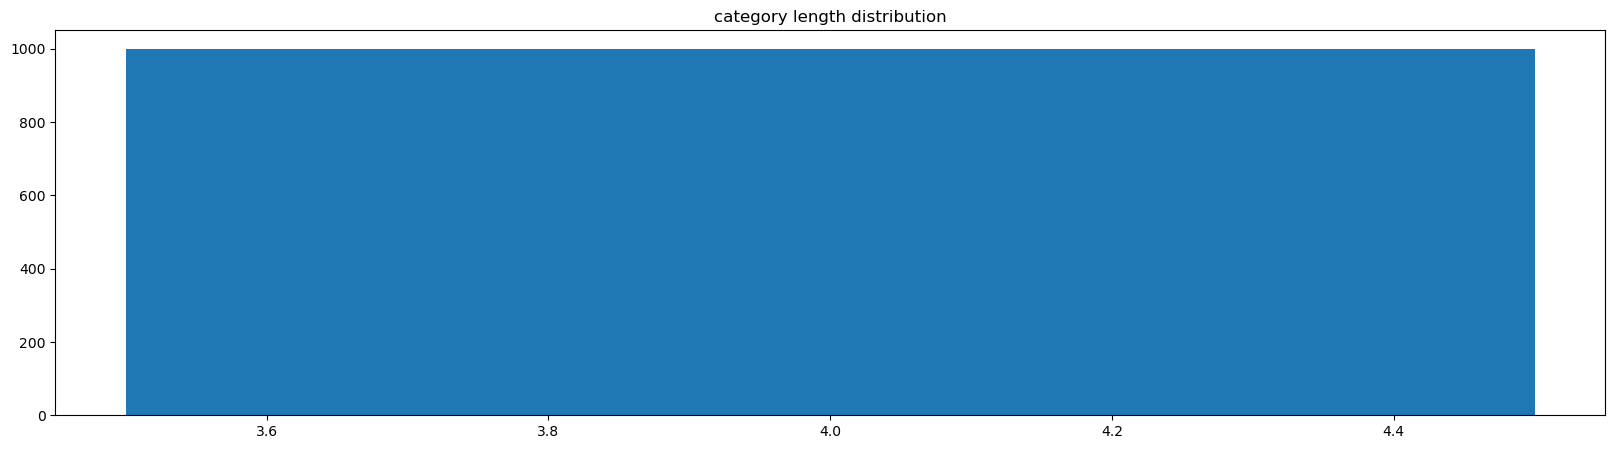

There are 1 category.


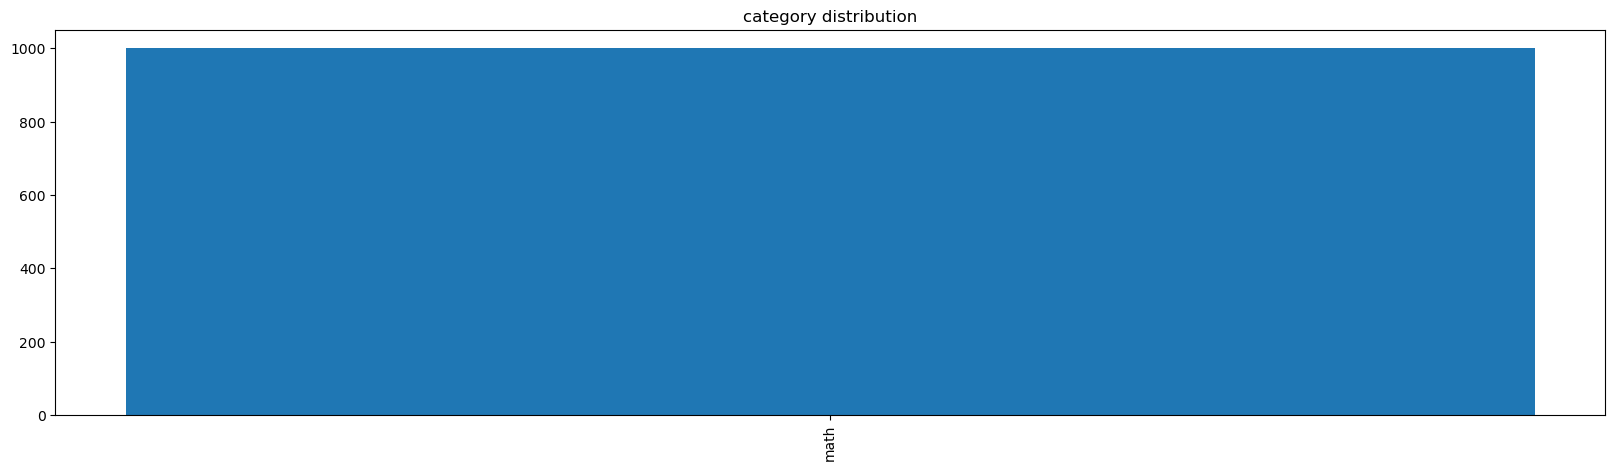

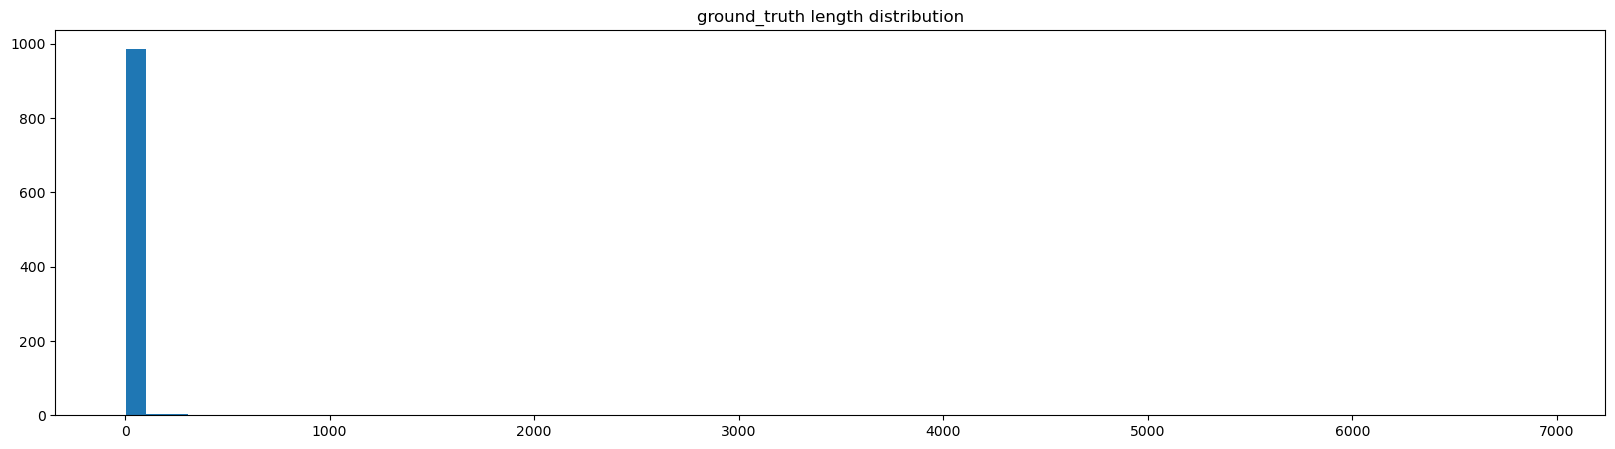

There are 610 ground_truth.
Number of 'None' test_case: 1000
Number of 'None' instruction_constrain: 1000


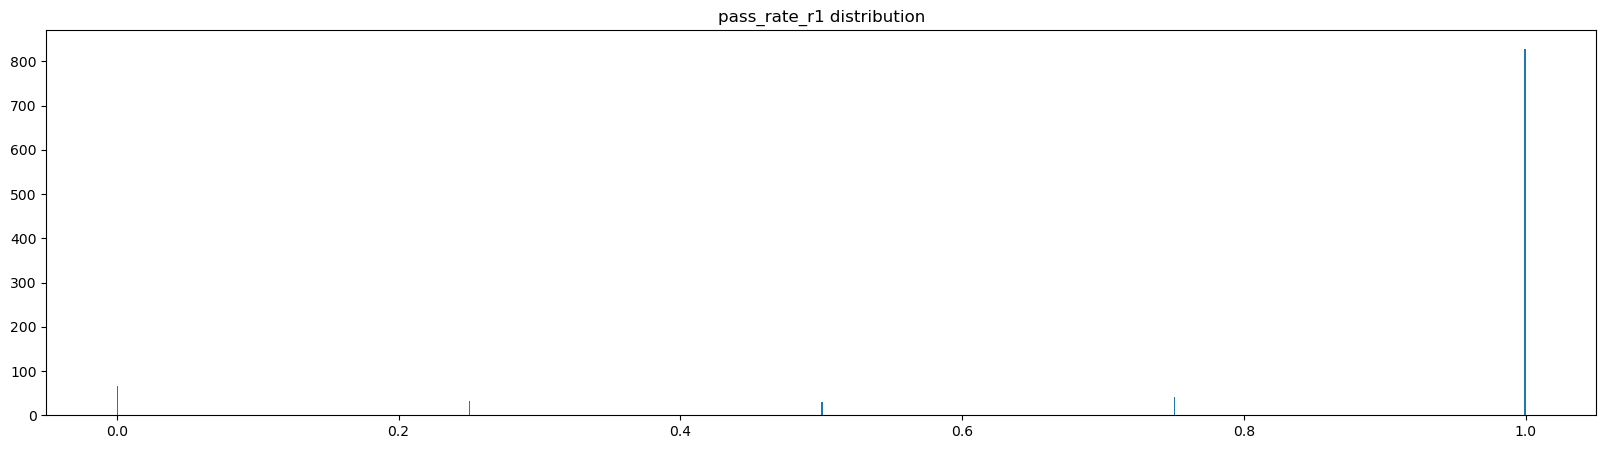

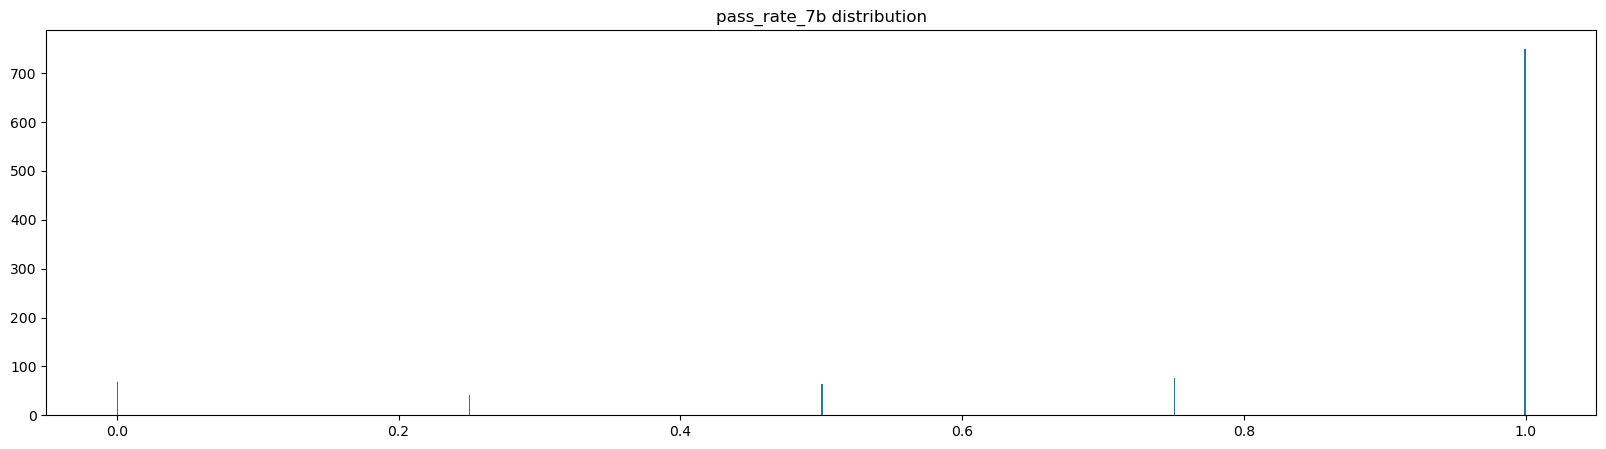

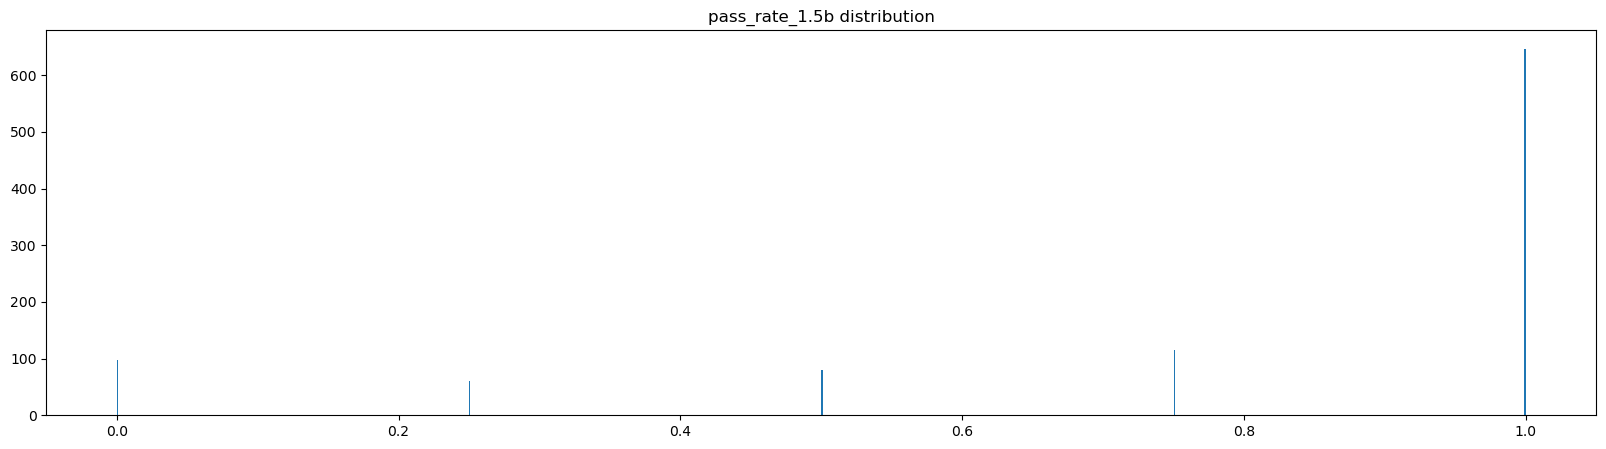

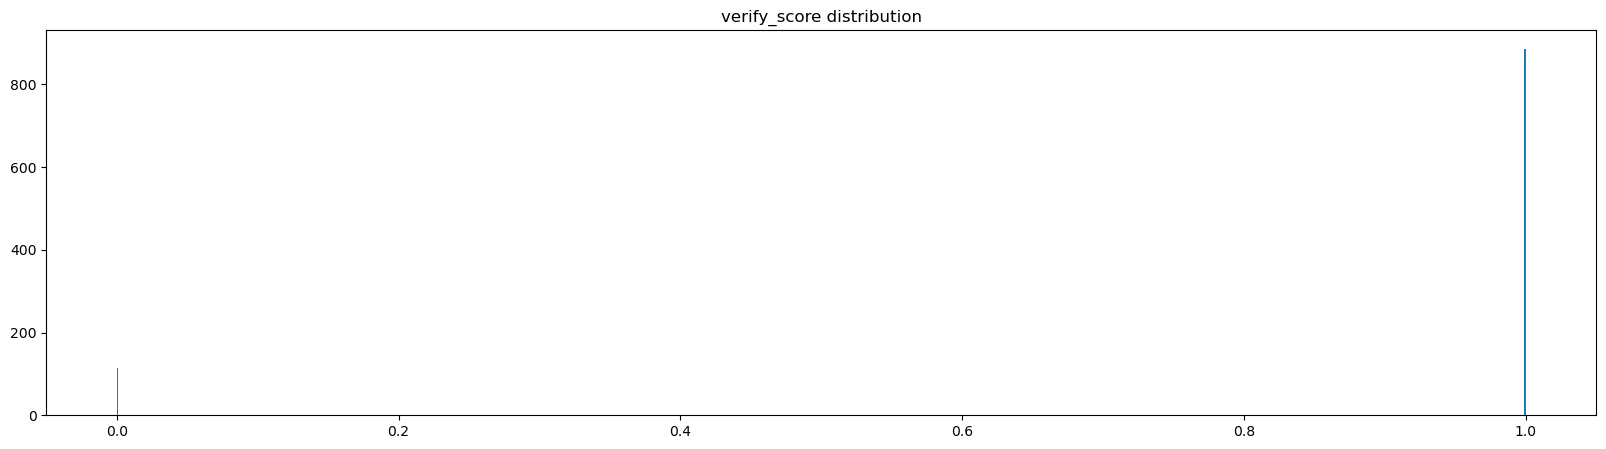

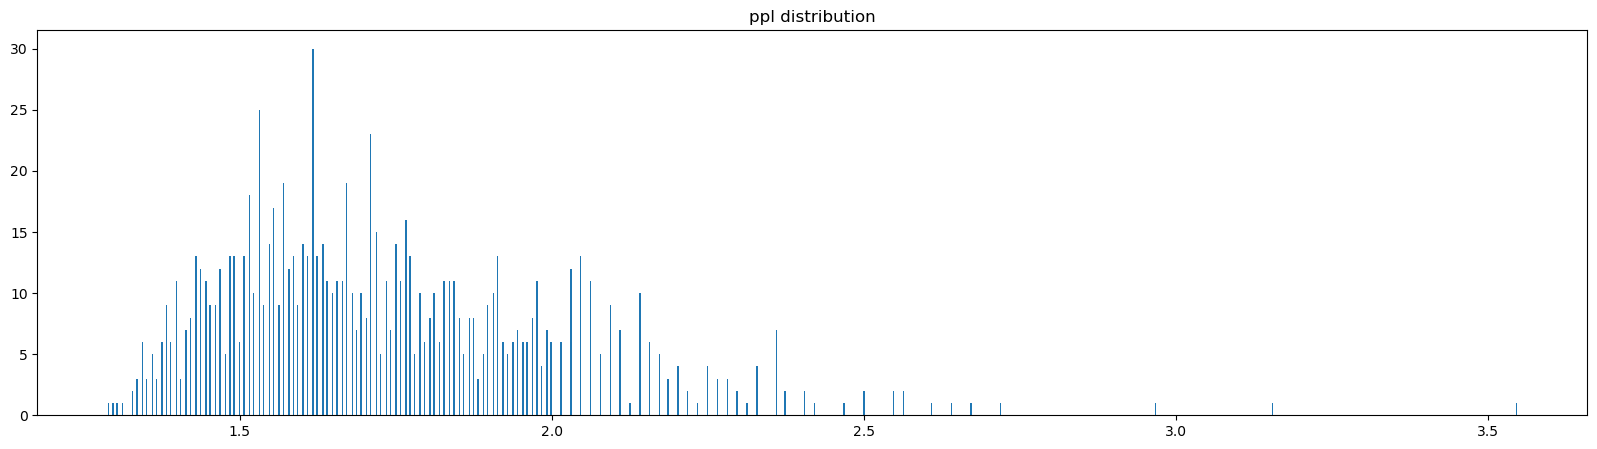

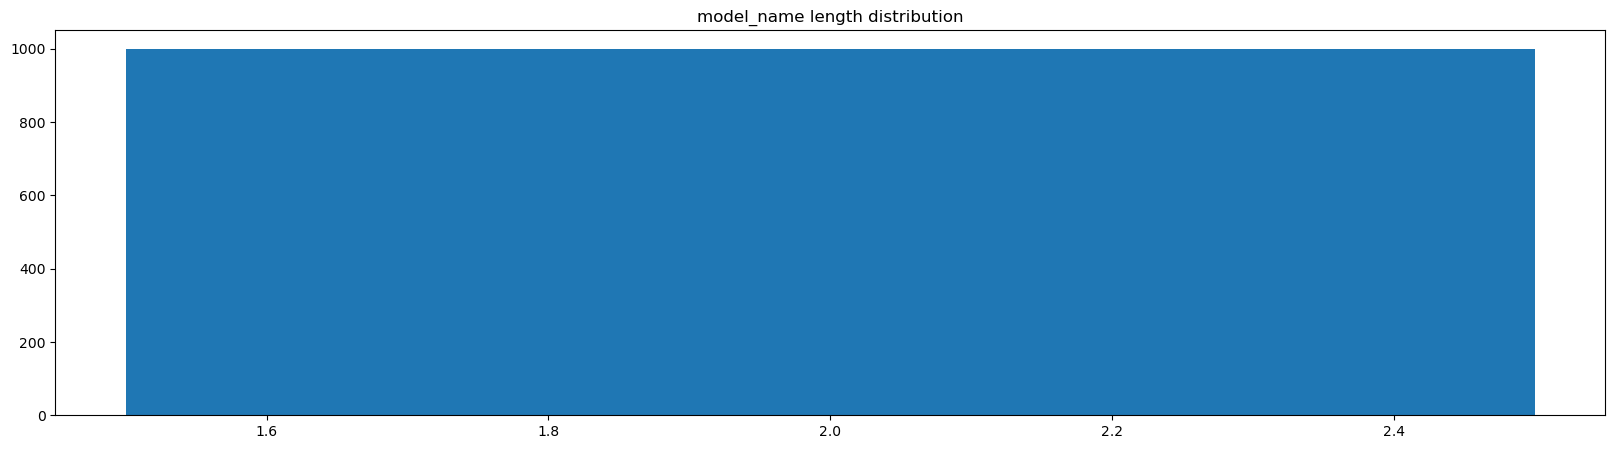

There are 1 model_name.


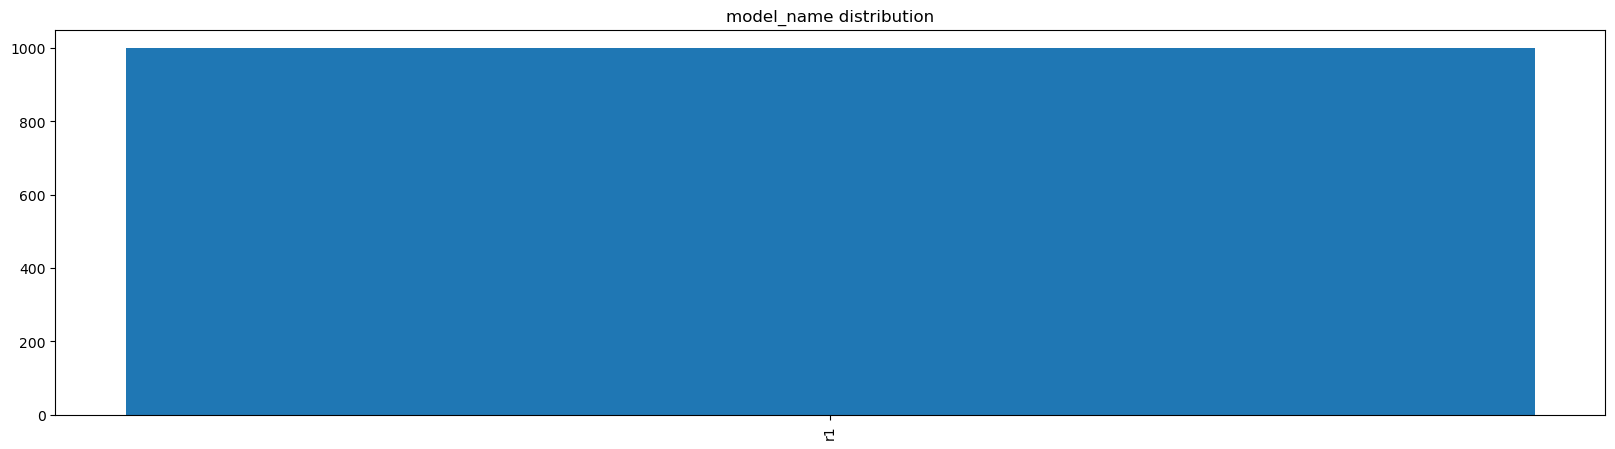

In [2]:
am_deepseek_distill = load_data("AM-DeepSeek-Distilled-40M").select(range(1000))
print_distributions(am_deepseek_distill, ['question', 'answer', 'question_source', 'answer_source', 'category', 'ground_truth', 'test_case', 'instruction_constrain', 'pass_rate_r1', 'pass_rate_7b', 'pass_rate_1.5b', 'verify_score', 'ppl', 'model_name'])

### BigMath

Features: ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate']
Number of samples: 1000
Sample: {
    "answer": "y = -3x + 2",
    "domain": [
        "Mathematics -> Calculus -> Differential Calculus -> Applications of Derivatives"
    ],
    "llama8b_solve_rate": 0.90625,
    "problem": "The equation of the tangent line to the curve $y=x^{3}-3x^{2}+1$ at the point $(1,-1)$ is __________.",
    "source": "cn_k12"
}


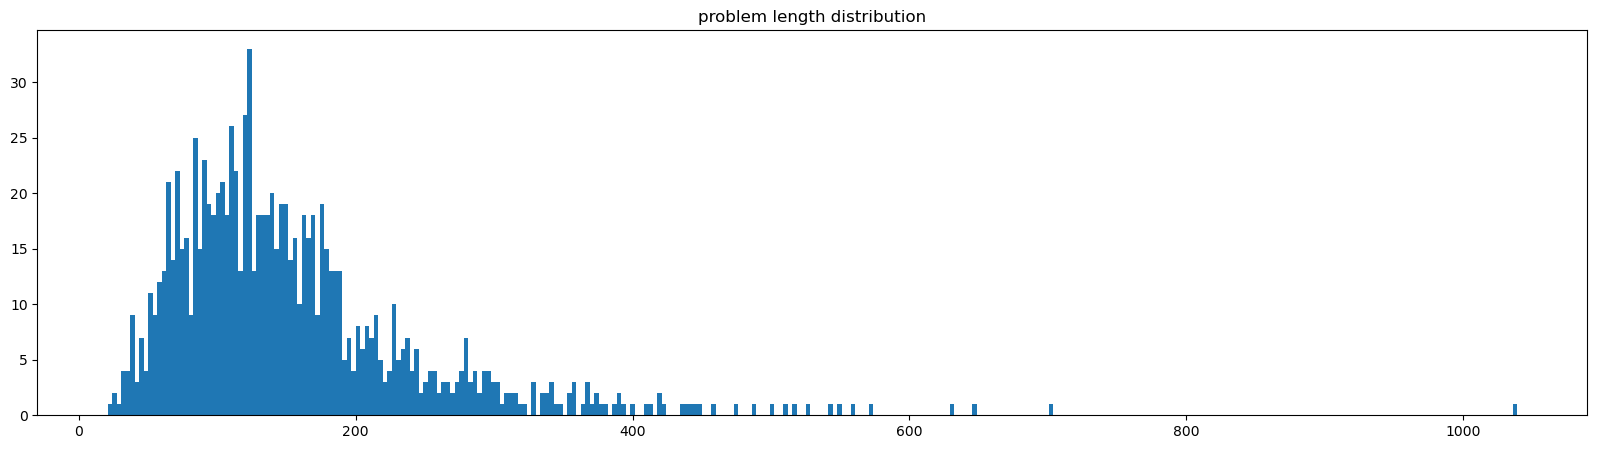

There are 1000 problem.


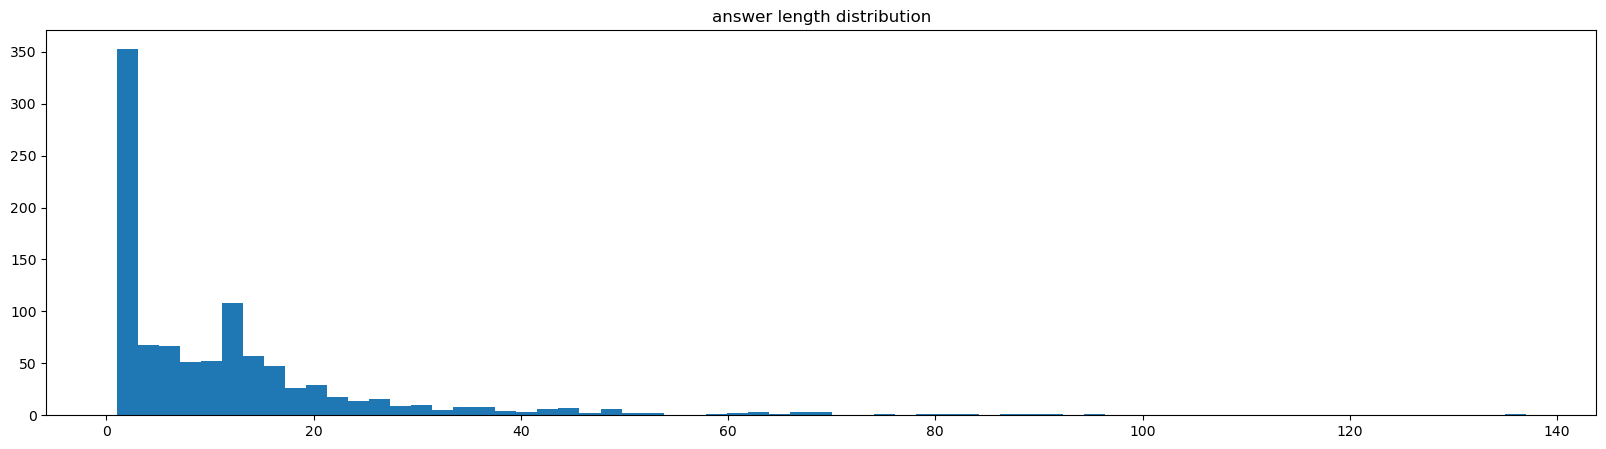

There are 701 answer.


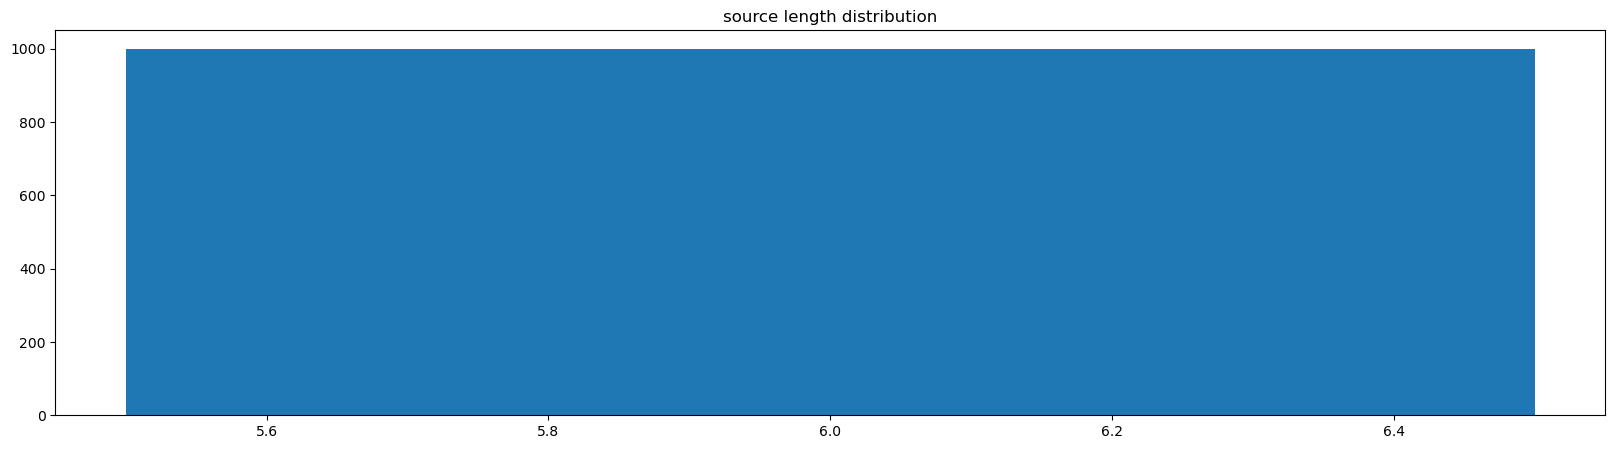

There are 1 source.


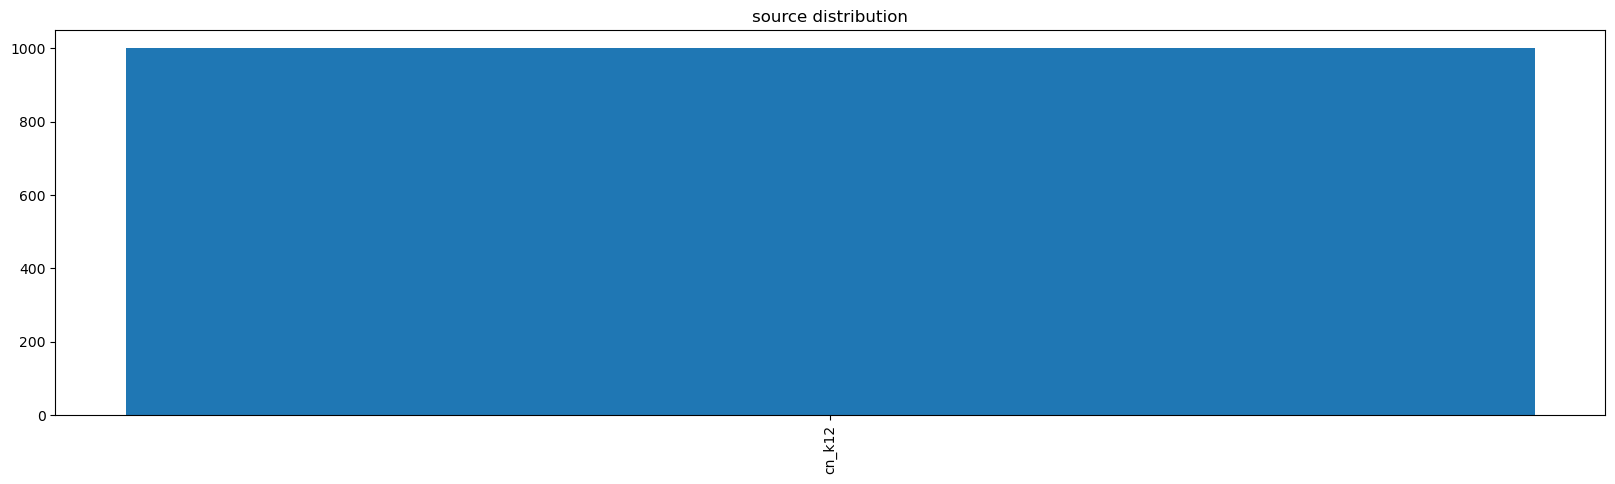

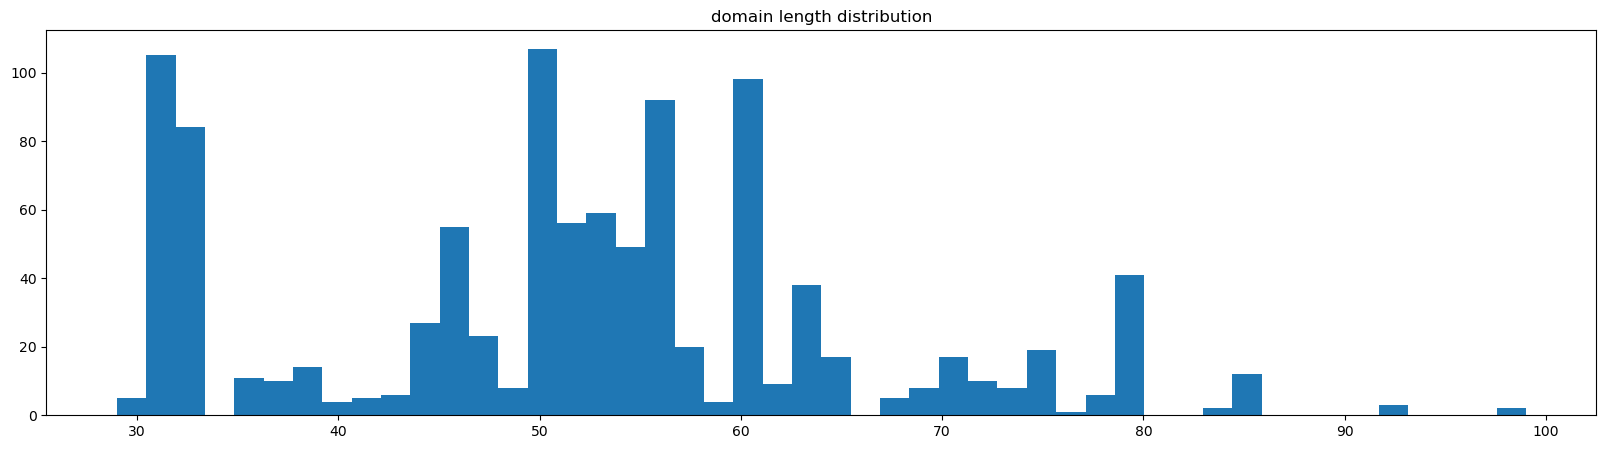

There are 109 domain.


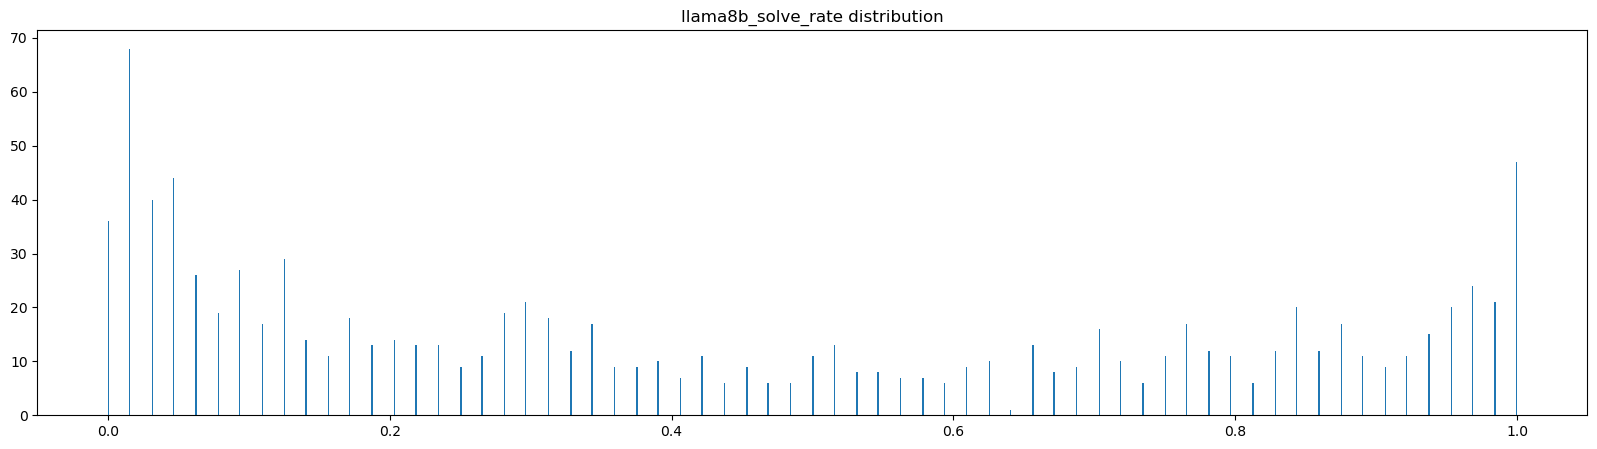

In [3]:
big_math = load_data("Big-Math-RL-Verified").select(range(1000))
print_distributions(big_math, ['problem', 'answer', 'source', 'domain', 'llama8b_solve_rate'])

### LIMO

Features: ['question', 'solution', 'answer']
Number of samples: 817
Sample: {
    "answer": "850",
    "question": "Let $P(x) = x^2 - 3x - 9$ . A real number $x$ is chosen at random from the interval $5 \\le x \\le 15$ . The probability that $\\left\\lfloor\\sqrt{P(x)}\\right\\rfloor = \\sqrt{P(\\lfloor x \\rfloor)}$ is equal to $\\frac{\\sqrt{a} + \\sqrt{b} + \\sqrt{c} - d}{e}$ , where $a$ , $b$ , $c$ , $d$ , and $e$ are positive integers. Find $a + b + c + d + e$ .",
    "solution": "Okay, so I've got this problem here that I need to solve. Let me take a deep breath and try to unpack it step by step. \n\nThe problem is about probability and functions. It says:\n\nLet \\( P(x) = x^2 - 3x - 9 \\). A real number \\( x \\) is chosen at random from the interval \\( 5 \\leq x \\leq 15 \\). We need to find the probability that \\( \\left\\lfloor \\sqrt{P(x)} \\right\\rfloor = \\sqrt{P(\\lfloor x \\rfloor)} \\). They mention that this probability can be expressed in the form \\( \\frac{\\sqr

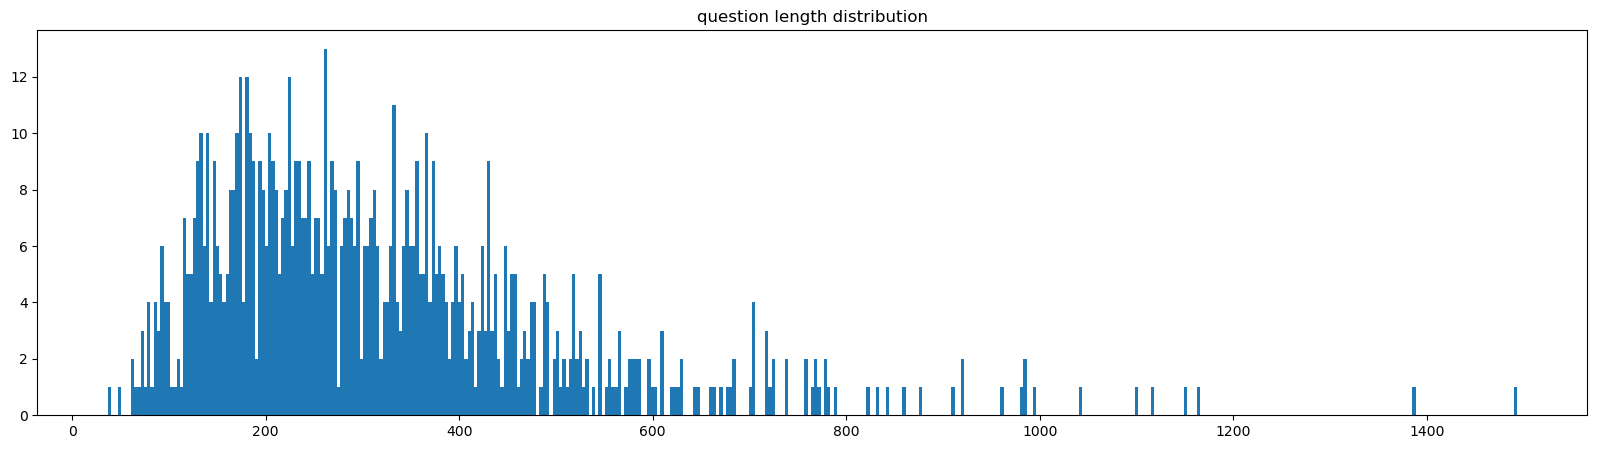

There are 817 question.


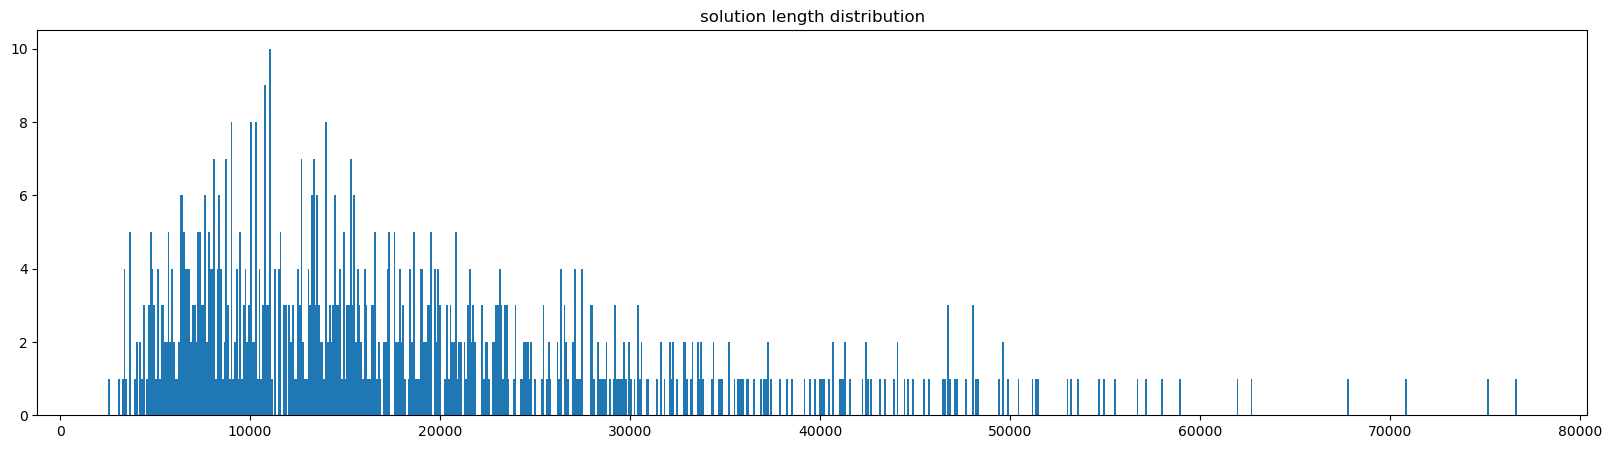

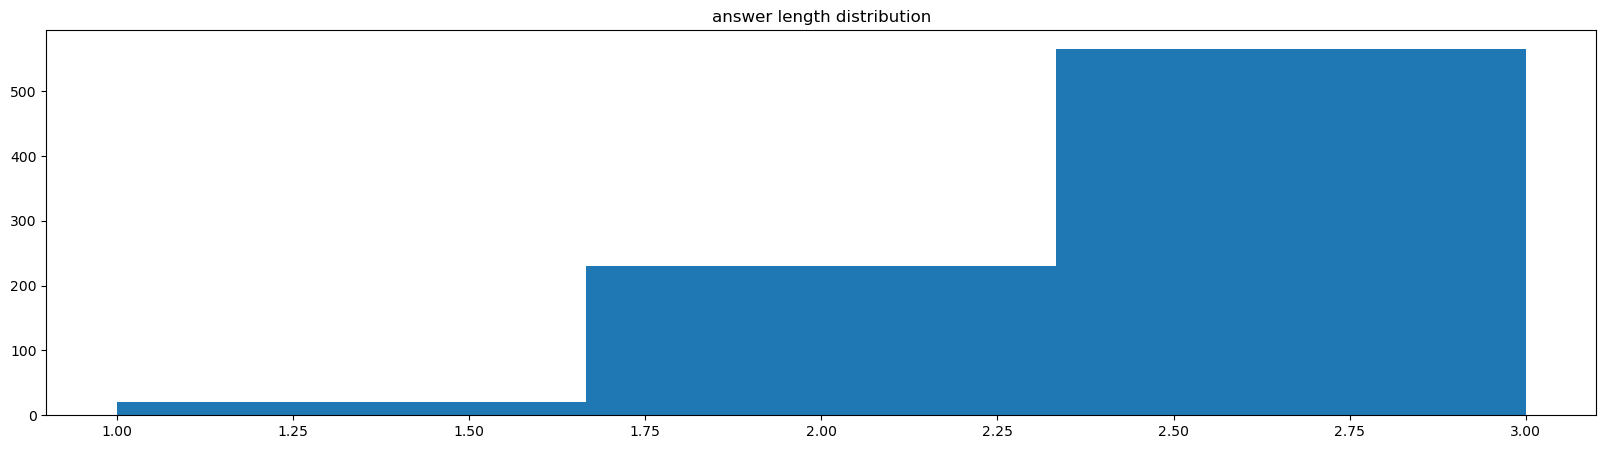

There are 458 answer.


In [4]:
limo = load_data("LIMO")
print_distributions(limo, ['question', 'solution', 'answer'])

### Llama-Nemotron

Features: ['input', 'output', 'category', 'license', 'reasoning', 'generator', 'used_in_training', 'version', 'system_prompt', 'answer']
Number of samples: 1000
Sample: {
    "answer": "2004",
    "category": "math",
    "generator": "Qwen-2.5-32B-Instruct, DeepSeek-R1",
    "input": [
        {
            "content": "Solve the following math problem. Make sure to put the answer (and only answer) inside \\boxed{}.\n\nGiven a set \\( T = \\{1, 2, \\ldots, 2008\\} \\), find the largest number of elements in a subset \\( S \\) of \\( T \\) such that there exists a positive integer \\( c \\leq 2004 \\) for which \\( |a - b| \\neq c \\) for any \\( a, b \\in S \\).",
            "role": "user"
        }
    ],
    "license": "cc-by-4.0",
    "output": "<think>\nOkay, let's try to solve this problem. We need to find the largest subset S of T = {1, 2, ..., 2008} such that there's a positive integer c \u2264 2004 where no two elements in S are exactly c apart. Hmm, so the subset S can't have 

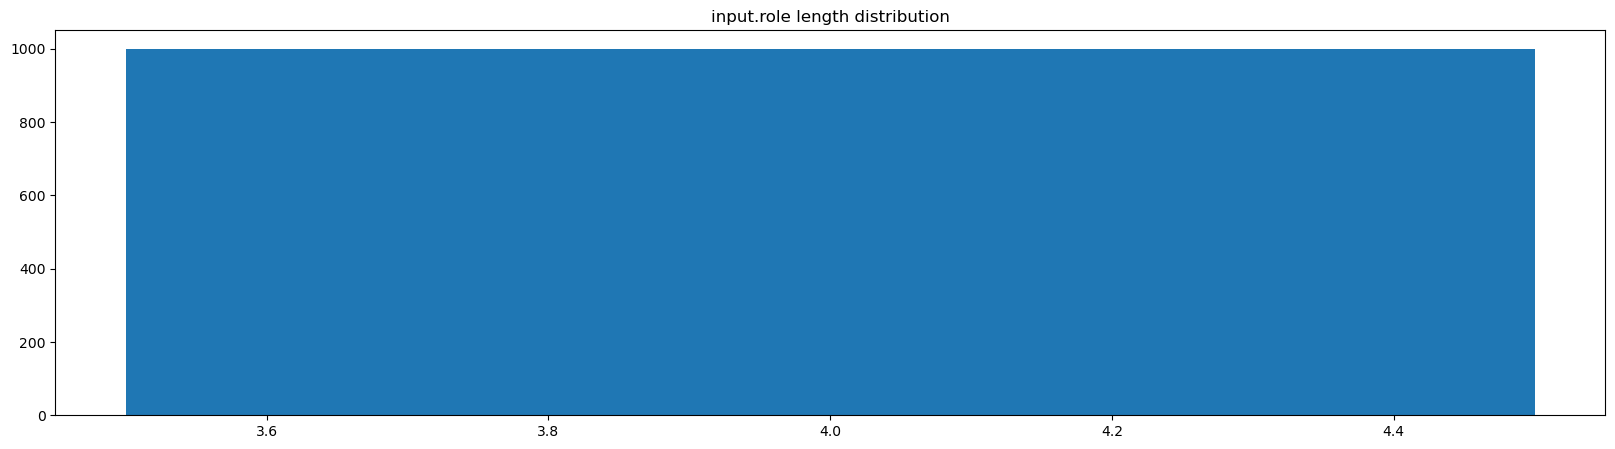

There are 1 input.role.


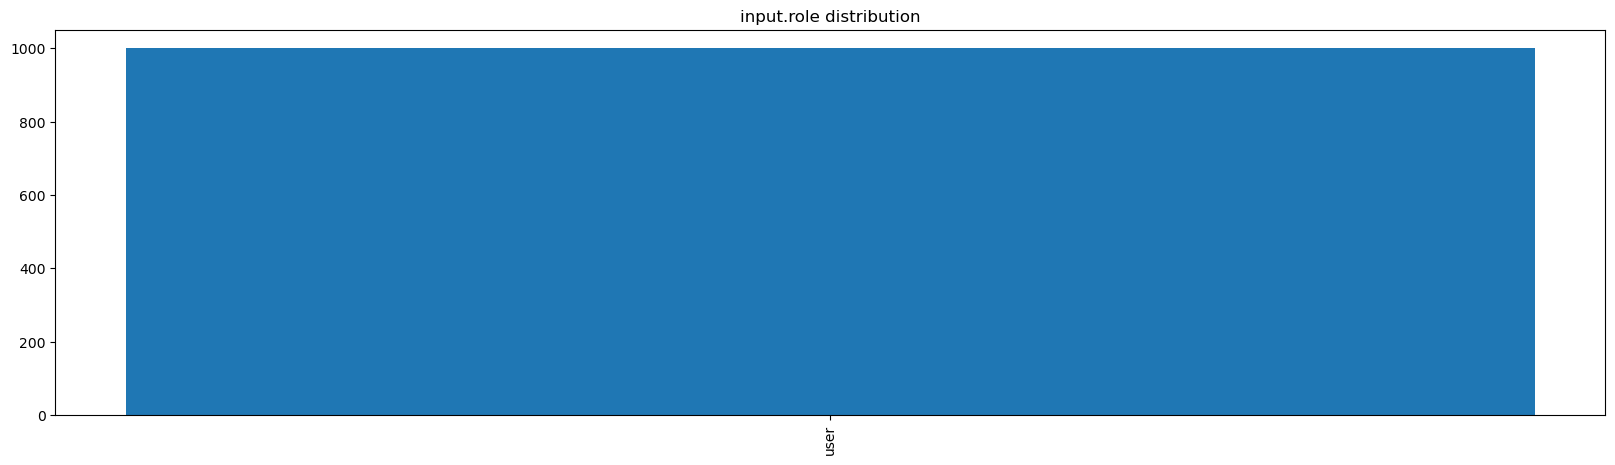

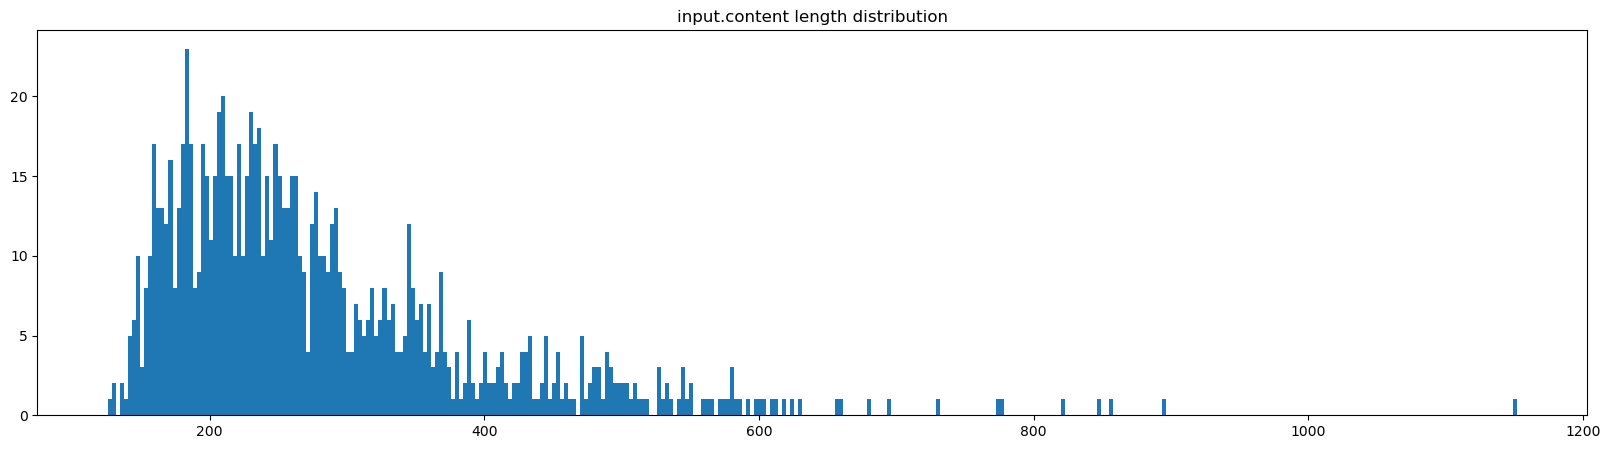

There are 999 input.content.


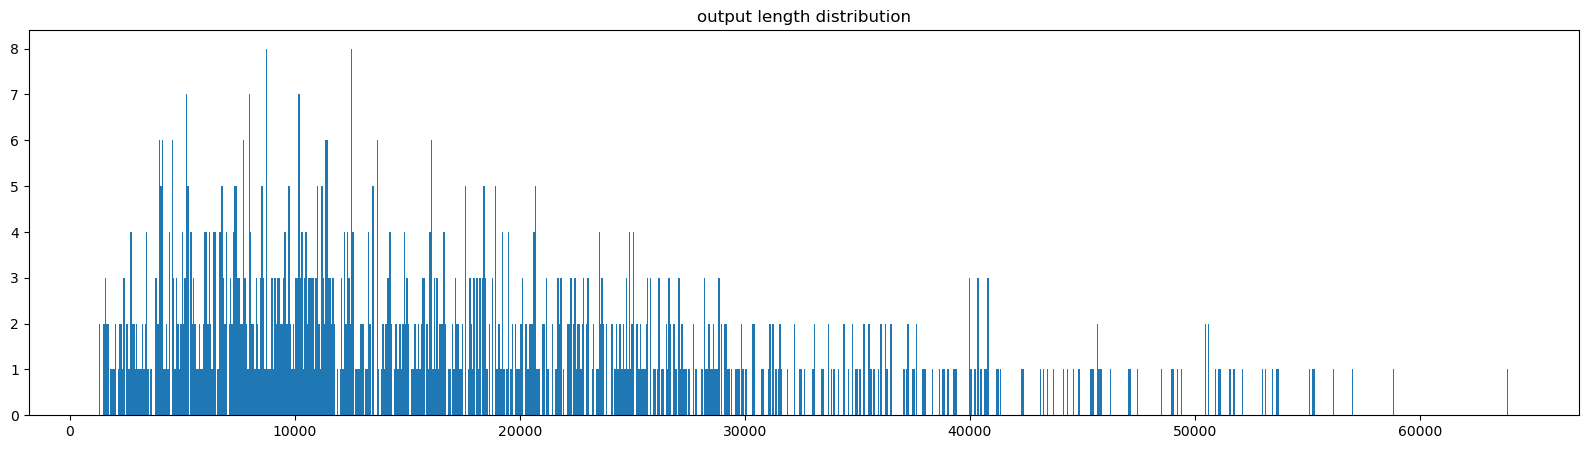

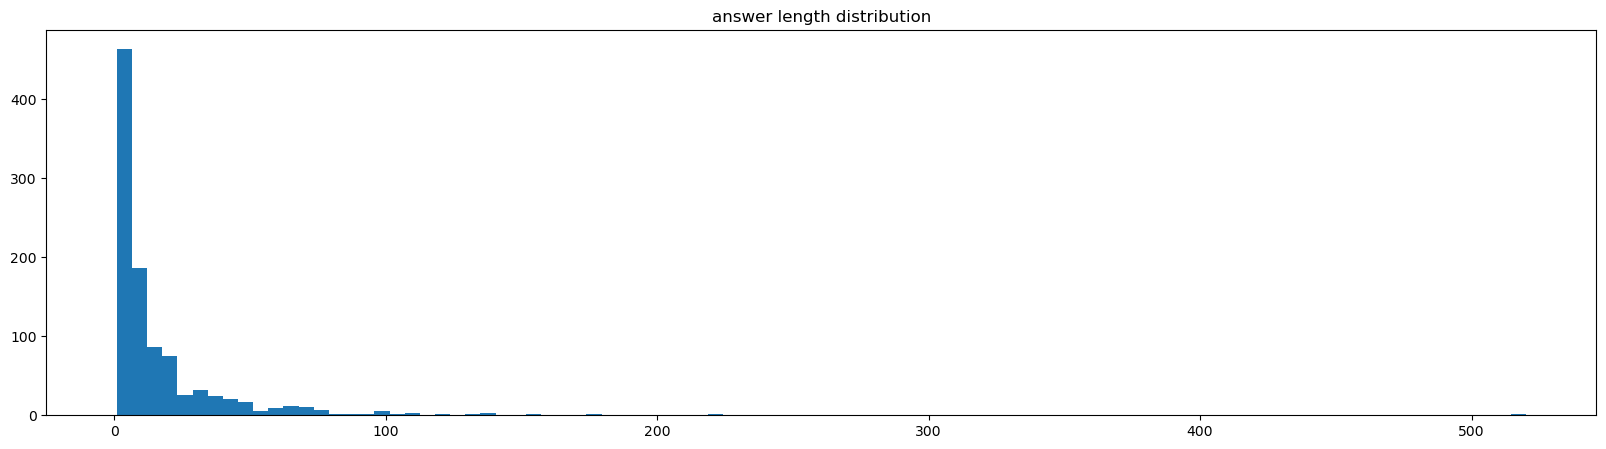

There are 698 answer.


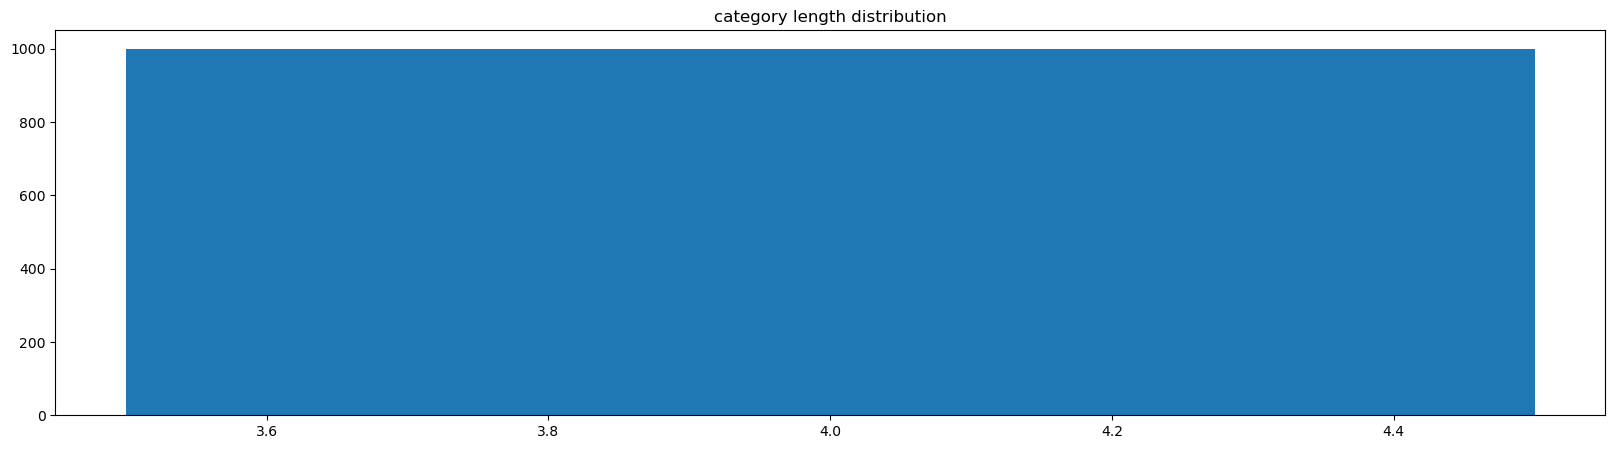

There are 1 category.


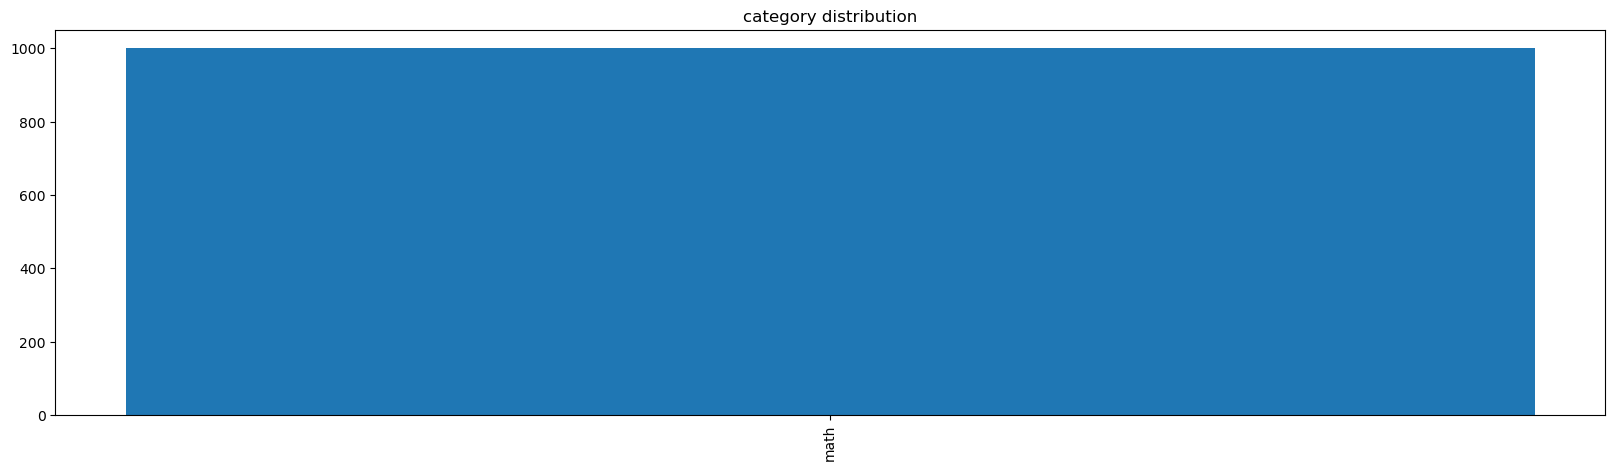

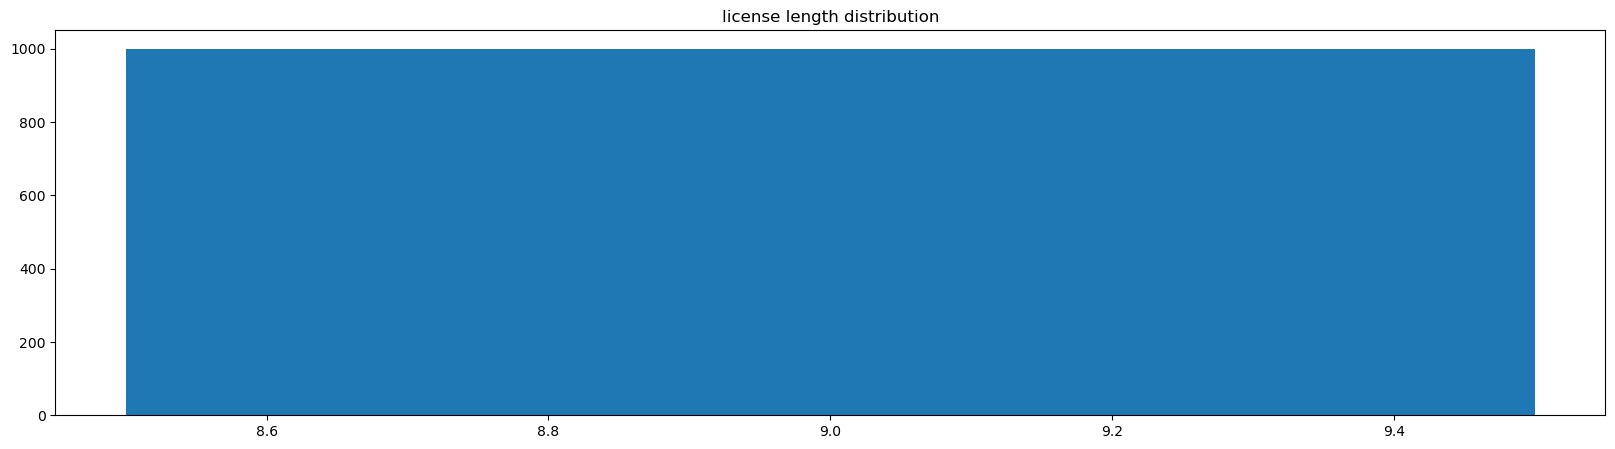

There are 1 license.


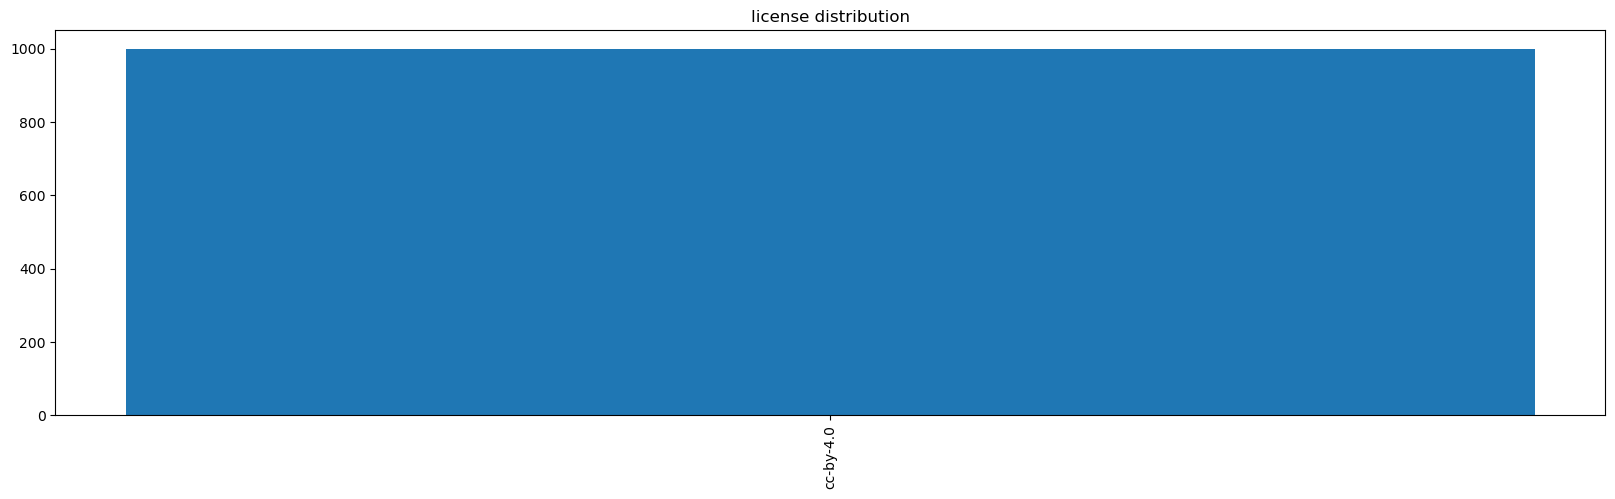

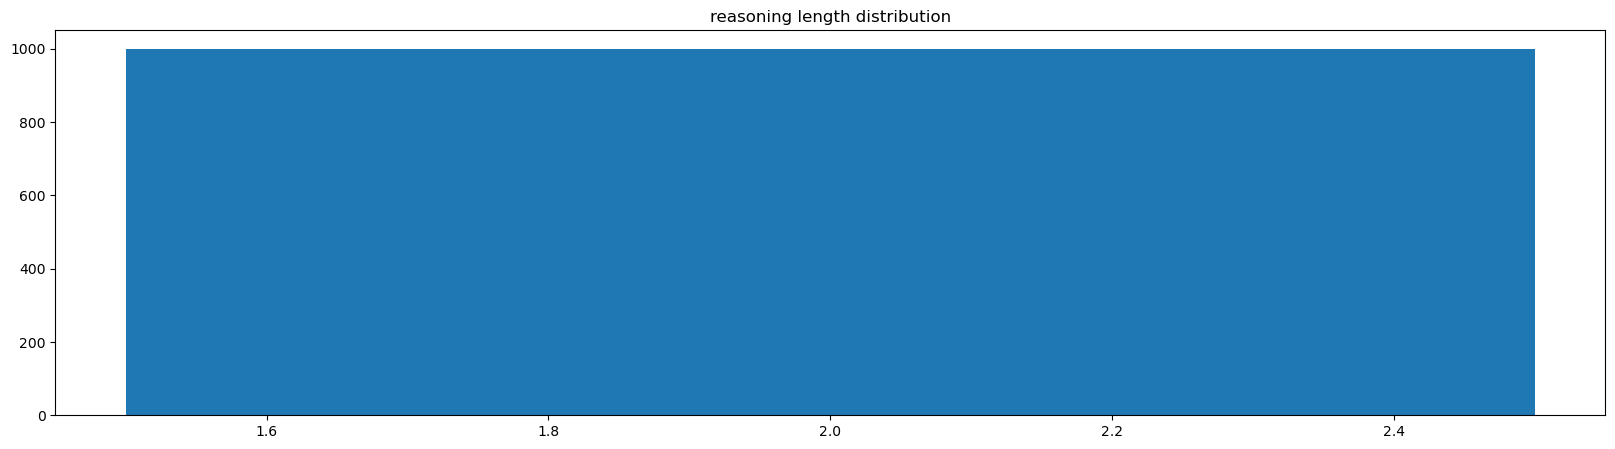

There are 1 reasoning.


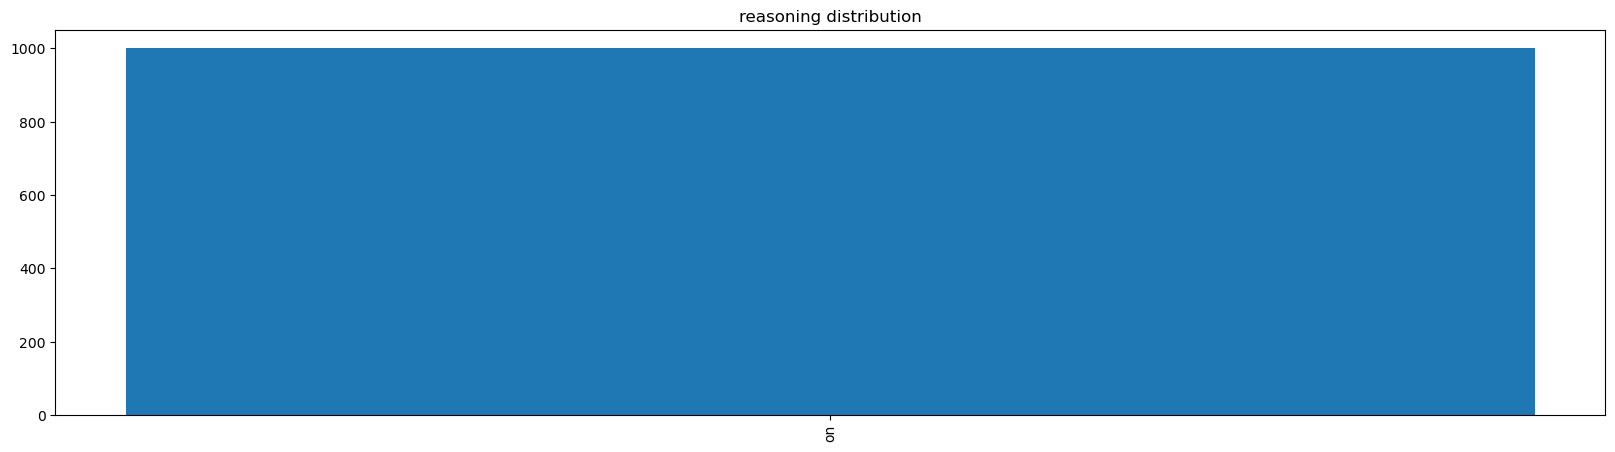

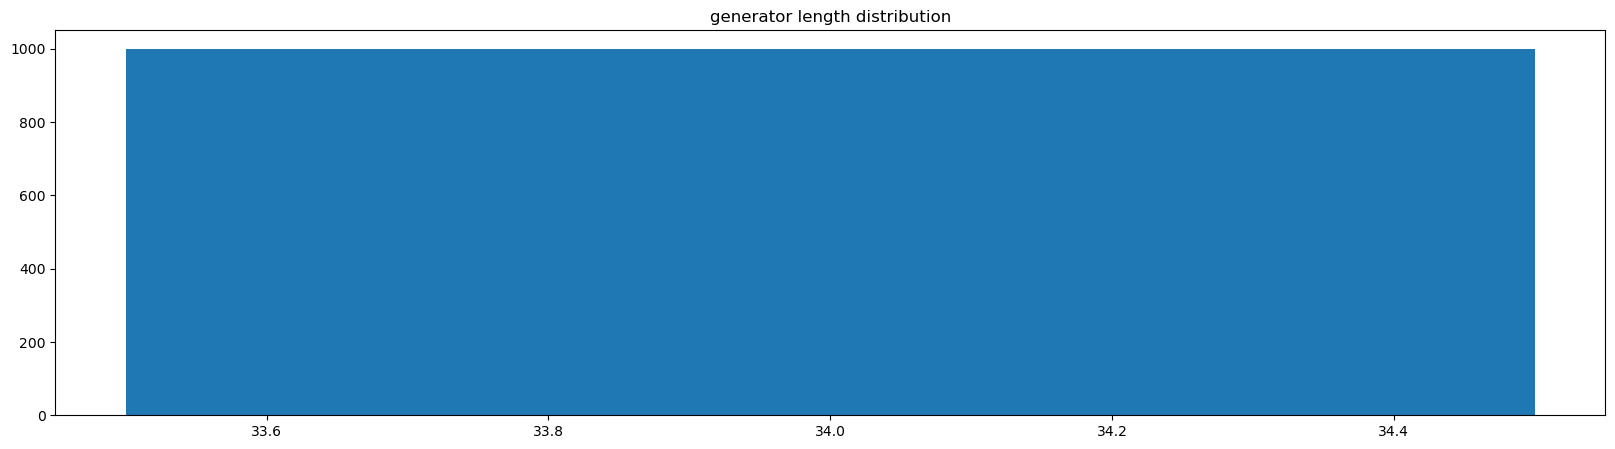

There are 1 generator.


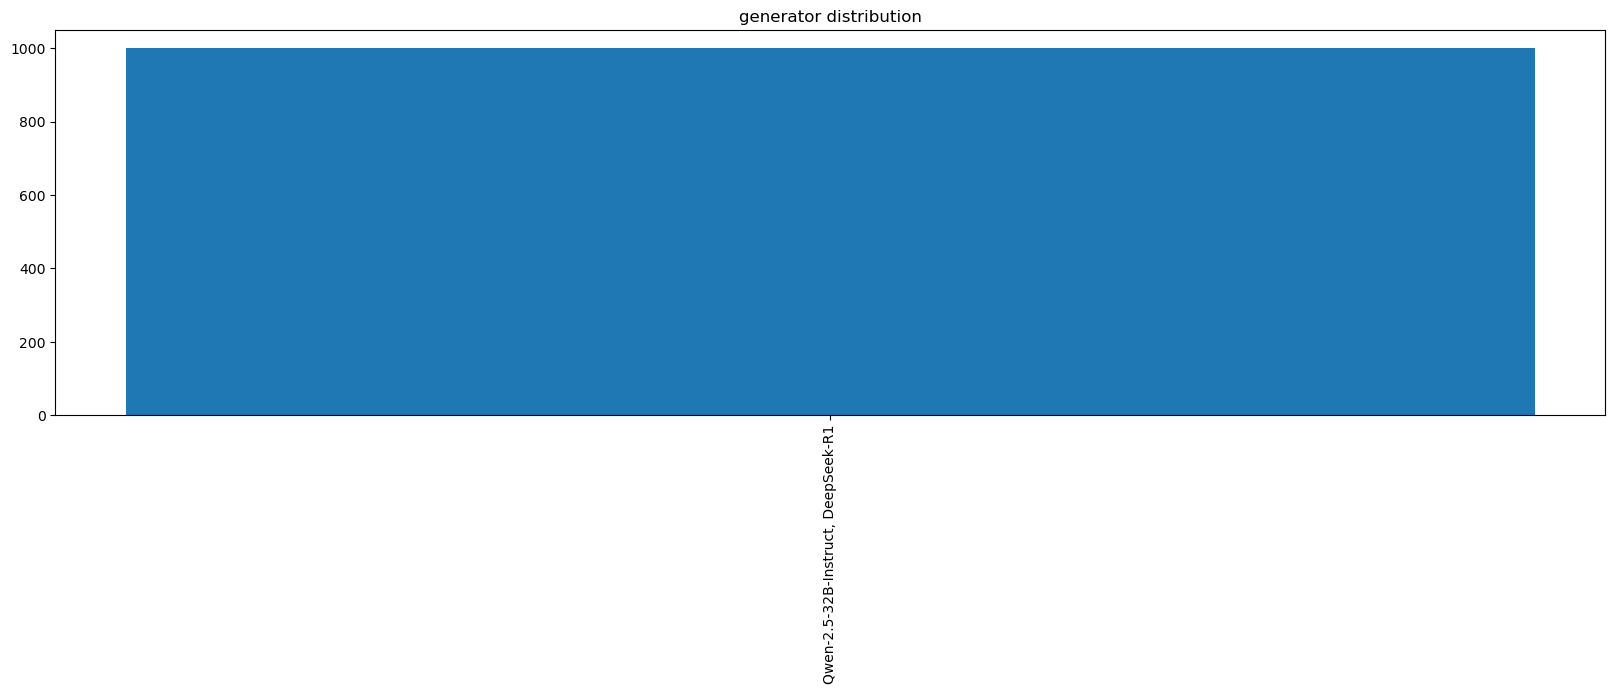

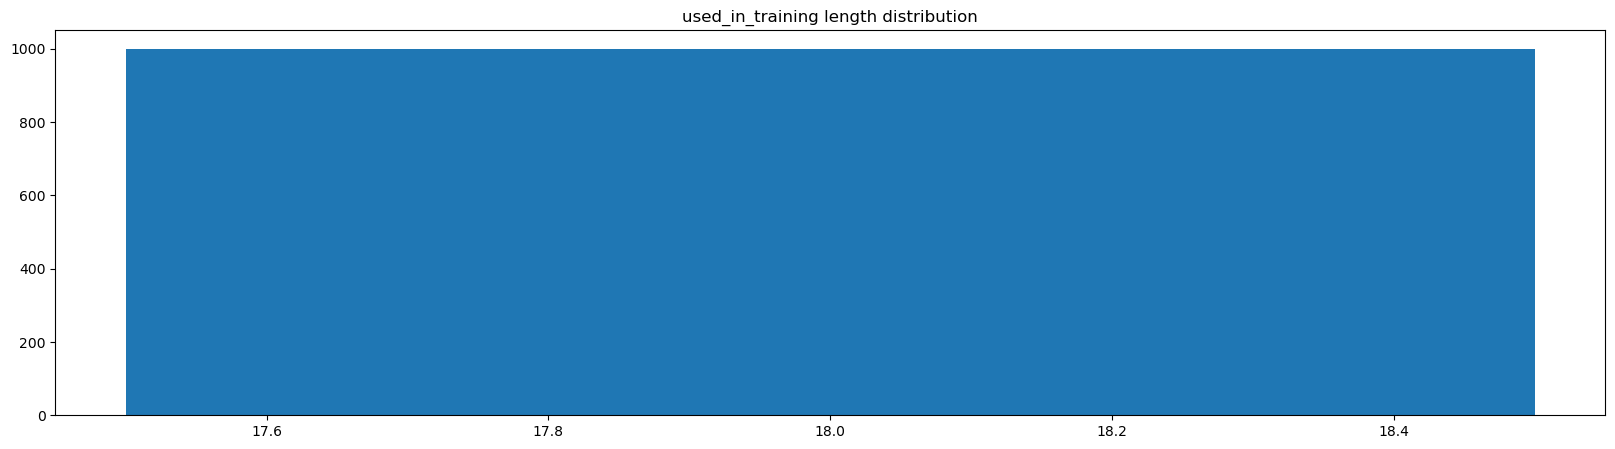

There are 1 used_in_training.


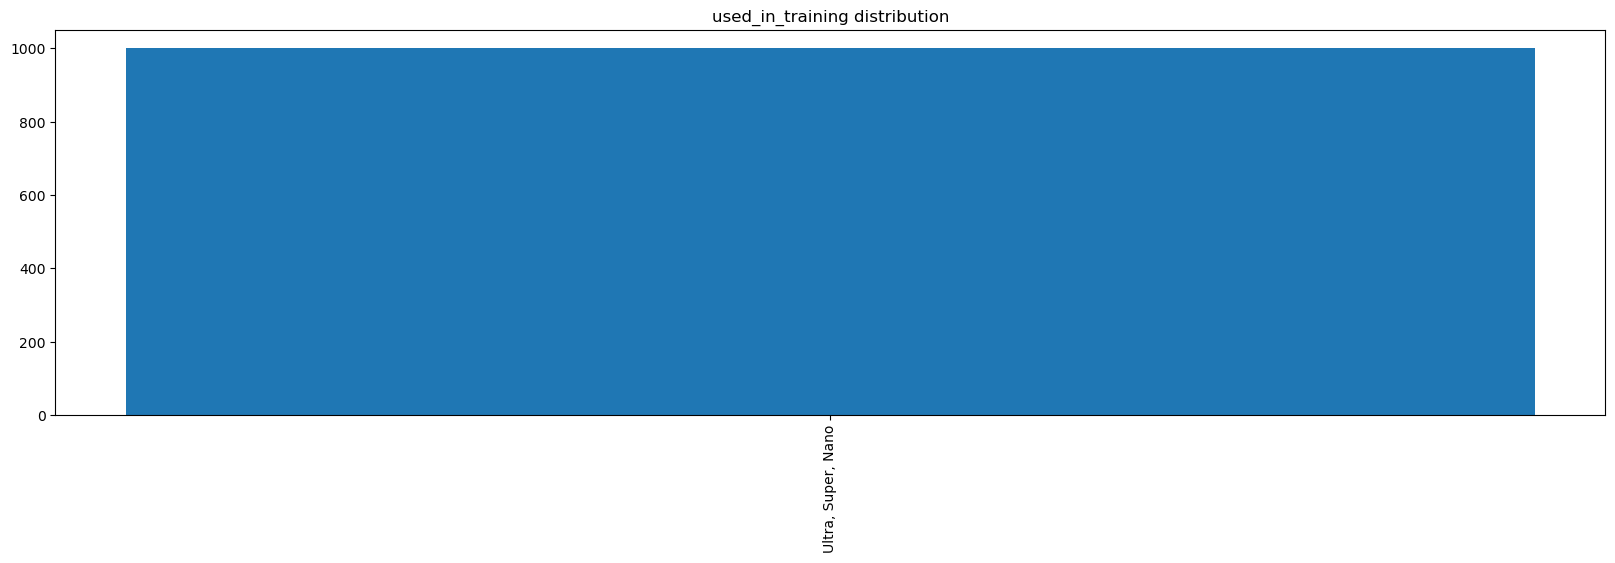

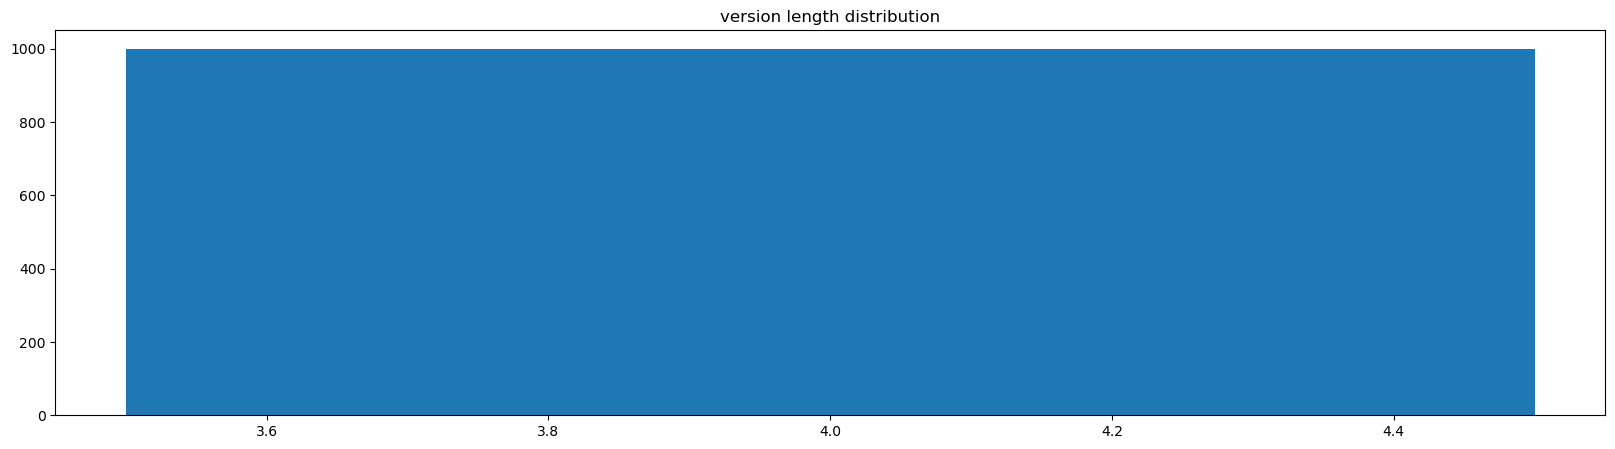

There are 1 version.


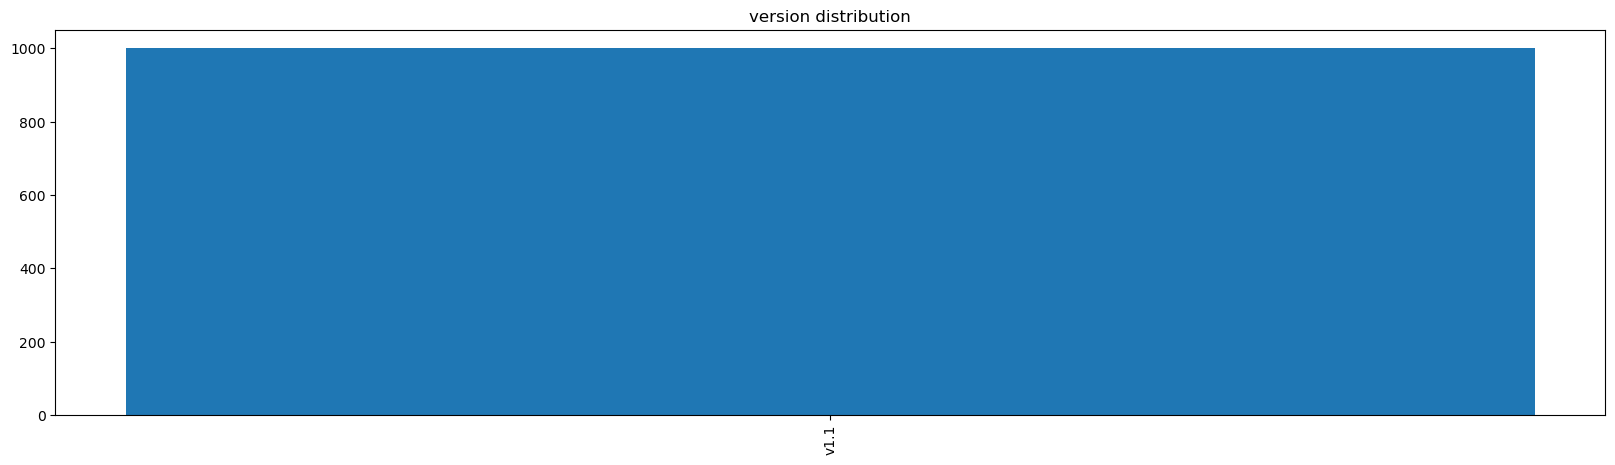

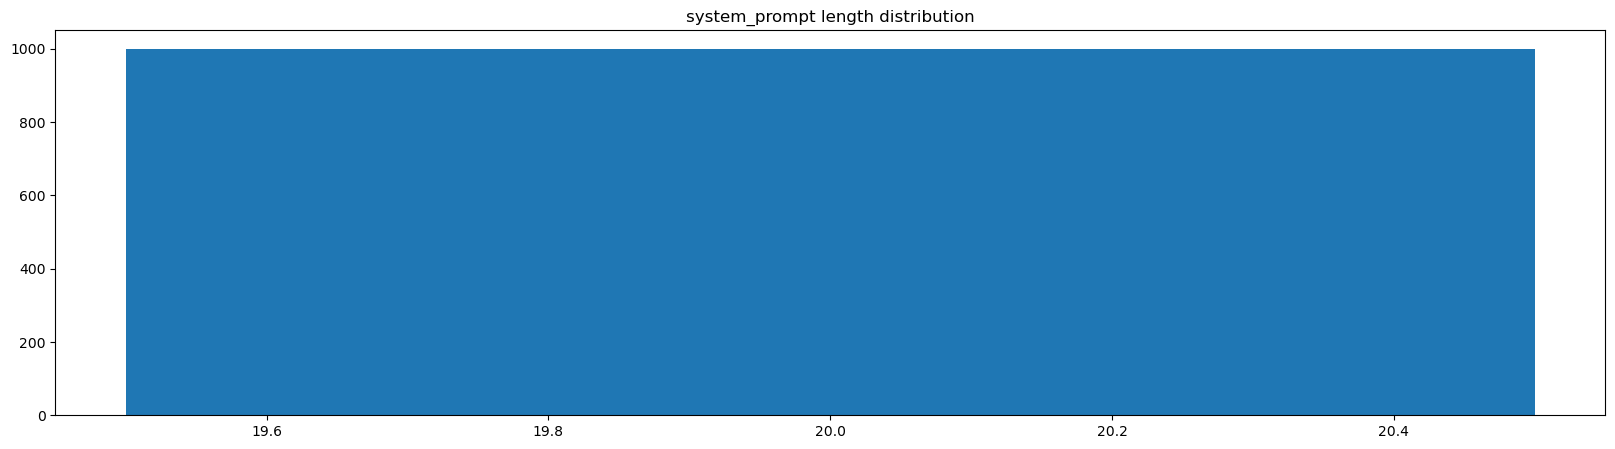

There are 1 system_prompt.


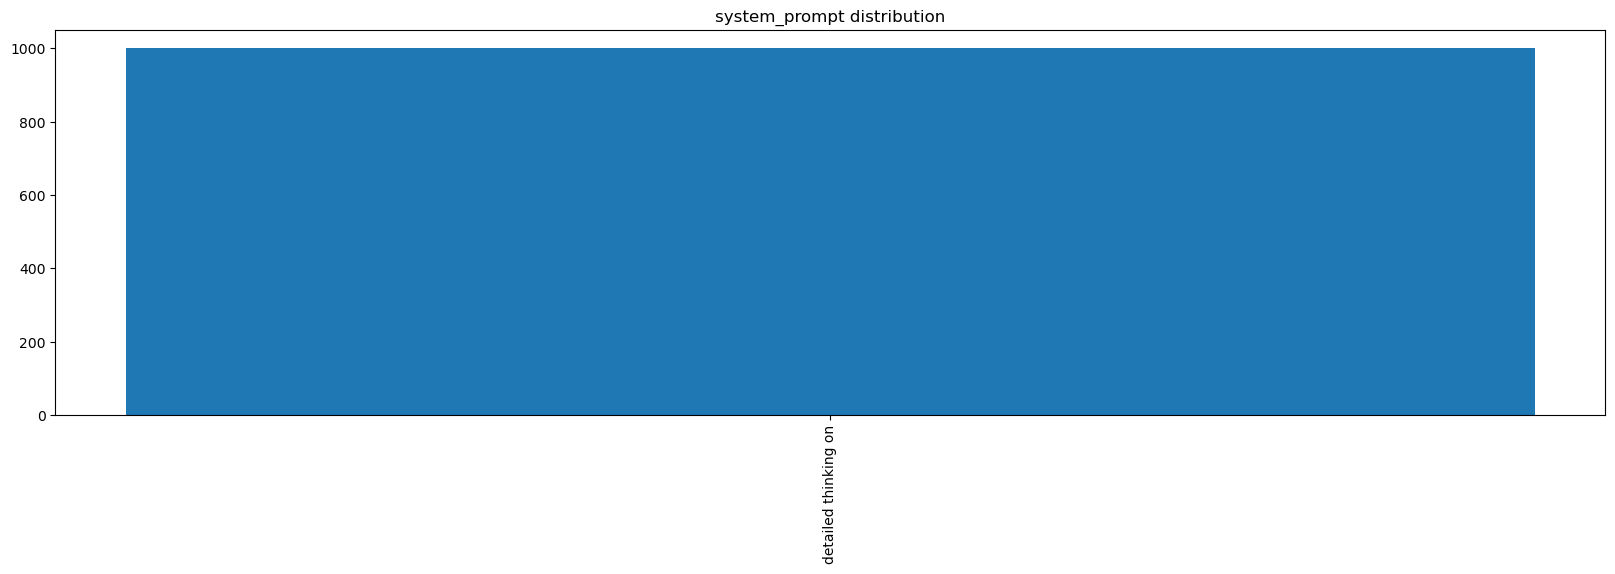

In [5]:
llama_nemotron = load_data("Llama-Nemotron-Post-Training-Dataset").select(range(1000))
llama_nemotron = llama_nemotron.add_column(
    "answer",
    ["}".join(x.split("\\boxed{")[-1].split("}")[:-1]) for x in llama_nemotron["output"]]
)
print_distributions(llama_nemotron, ['input', 'output', 'answer', 'category', 'license', 'reasoning', 'generator', 'used_in_training', 'version', 'system_prompt'])

### MegaMath-Web-Pro

Features: ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'timestamp', 'url', 'math_score', 'timestamp_unformatted']
Number of samples: 1000
Sample: {
    "cc-path": "CC-MAIN-2023-14/segments/1679296949035.66/warc/CC-MAIN-20230329213541-20230330003541-00419.warc.gz",
    "domain": "exceljet.net",
    "lang": "en",
    "lang_score": 0.8451306819915771,
    "math_score": 0.43340739607810974,
    "text": "## Transcript\n\nThis video demonstrates how to build a quick summary table using the COUNTIF and SUMIF functions. The sample data shows t-shirt sales with columns for date, item, color, and amount. To break down the data by color, Pivot Tables can be used, but basic summaries can be achieved with formulas.\n\nThe Color and Amount columns are named to avoid using absolute addresses and to make formulas shorter and easier to read. A list of unique colors is created by copying the full list and using the Remove Duplicates command in Excel. This is particularly useful when working with 

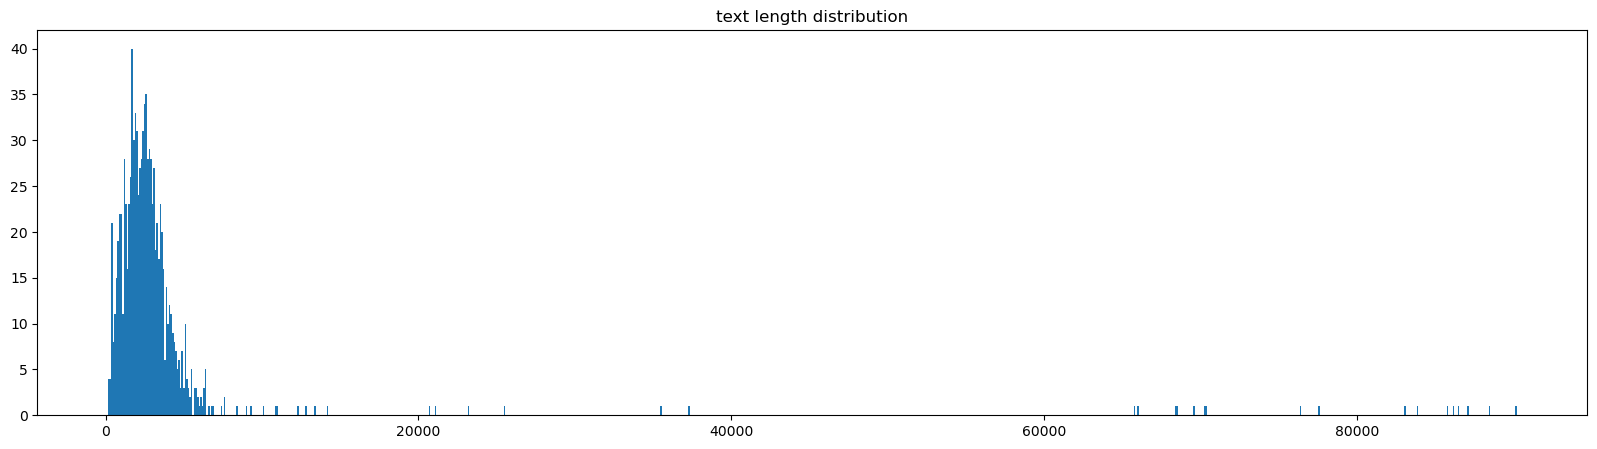

There are 993 text.


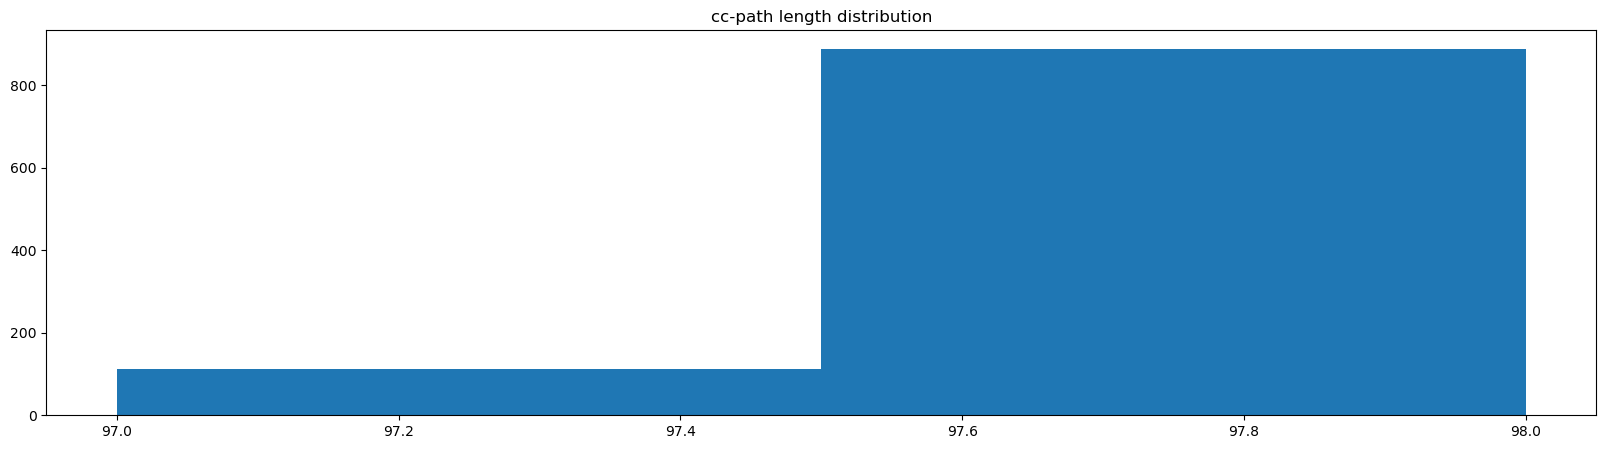

There are 778 cc-path.


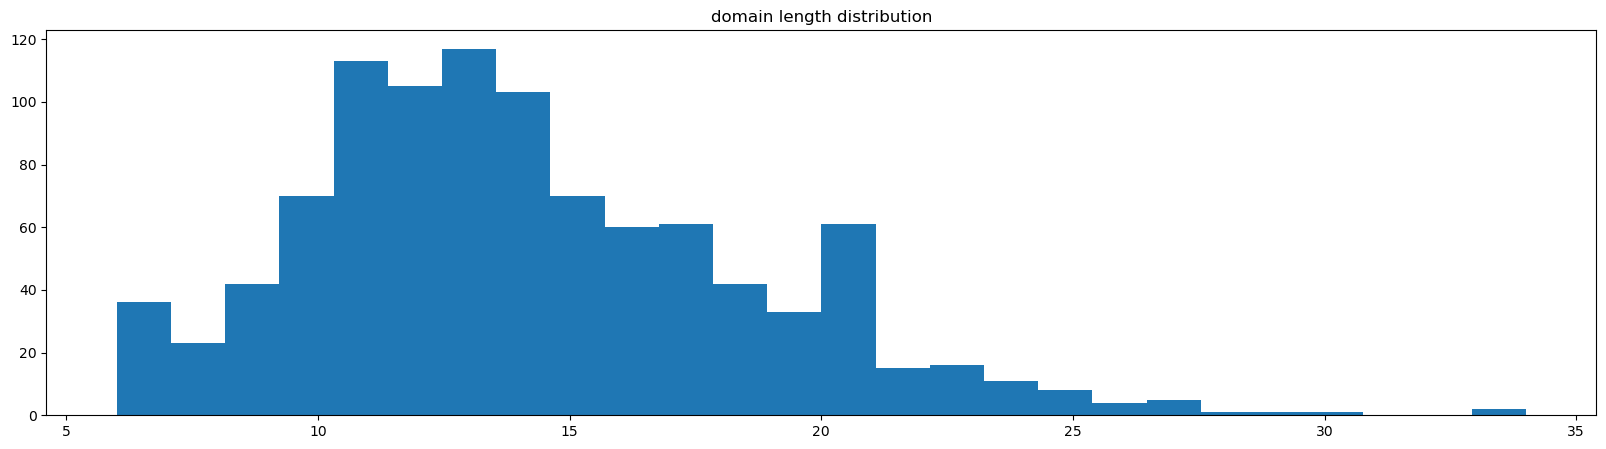

There are 803 domain.


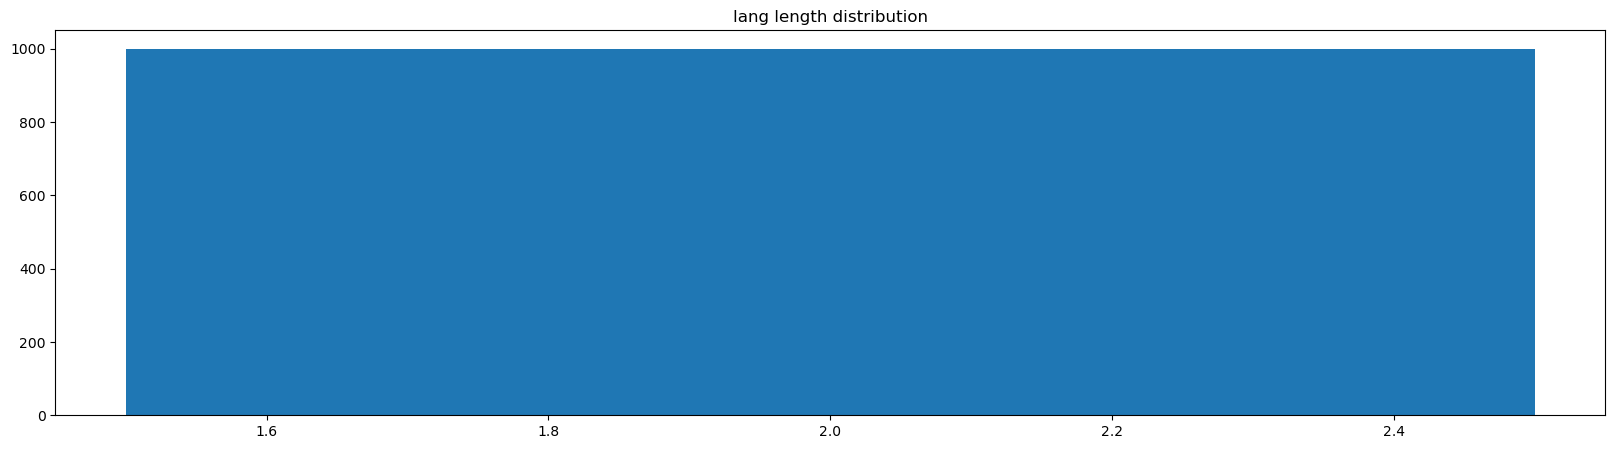

There are 1 lang.


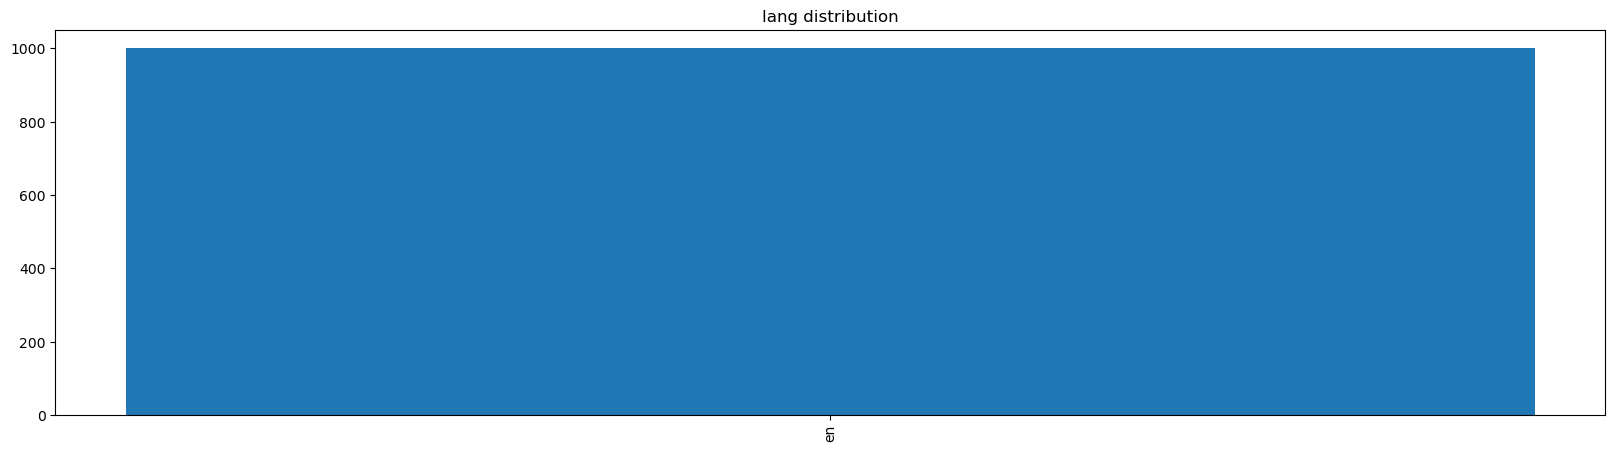

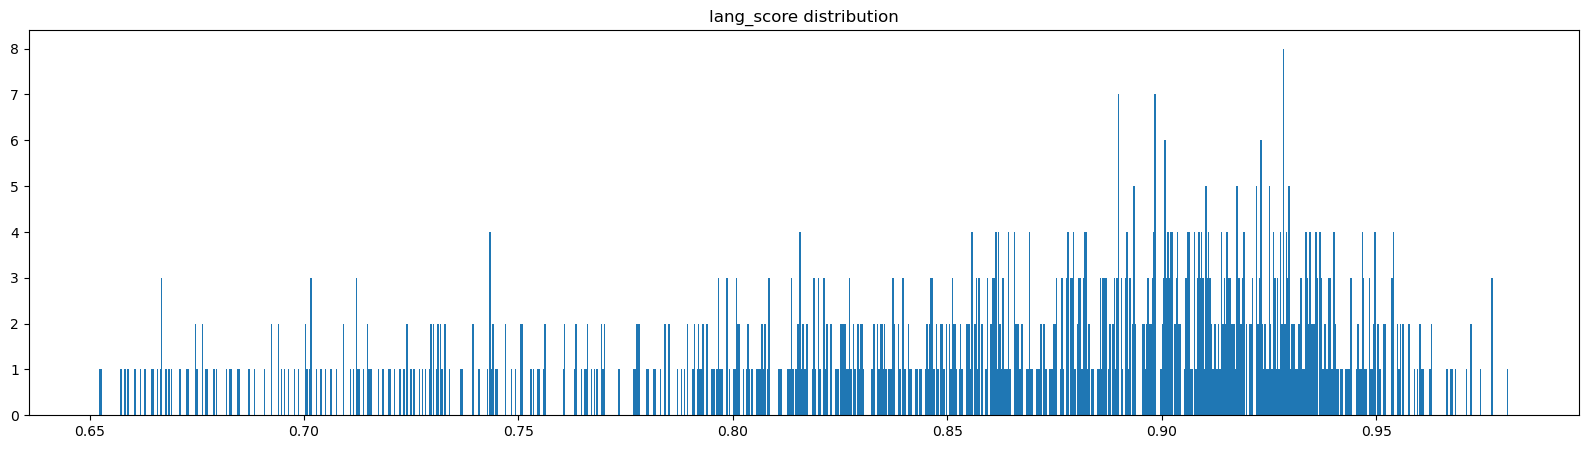

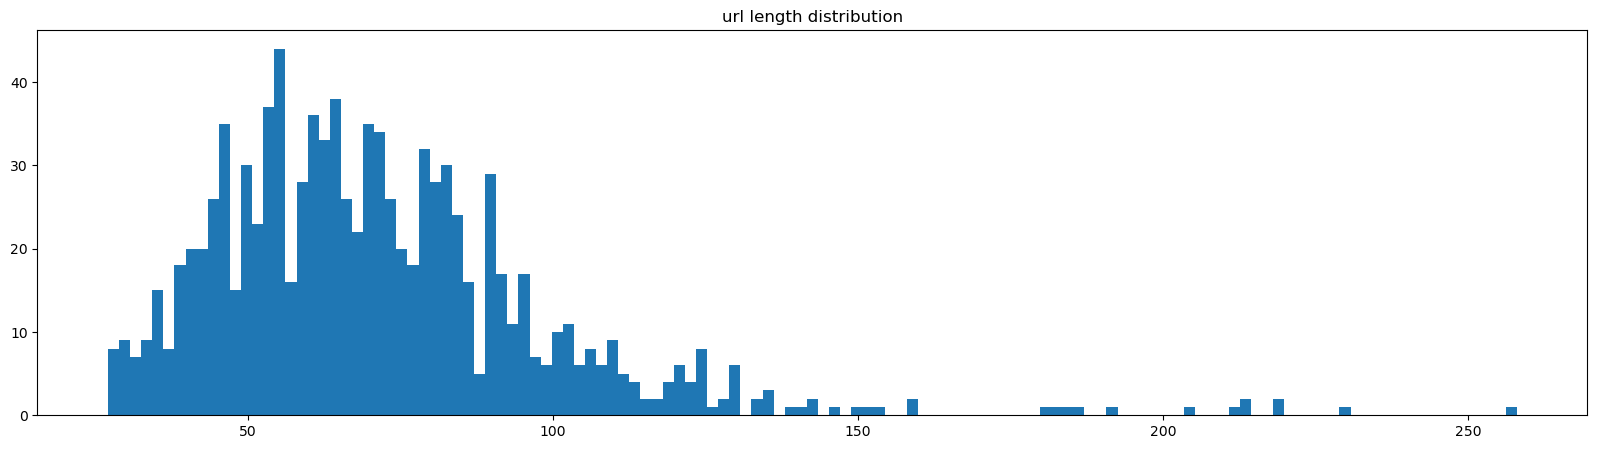

There are 1000 url.


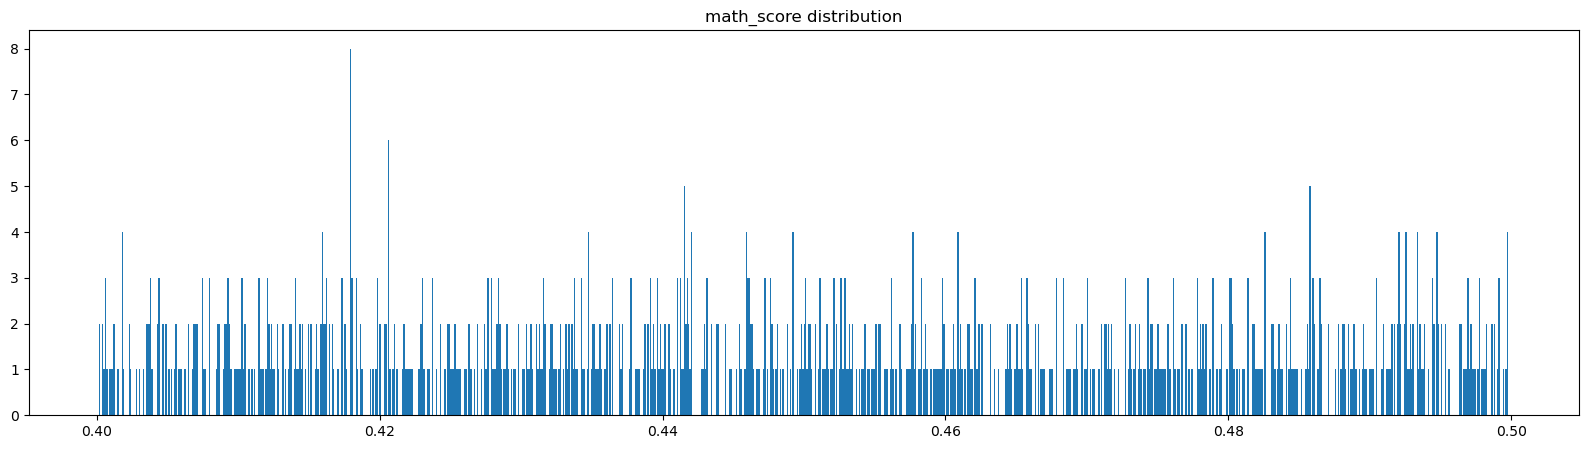

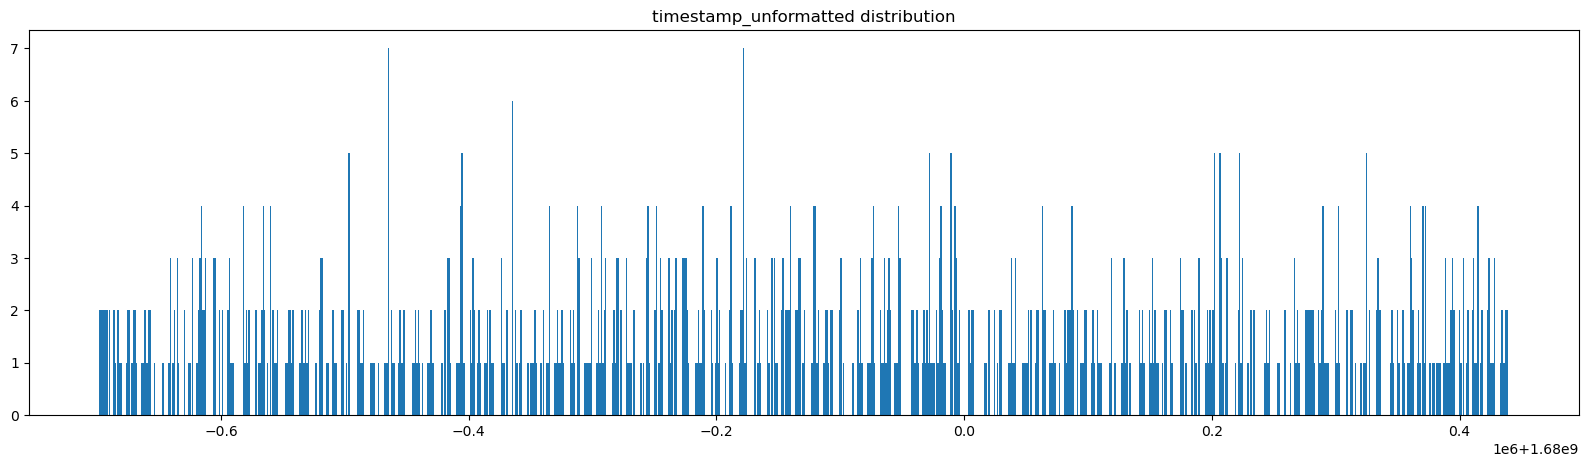

In [6]:
megamath_web_pro = load_data("MegaMath").select(range(1000))
megamath_web_pro = megamath_web_pro.add_column(
    "timestamp_unformatted",
    [(datetime.strptime(ts, '%Y-%m-%dT%H:%M:%SZ') - datetime(1970, 1, 1)).total_seconds() for ts in megamath_web_pro["timestamp"]]
)
print_distributions(megamath_web_pro, ['text', 'cc-path', 'domain', 'lang', 'lang_score', 'url', 'math_score', 'timestamp_unformatted'])

### NuminaMath 1.5

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic']
Number of samples: 1000
Sample: {
    "answer": "proof",
    "problem": "LVIII OM - II - Problem 6\n\nPositive numbers $ a $, $ b $, $ c $, $ d $ satisfy the condition\n\n\n\n\n\n\nProve that\n\n\n\n\n\n\n\n\n\n\n\n(Note: The original text had blank spaces or missing conditions in the mathematical statements. Please ensure the problem statement is complete for an accurate translation.)",
    "problem_is_valid": "Incomplete",
    "problem_type": "Inequalities",
    "question_type": "proof",
    "solution": "We will show that for any positive numbers $ x $, $ y $ the following inequality holds\n\nIndeed, transforming the above inequality equivalently, we have\n\nThe last inequality is satisfied, since the numbers $ x-y $ and $ x^3-y^3 $ have the same sign.\nUsing the relation (1), we see that the problem will be solved if we prove the inequality\n\n

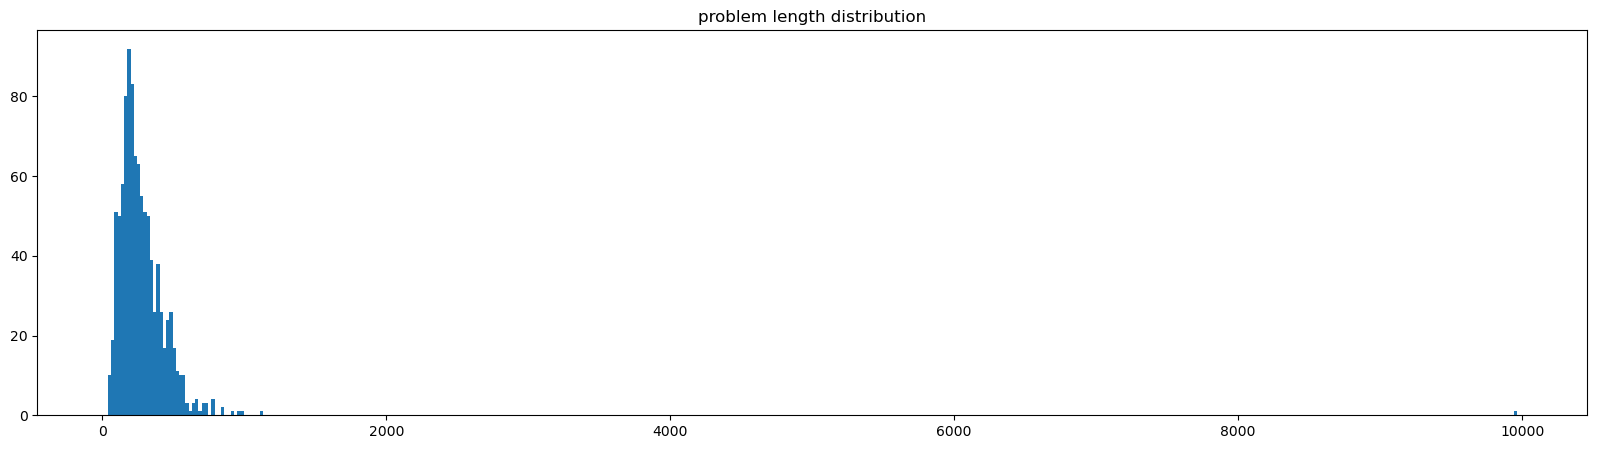

There are 1000 problem.


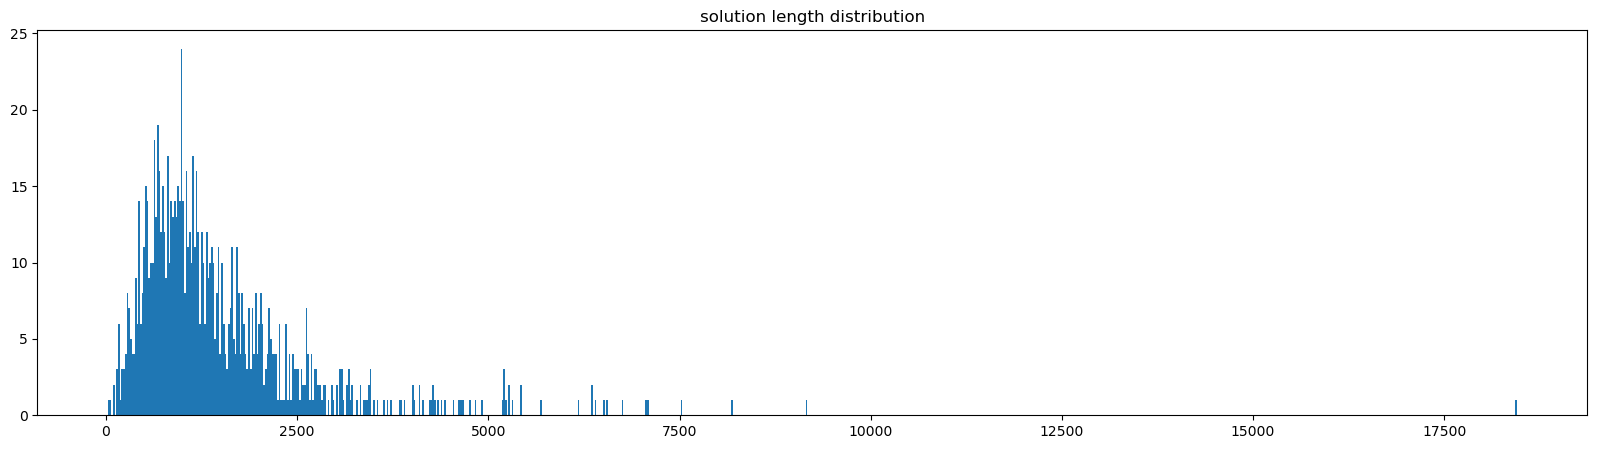

There are 999 solution.


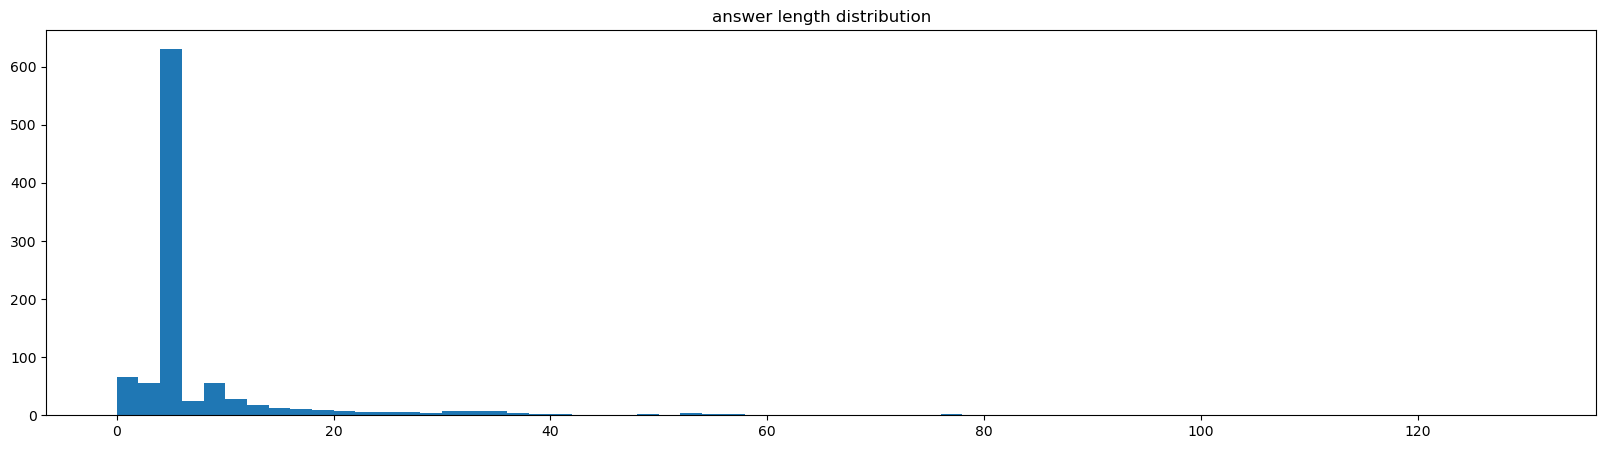

There are 297 answer.


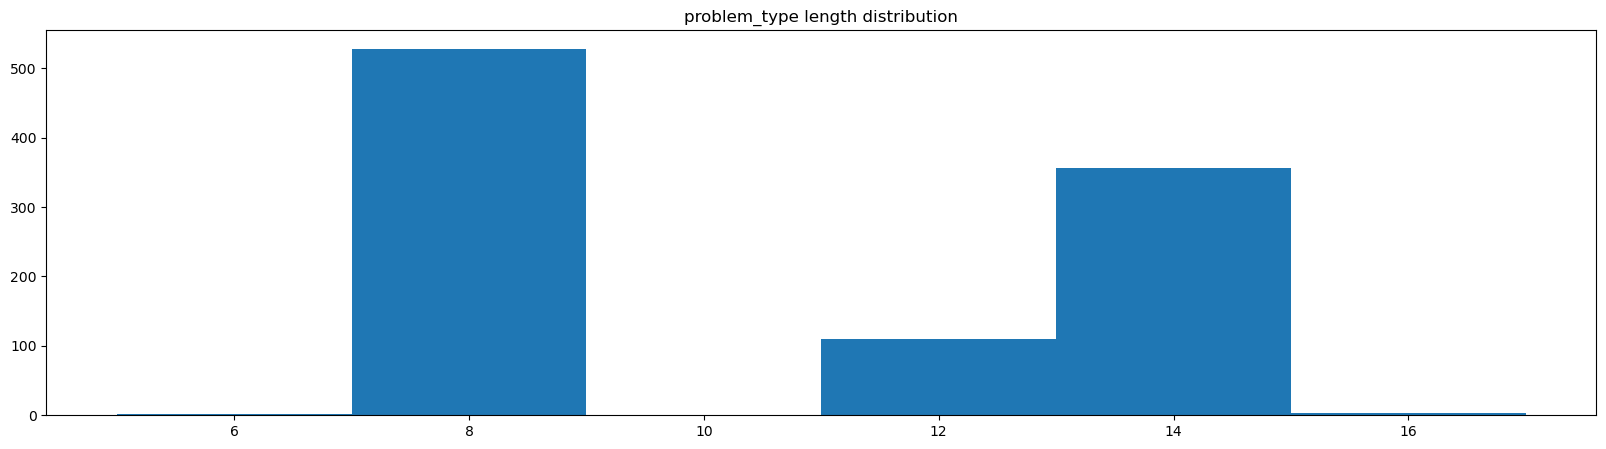

There are 8 problem_type.


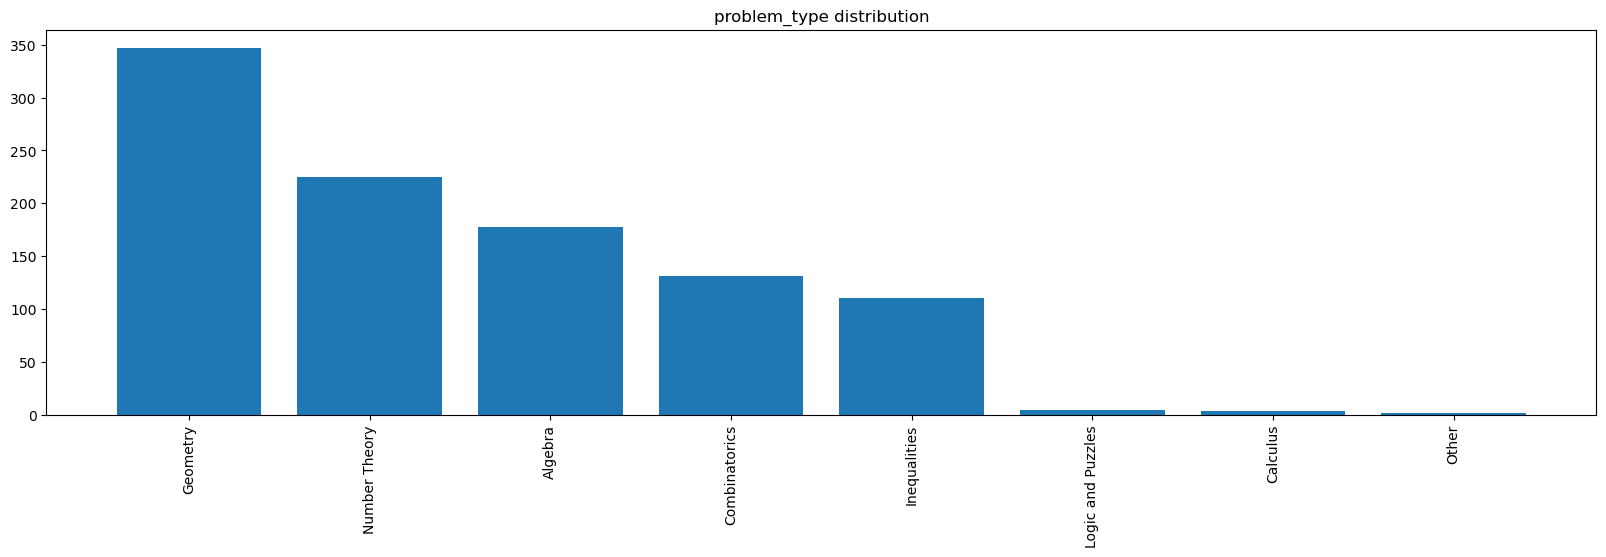

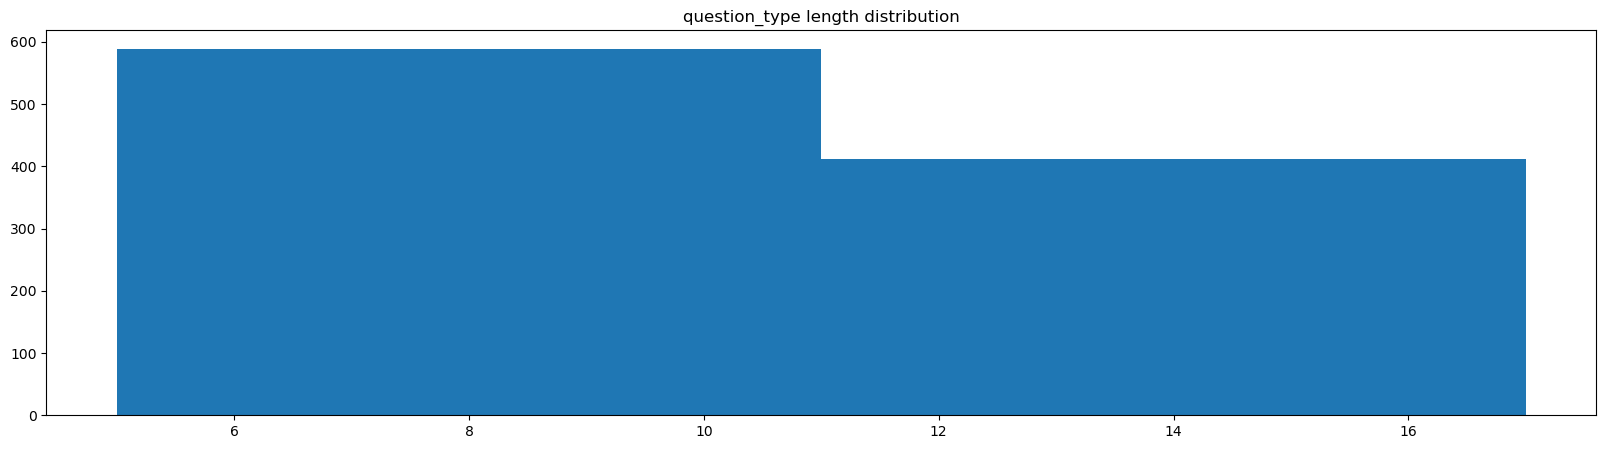

There are 2 question_type.


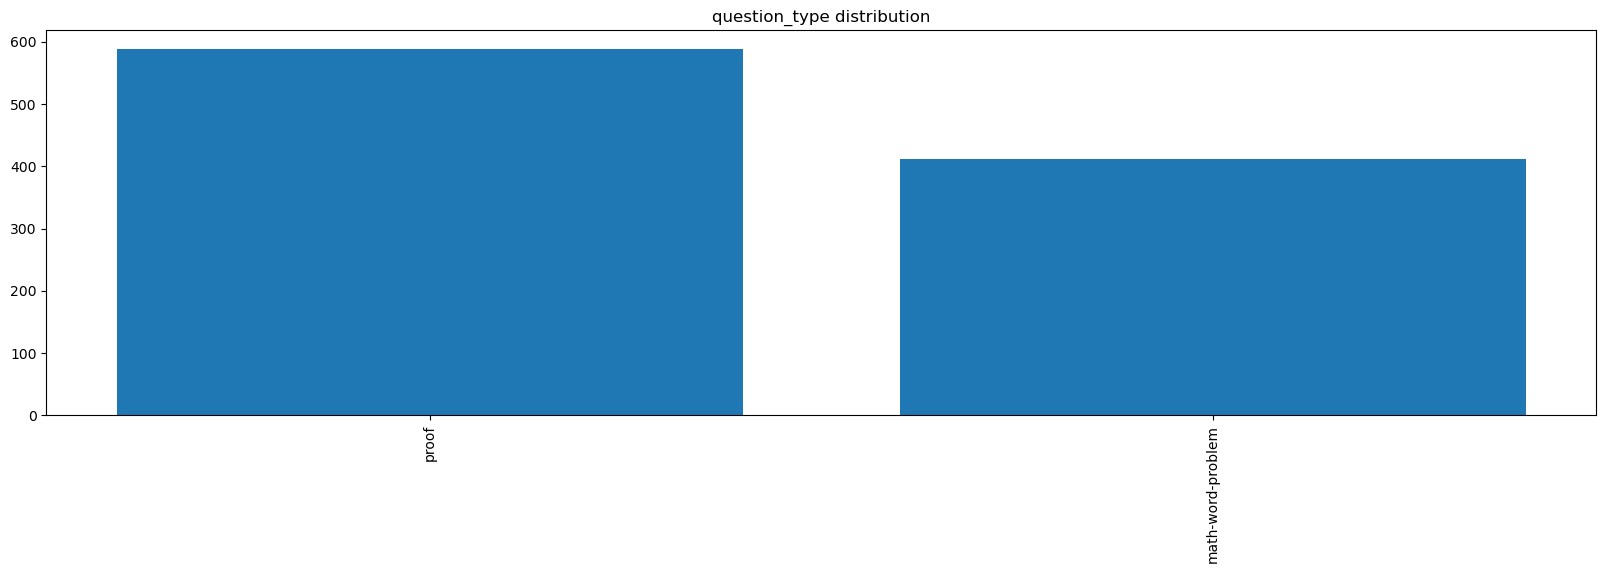

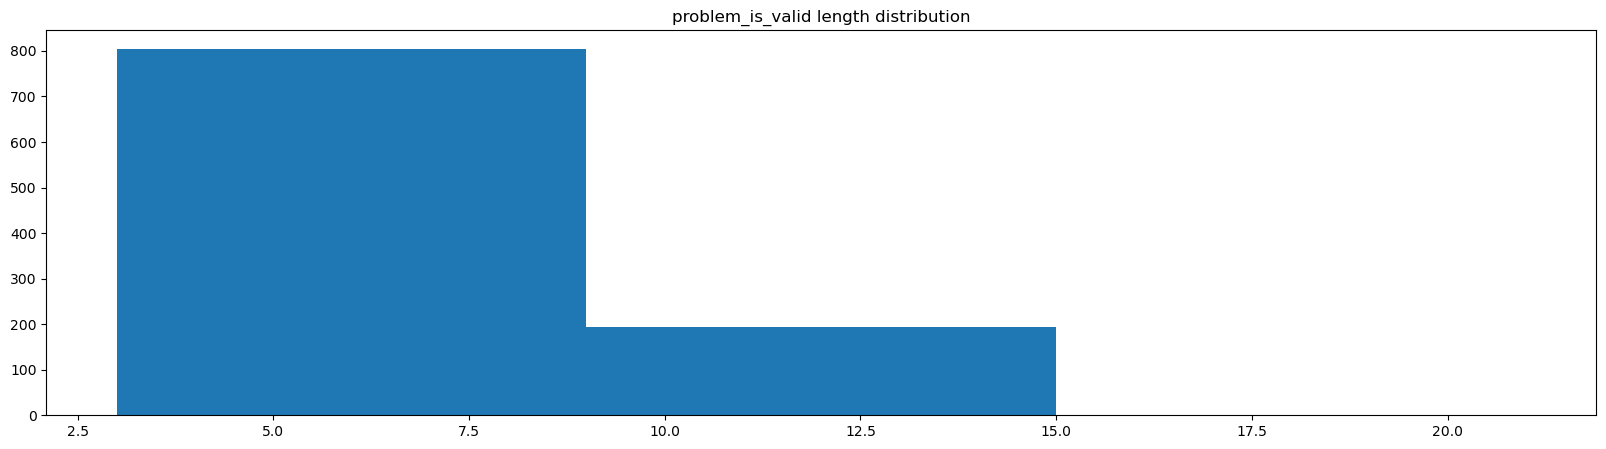

There are 3 problem_is_valid.


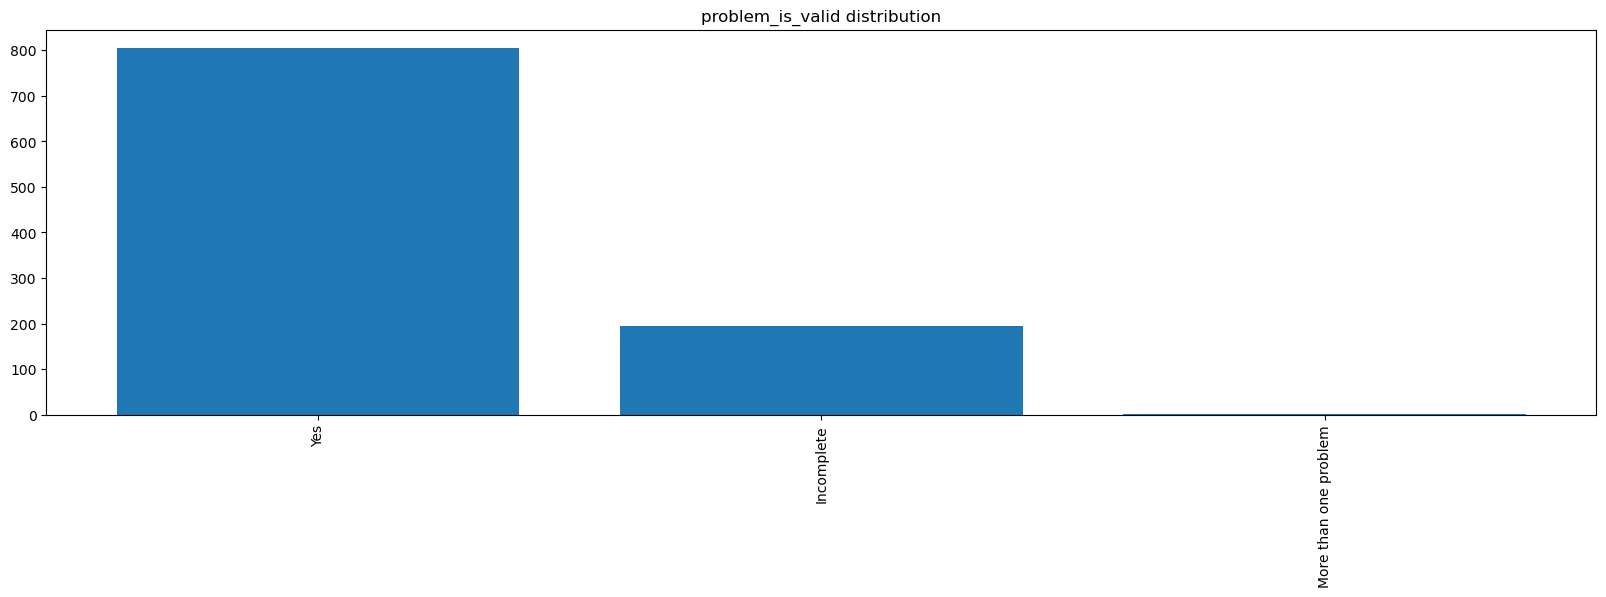

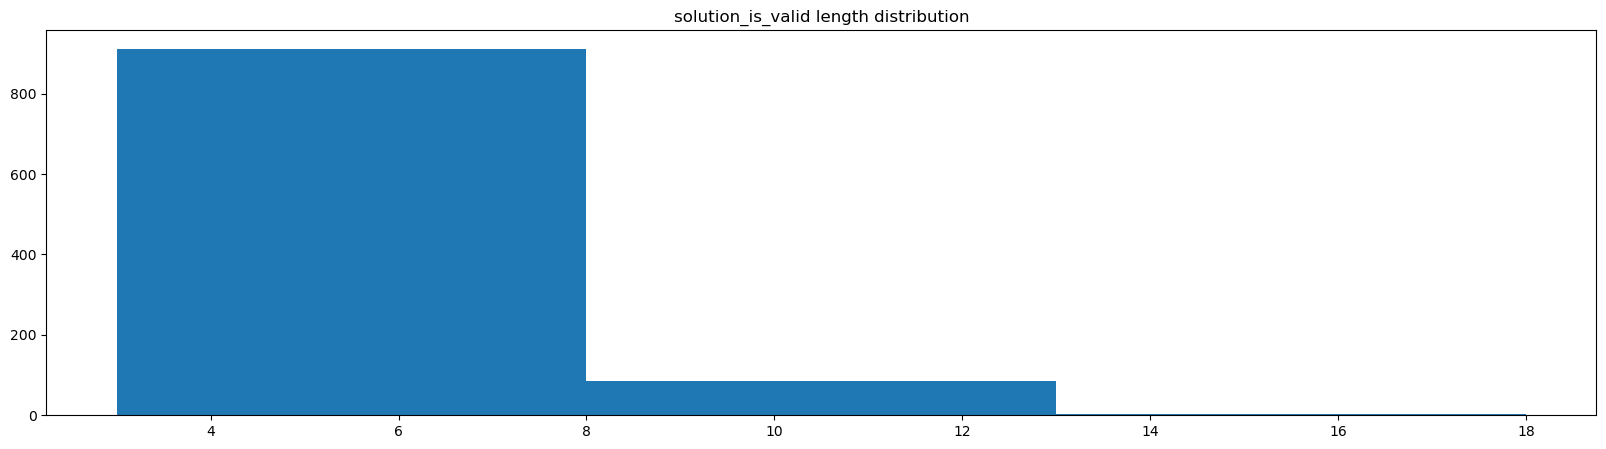

There are 4 solution_is_valid.


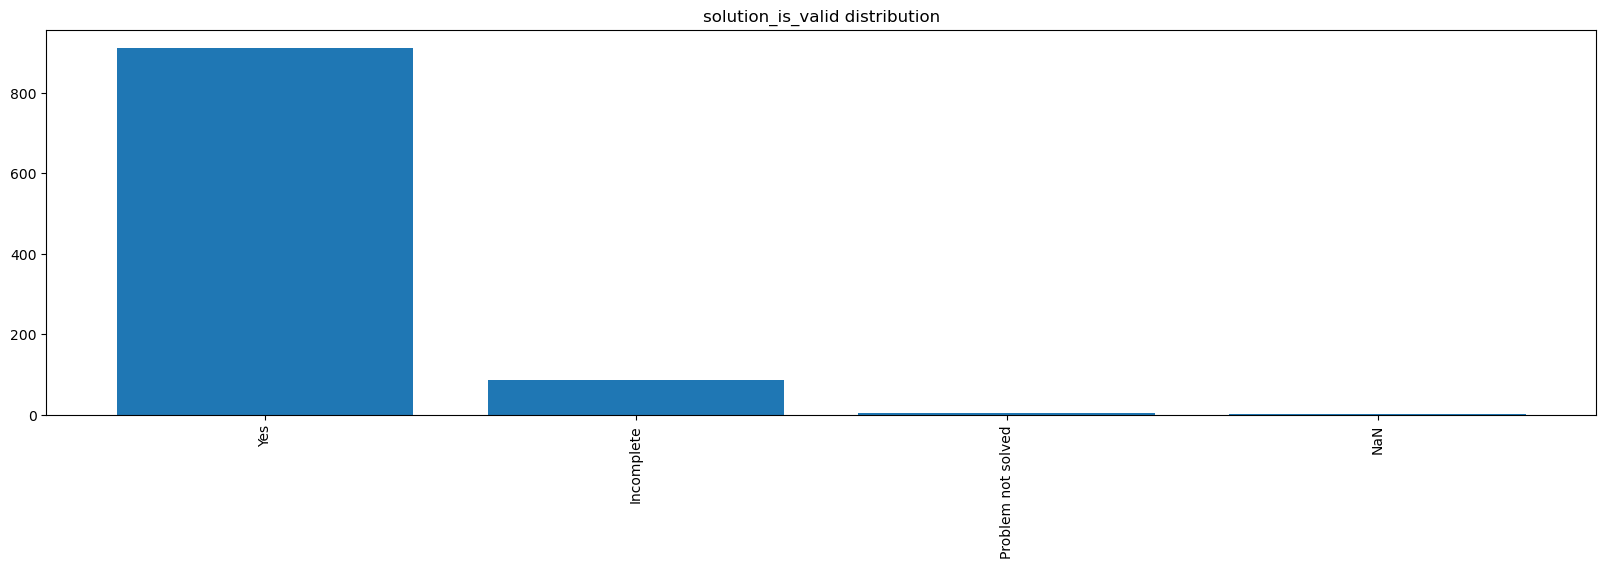

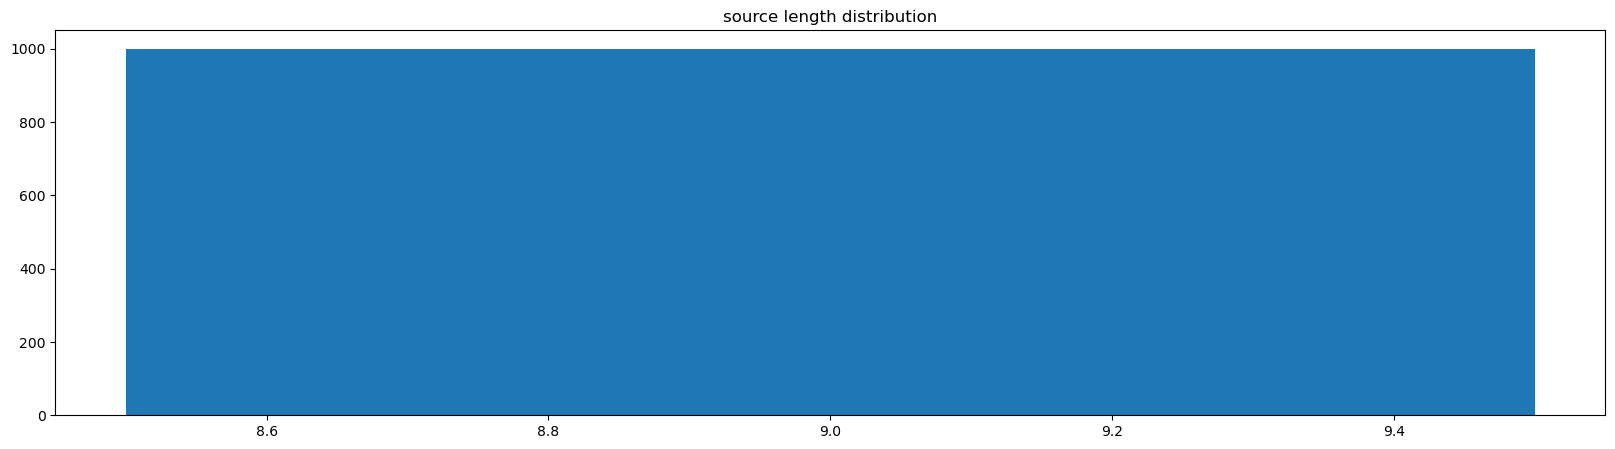

There are 1 source.


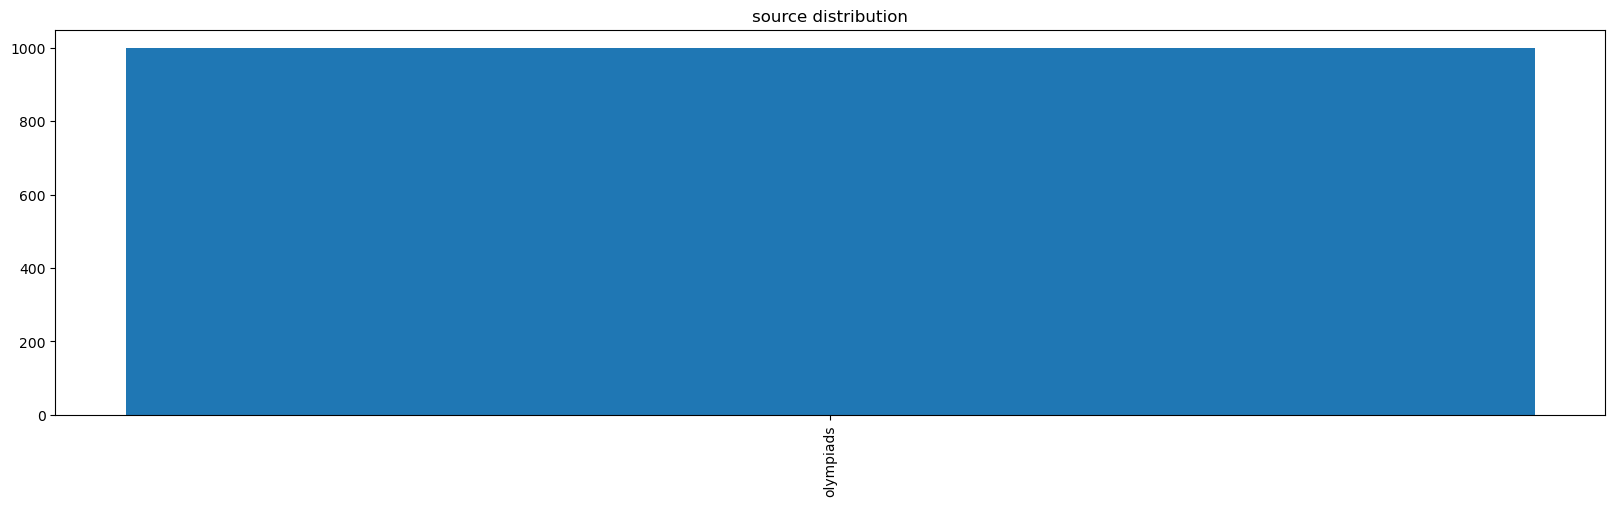

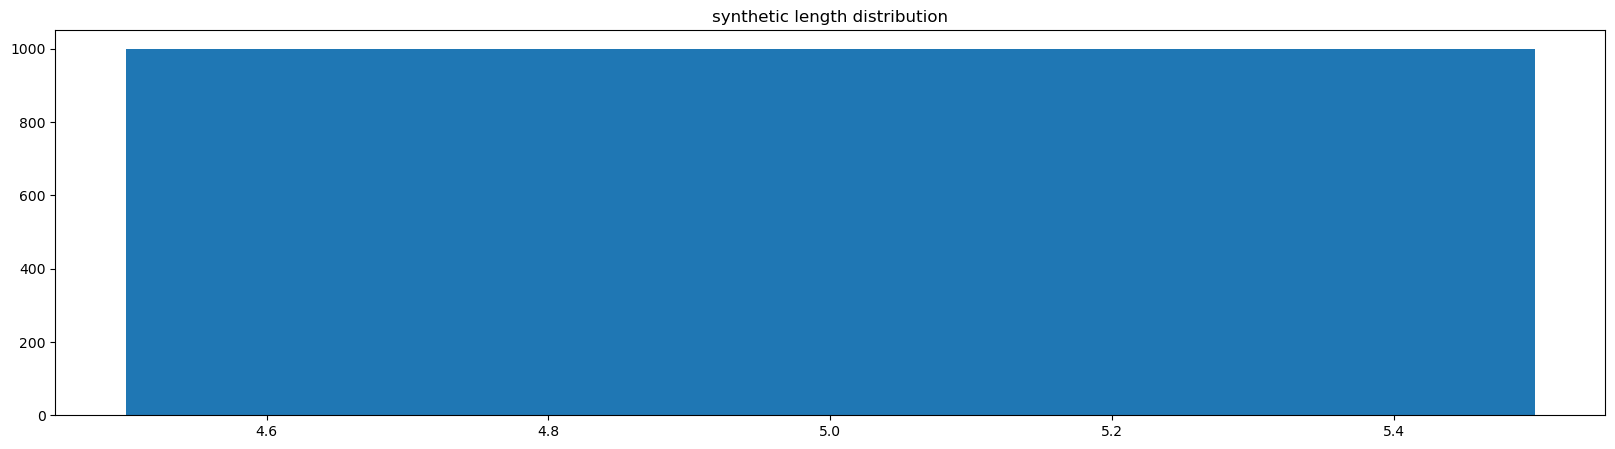

There are 1 synthetic.


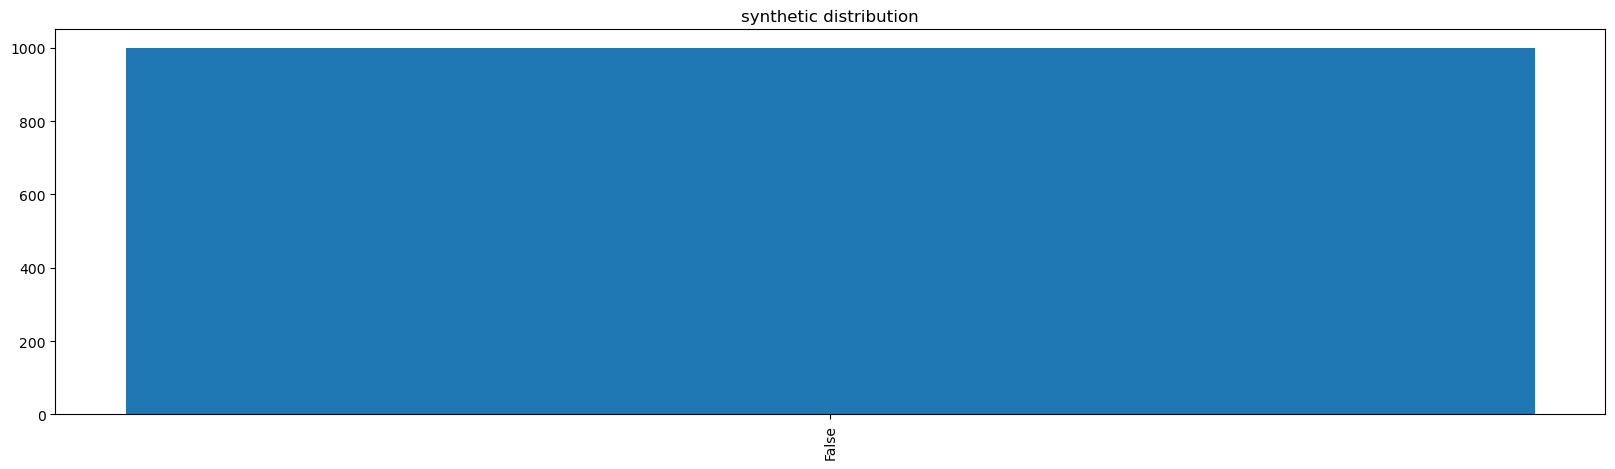

In [7]:
numina_math_1_5 = load_data("NuminaMath-1.5").select(range(1000))
print_distributions(numina_math_1_5, ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'problem_is_valid', 'solution_is_valid', 'source', 'synthetic'])

### Open-R1 Math

Features: ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', 'messages']
Number of samples: 2059
Sample: {
    "answer": " k = 1 ",
    "correctness_count": 2,
    "correctness_llama": null,
    "correctness_math_verify": true,
    "finish_reasons": null,
    "generations": "<think>\nOkay, let's see. I need to find all positive integers k such that 3^k + 5^k is a perfect power, meaning it's equal to m^n where m and n are integers and n > 1. Hmm. So, first, let me understand what the problem is asking. For each k, compute 3^k + 5^k and check if the result is a perfect power. If it is, then k is one of the solutions we need to find.\n\nAlright, let's start by testing small values of k. Maybe there's a pattern or only a few solutions.\n\nFirst, k = 1: 3 + 5 = 8. 8 is 2^3, which is a perfect power (exponent 3). So k = 1 is a soluti

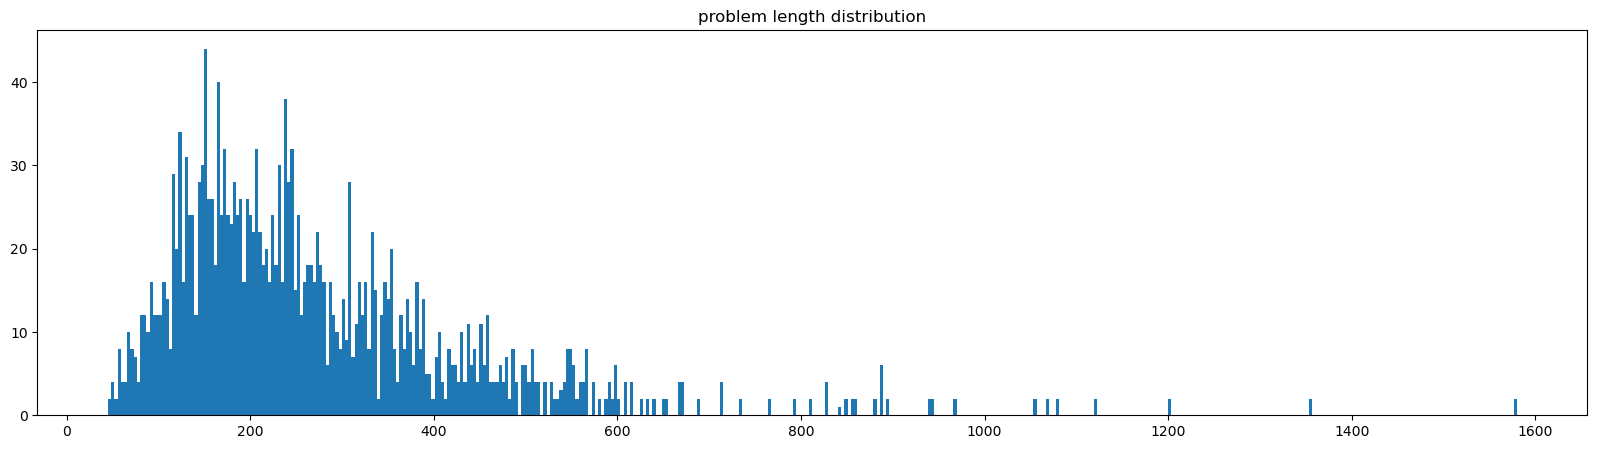

There are 1000 problem.


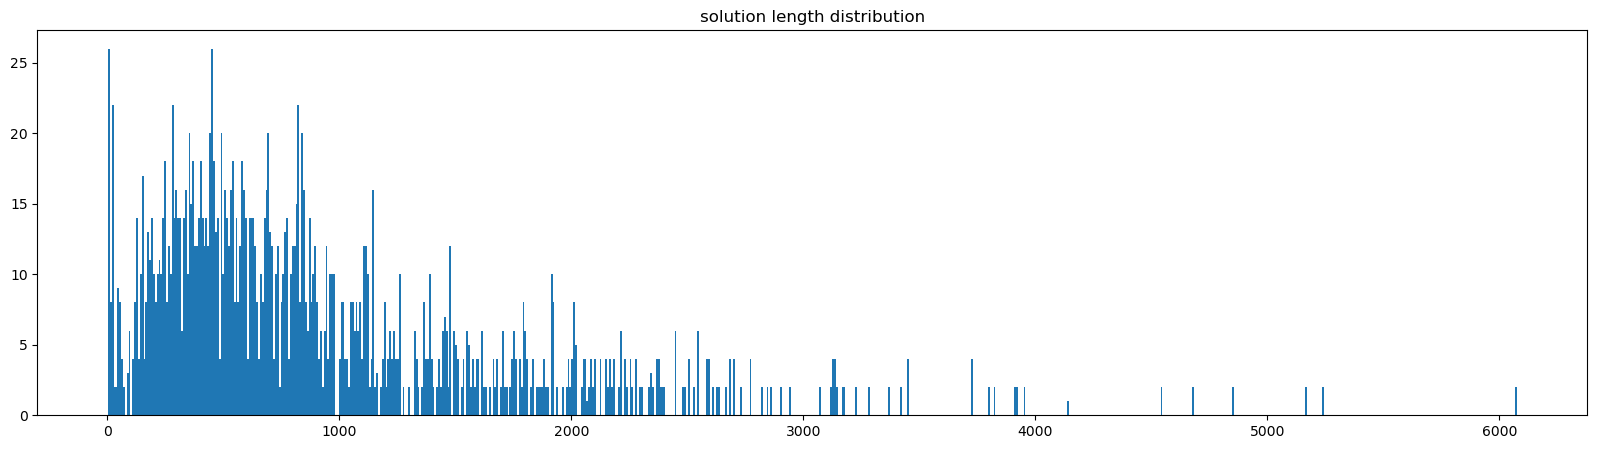

There are 1000 solution.


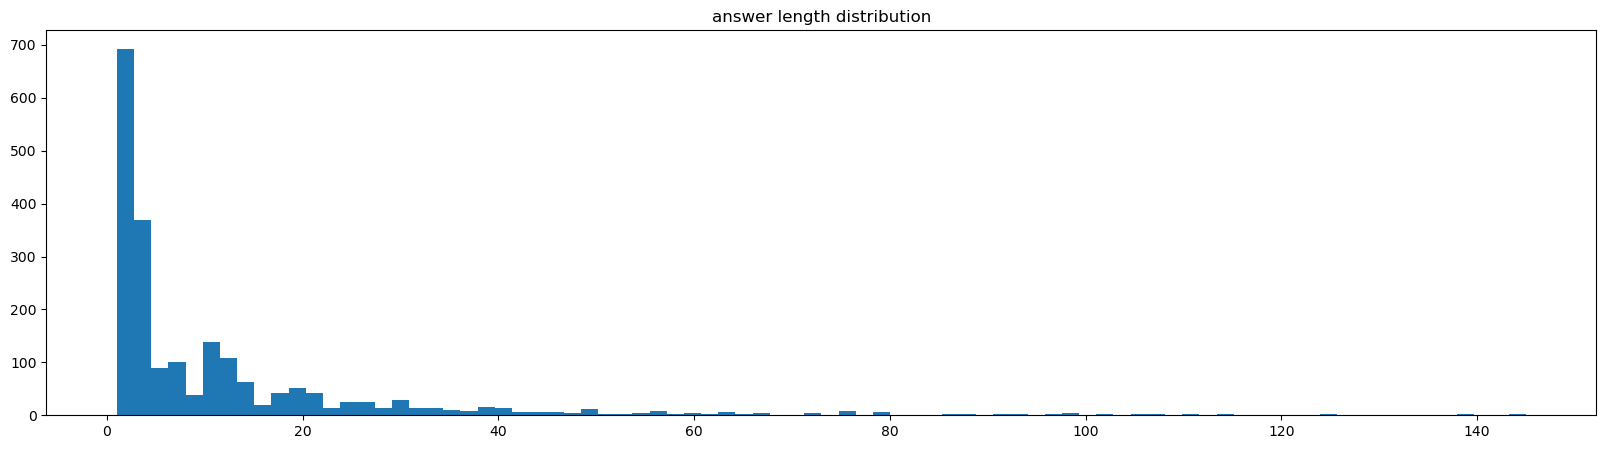

There are 694 answer.


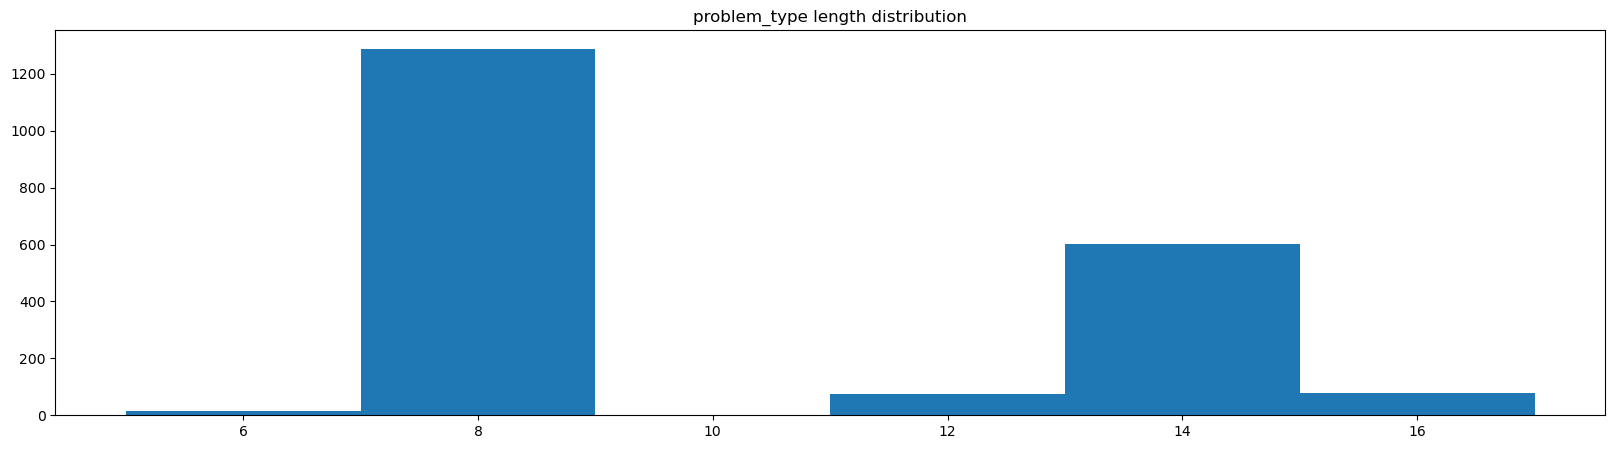

There are 8 problem_type.


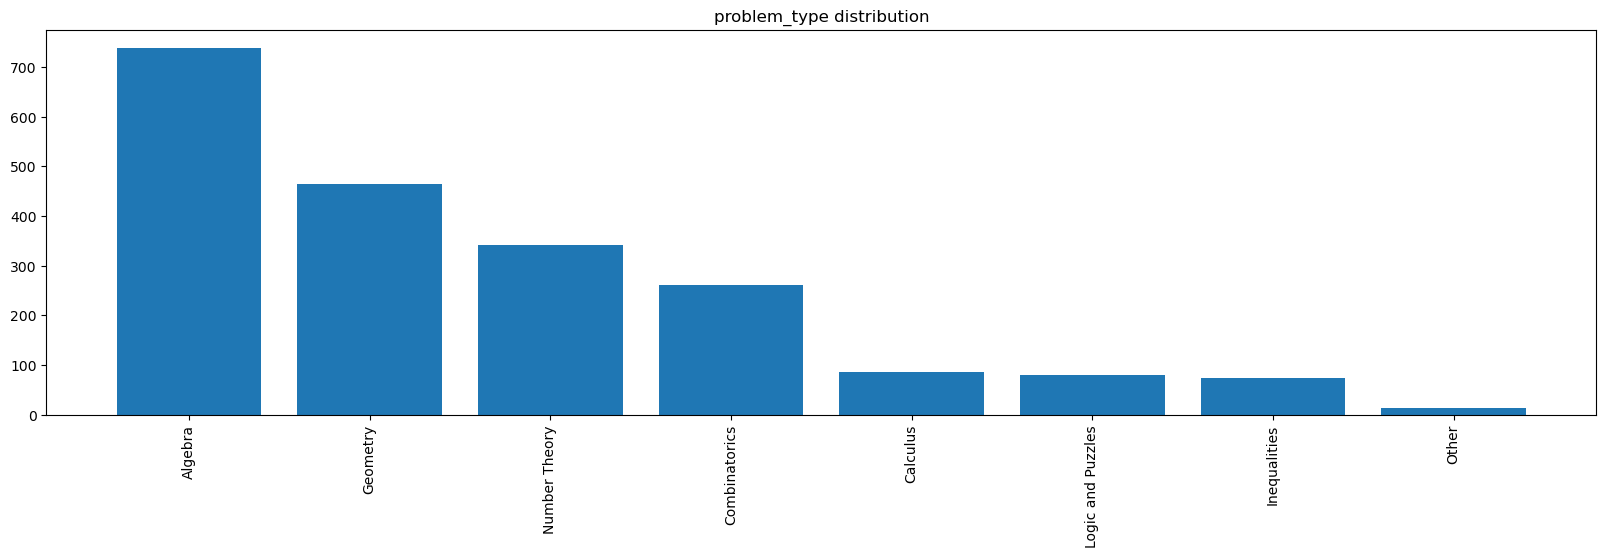

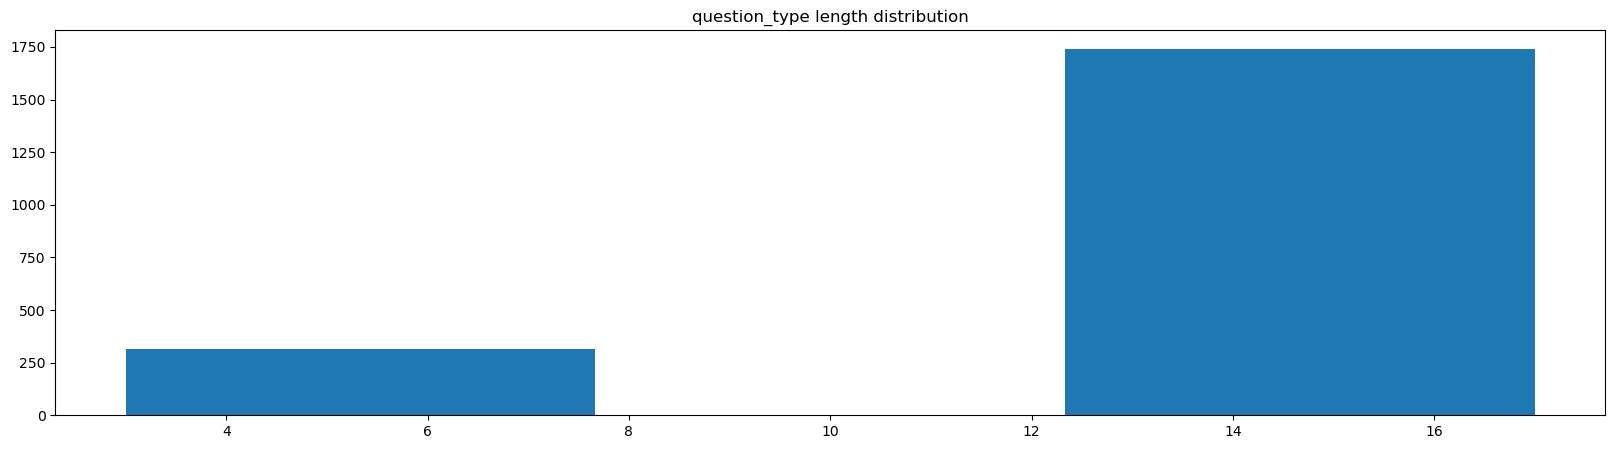

There are 3 question_type.


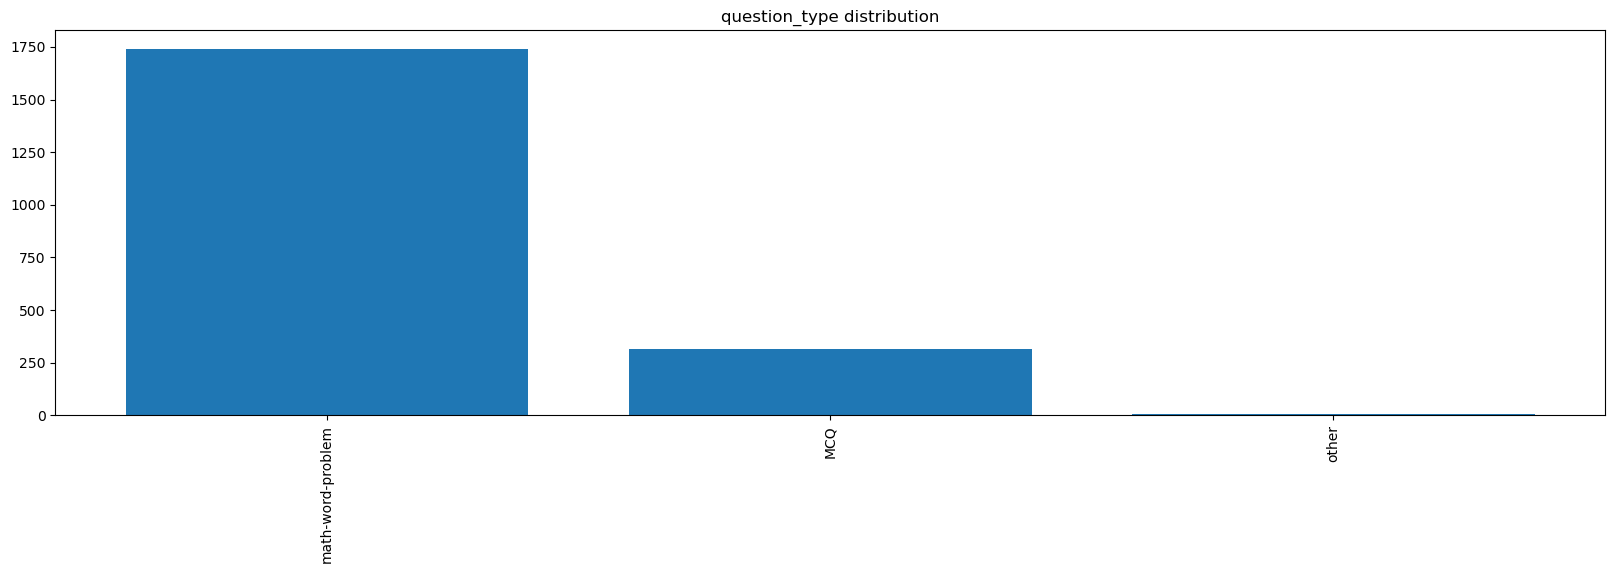

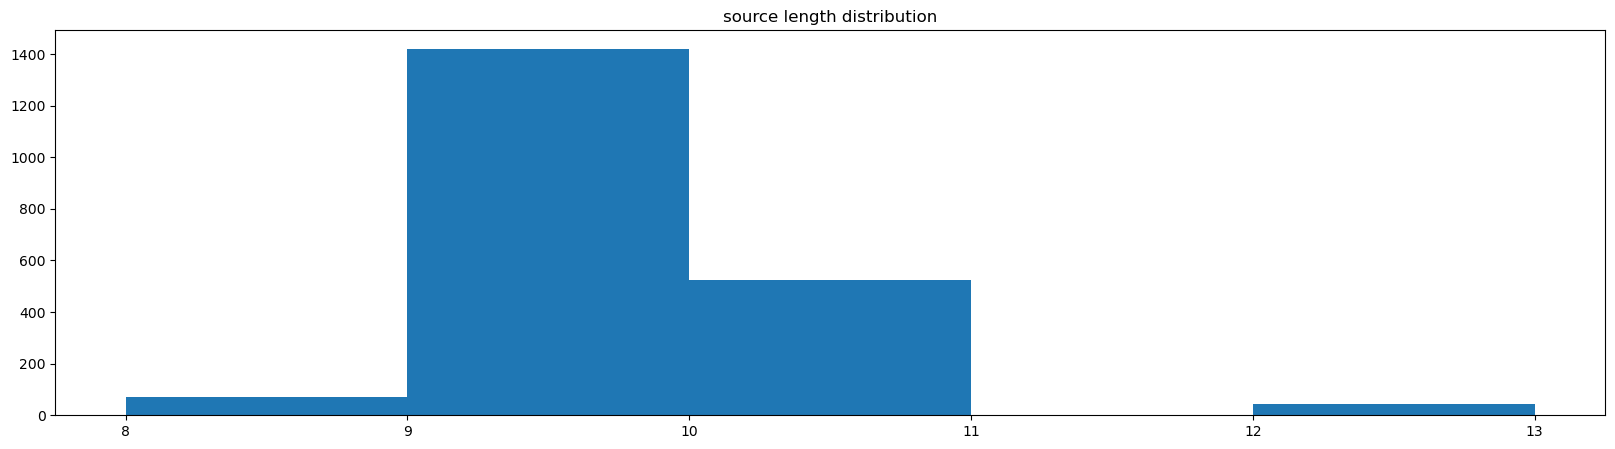

There are 7 source.


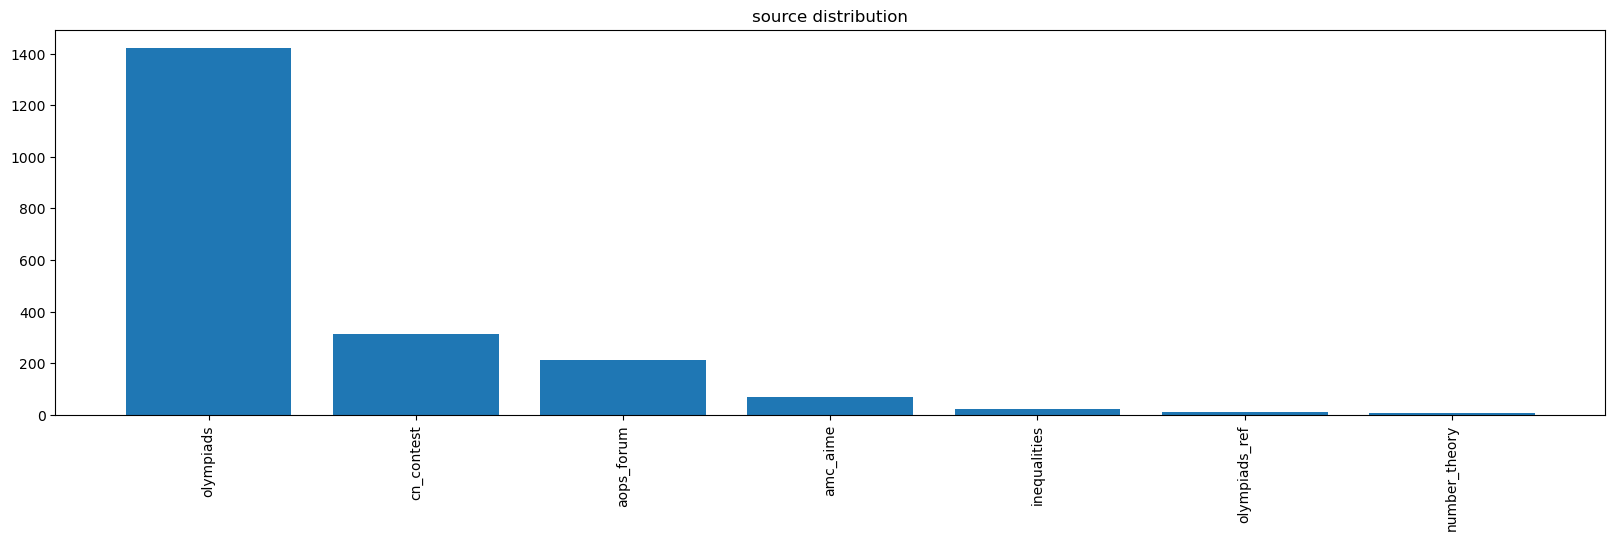

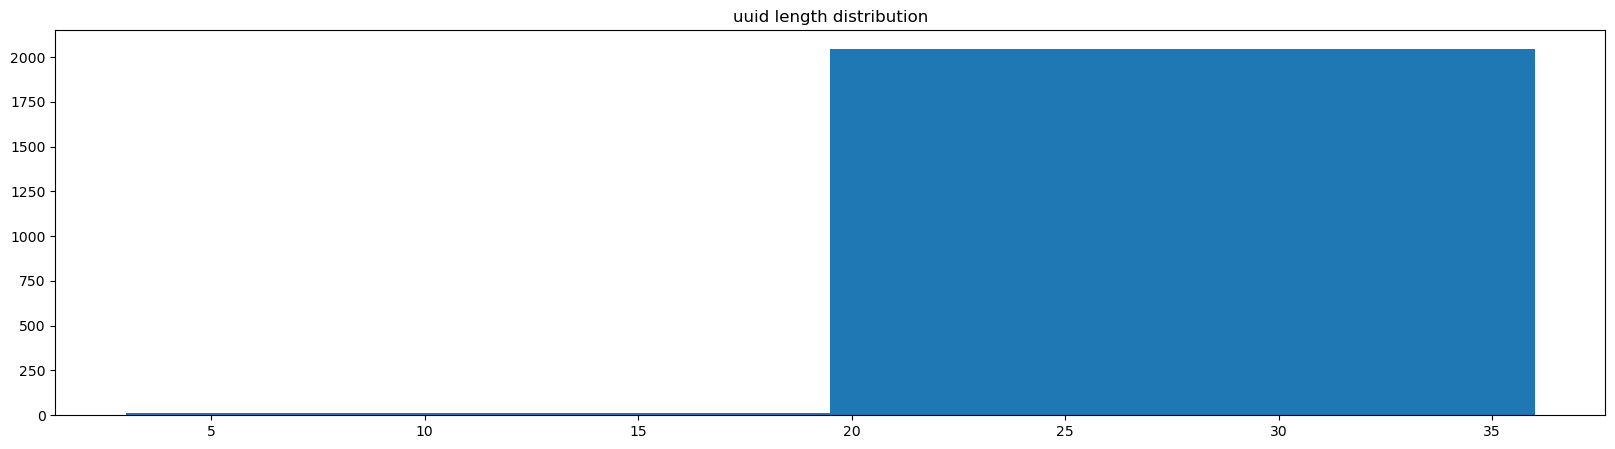

There are 995 uuid.


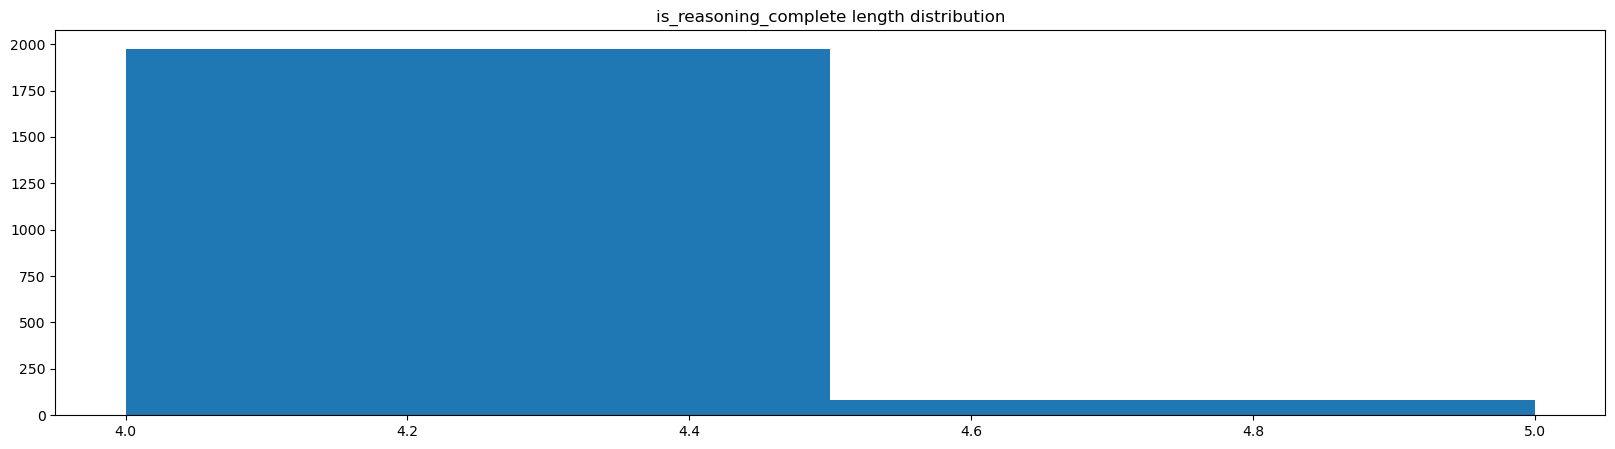

There are 2 is_reasoning_complete.


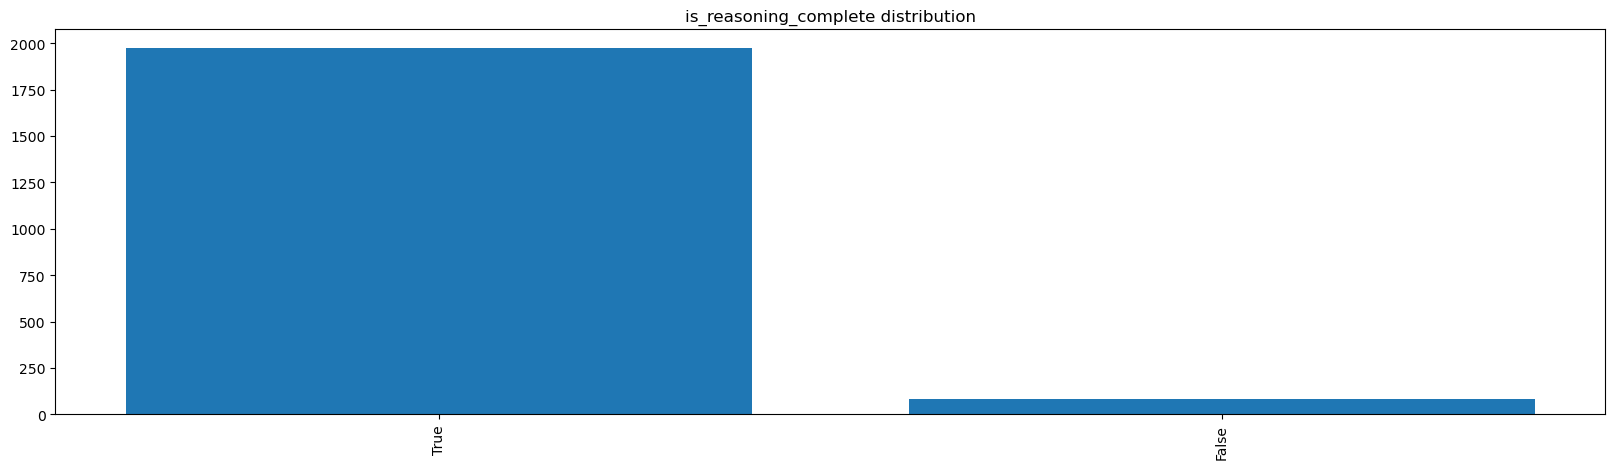

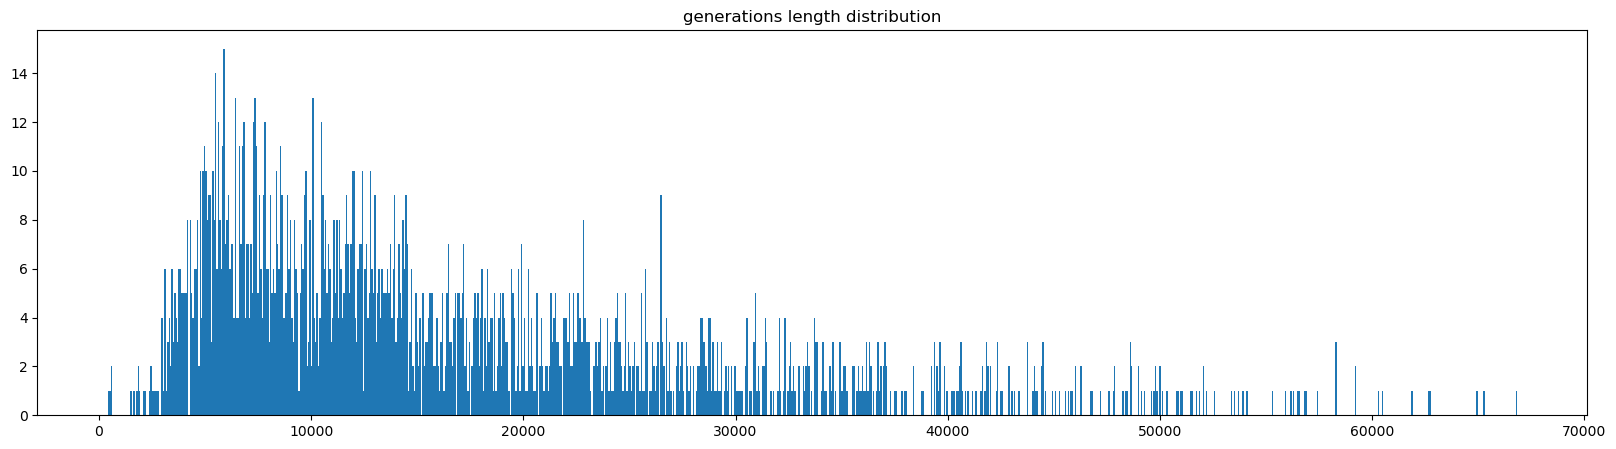

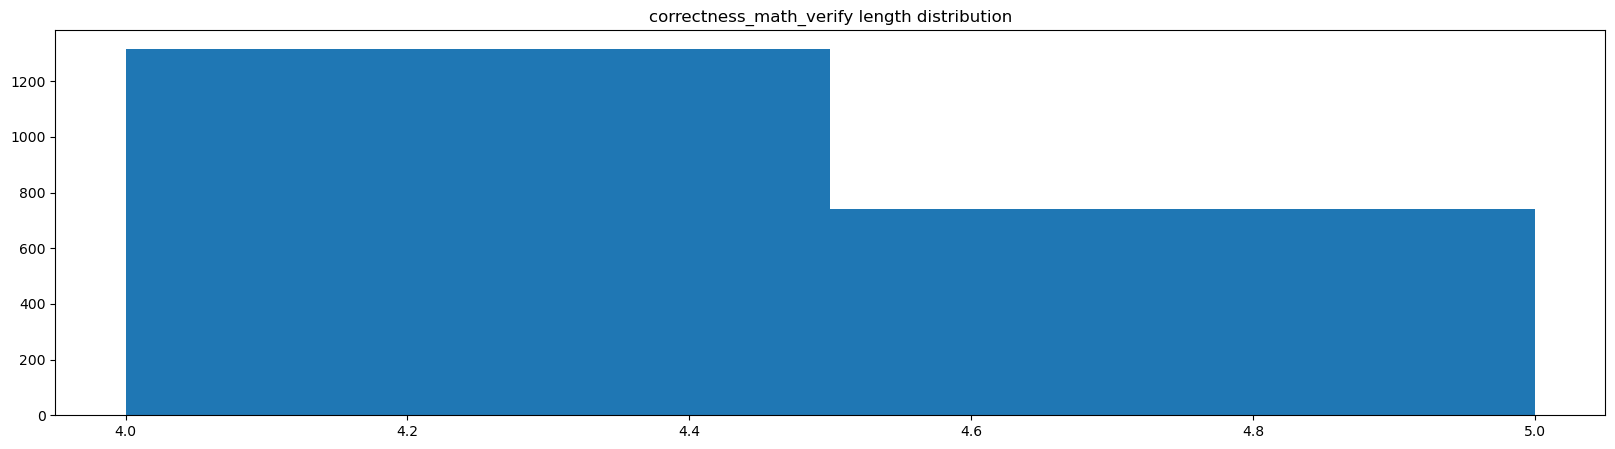

There are 2 correctness_math_verify.


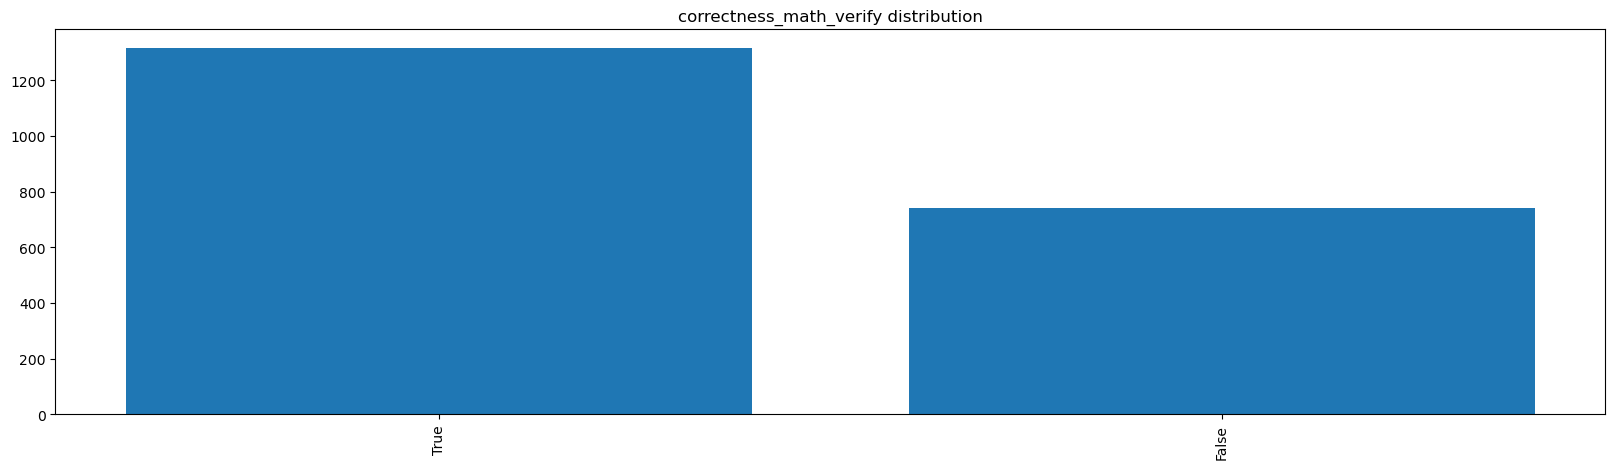

Number of 'None' correctness_llama: 1472


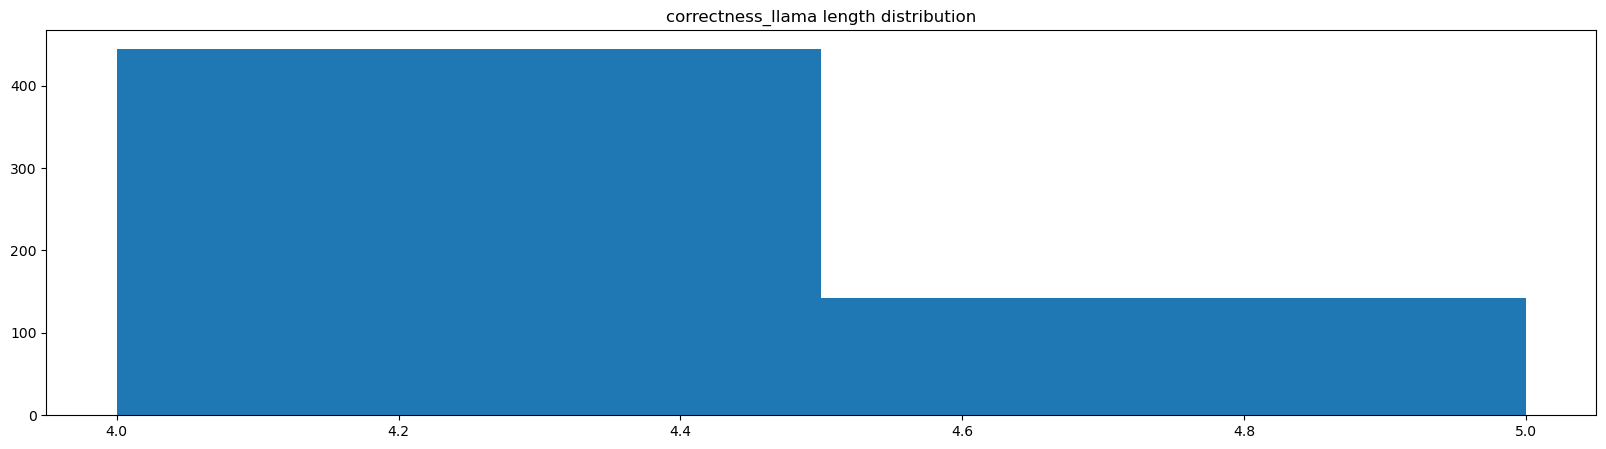

There are 2 correctness_llama.


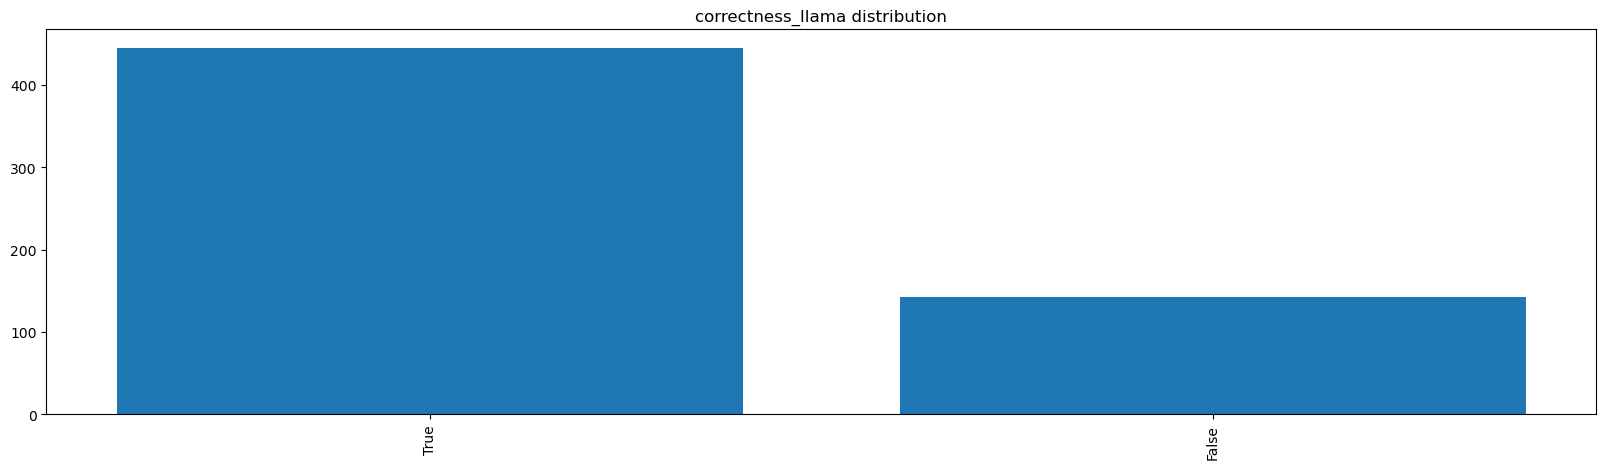

Number of 'None' finish_reasons: 1735


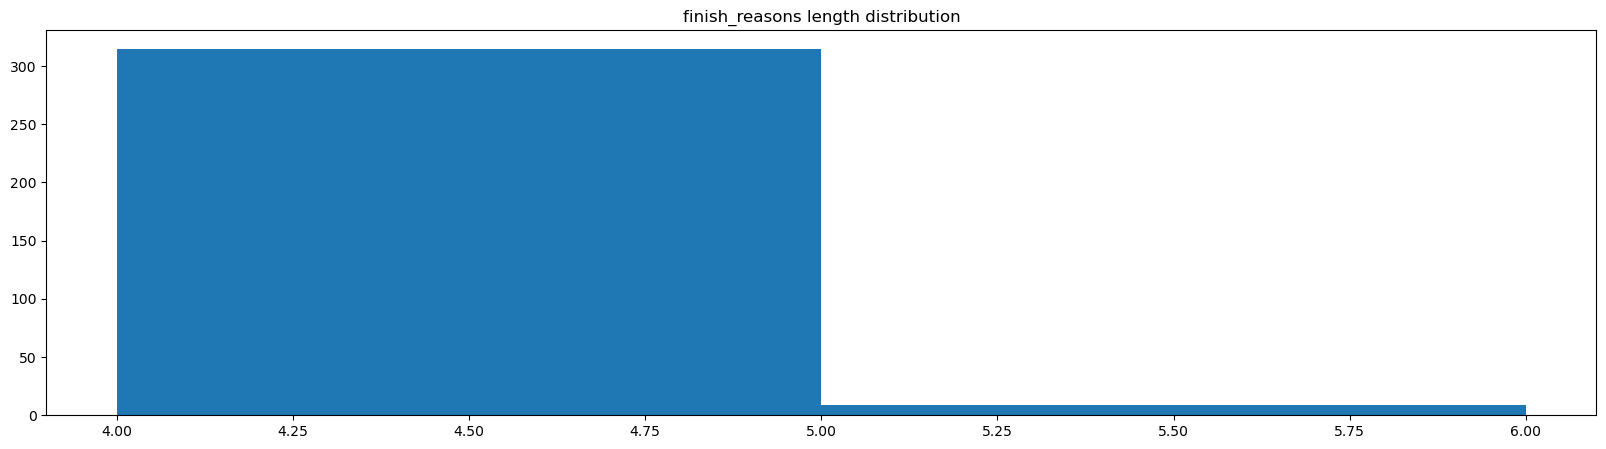

There are 2 finish_reasons.


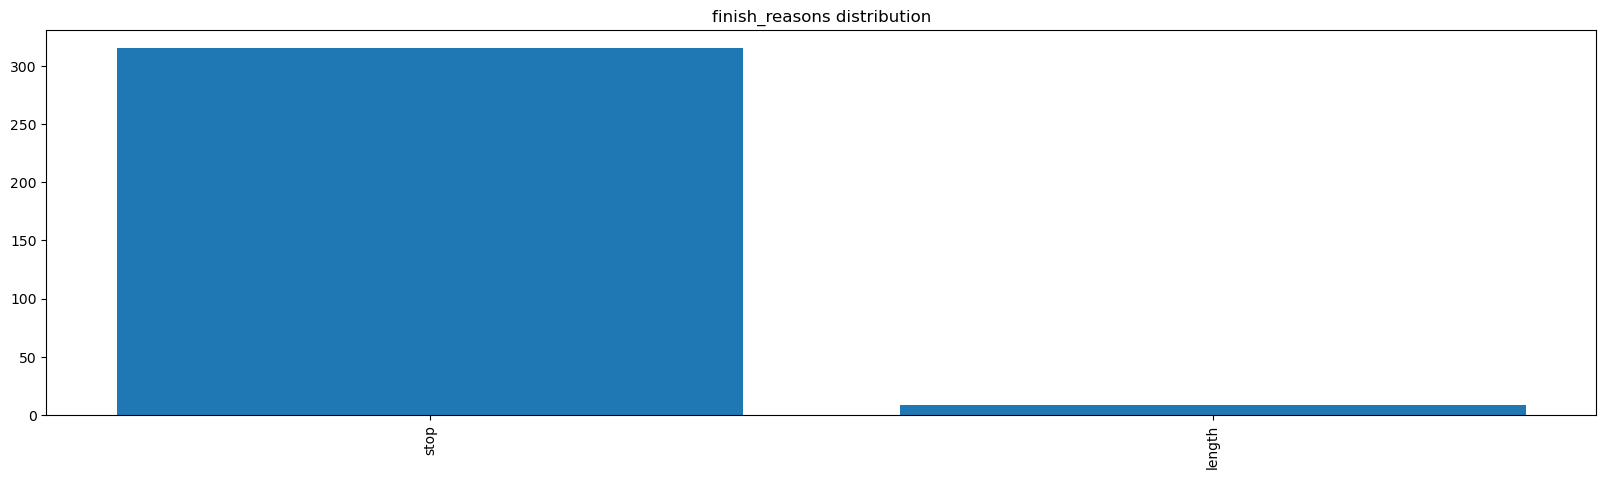

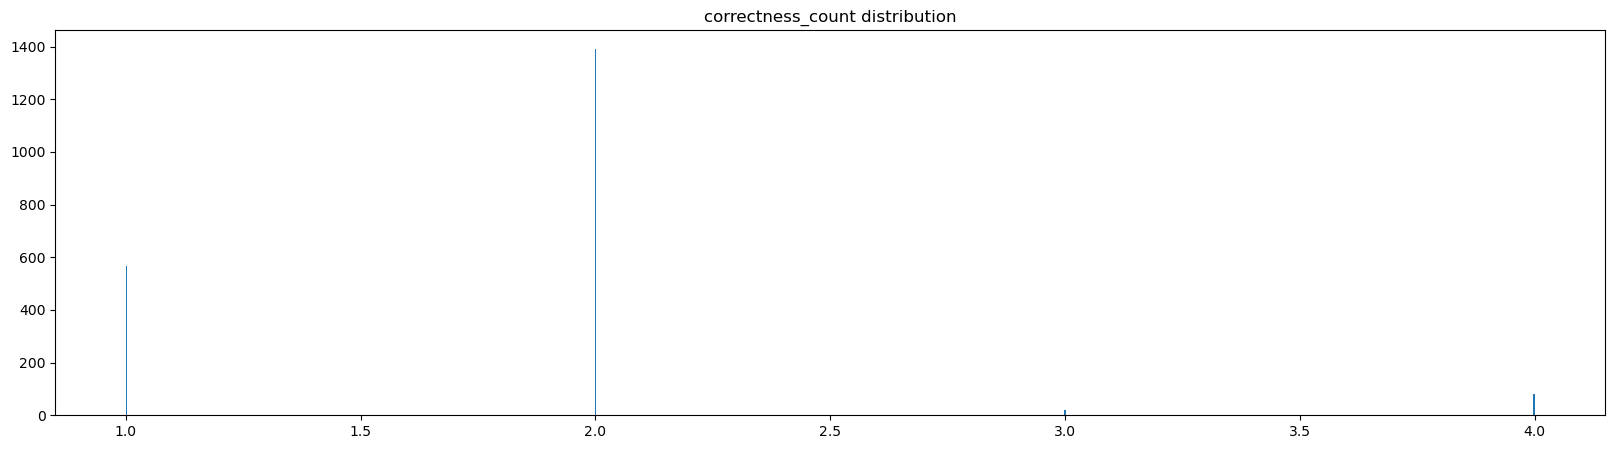

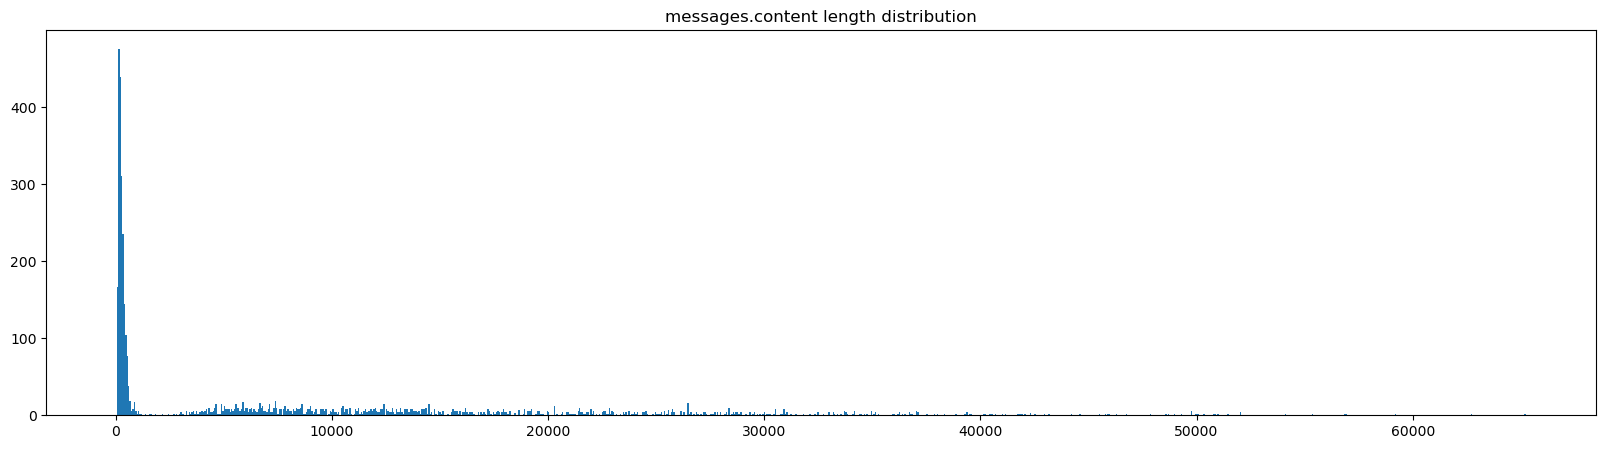

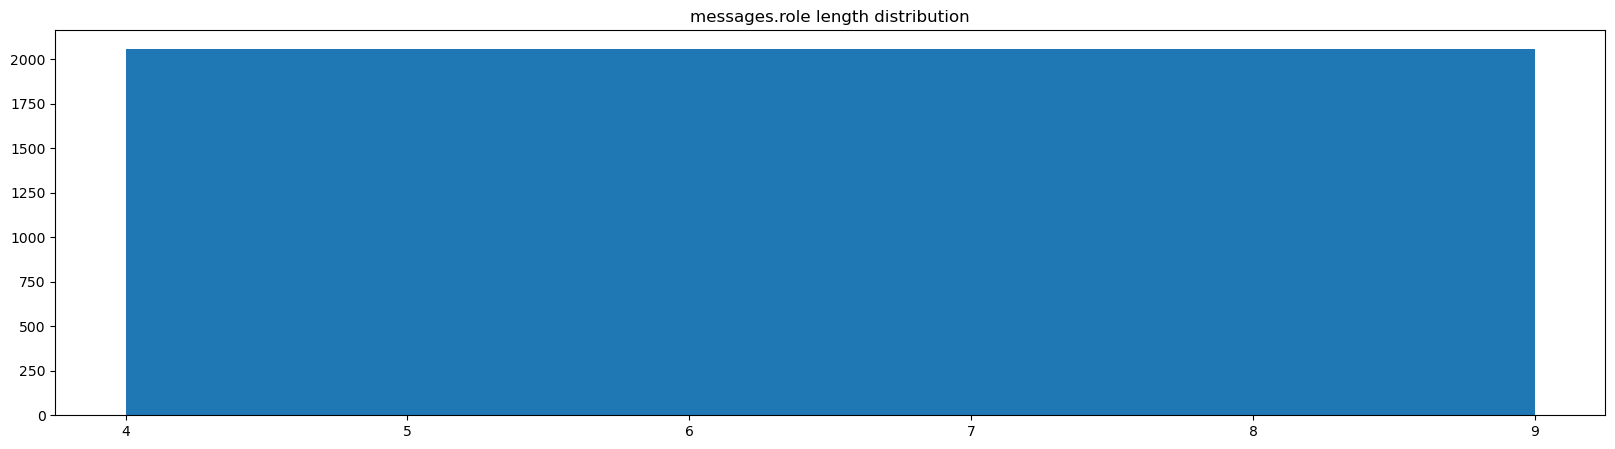

There are 2 messages.role.


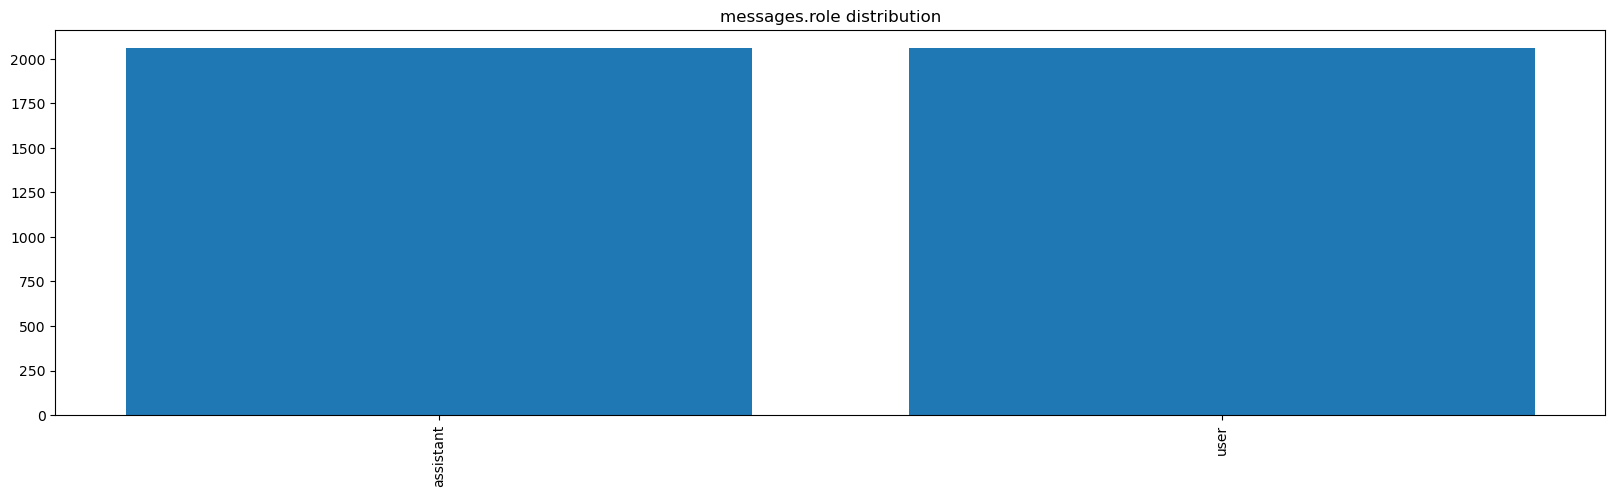

In [8]:
open_r1_math = load_data("OpenR1-Math-220k").select(range(1000))
open_r1_math = flatten_features(open_r1_math, ['generations', 'is_reasoning_complete', 'correctness_math_verify', 'correctness_llama', 'finish_reasons'])
print_distributions(open_r1_math, ['problem', 'solution', 'answer', 'problem_type', 'question_type', 'source', 'uuid', 'is_reasoning_complete', 'generations', 'correctness_math_verify', 'correctness_llama', 'finish_reasons', 'correctness_count', 'messages'])

### OpenThoughts 2

Features: ['conversations', 'question', 'source', 'id']
Number of samples: 1000
Sample: {
    "conversations": [
        {
            "from": "user",
            "value": "Problem 1. Let $\\left(a_{n}\\right)_{n \\geq 1}$ be a sequence of strictly positive real numbers, with the property that the sequence $\\left(a_{n+1}-a_{n}\\right)_{n \\geq 1}$ is convergent, with a non-zero limit. Calculate the limit\n\n$$\n\\lim _{n \\rightarrow \\infty}\\left(\\frac{a_{n+1}}{a_{n}}\\right)^{n}\n$$\n\nMathematical Gazette"
        },
        {
            "from": "assistant",
            "value": "<think>\nOkay, so I need to figure out the limit of (a_{n+1}/a_n)^n as n approaches infinity, given that the sequence (a_{n+1} - a_n) converges to a non-zero limit. Hmm, let's start by understanding what's given and what's being asked.\n\nFirst, the sequence (a_n) consists of strictly positive real numbers. That's important because we'll be dealing with ratios, so we don't have to worry about division b

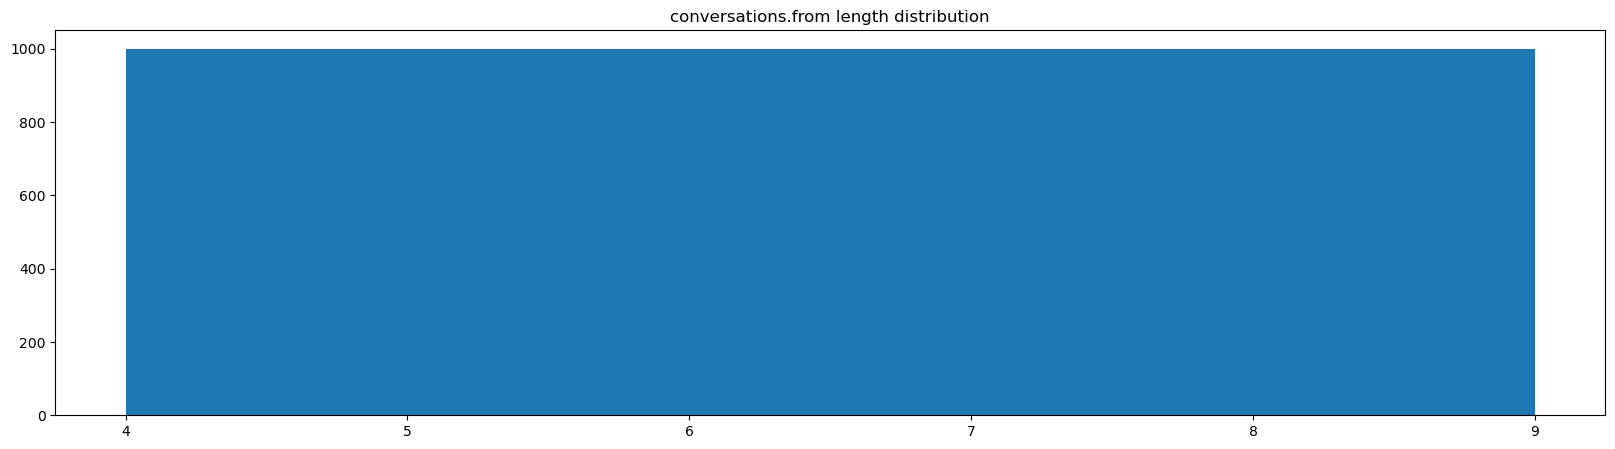

There are 2 conversations.from.


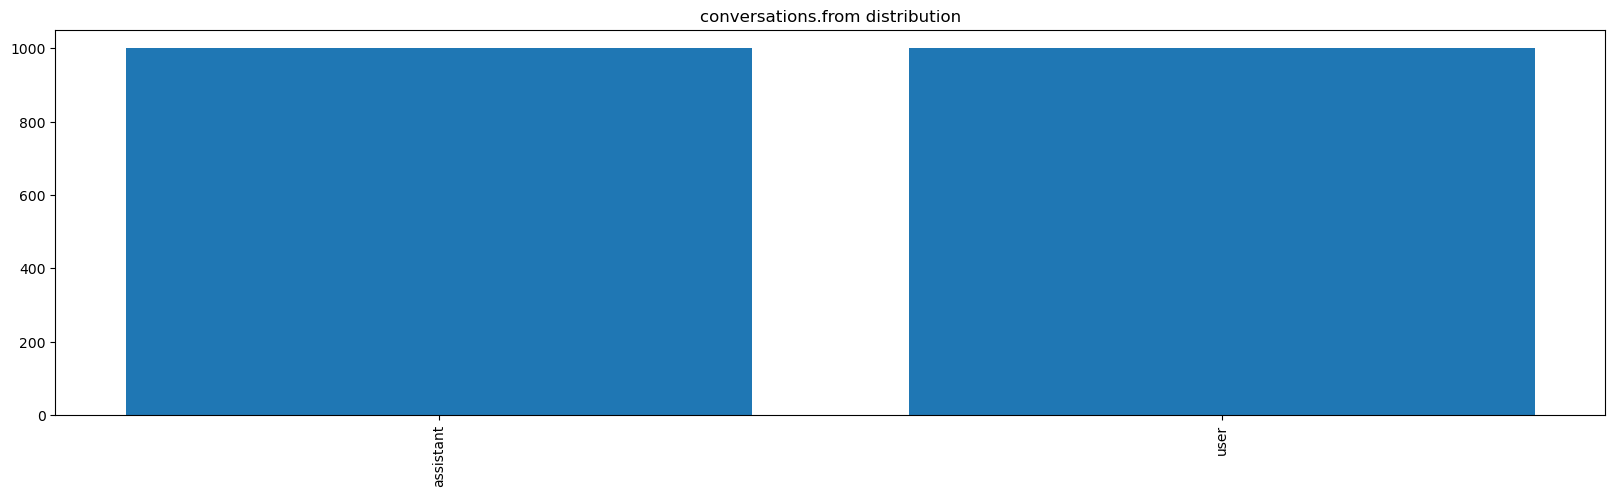

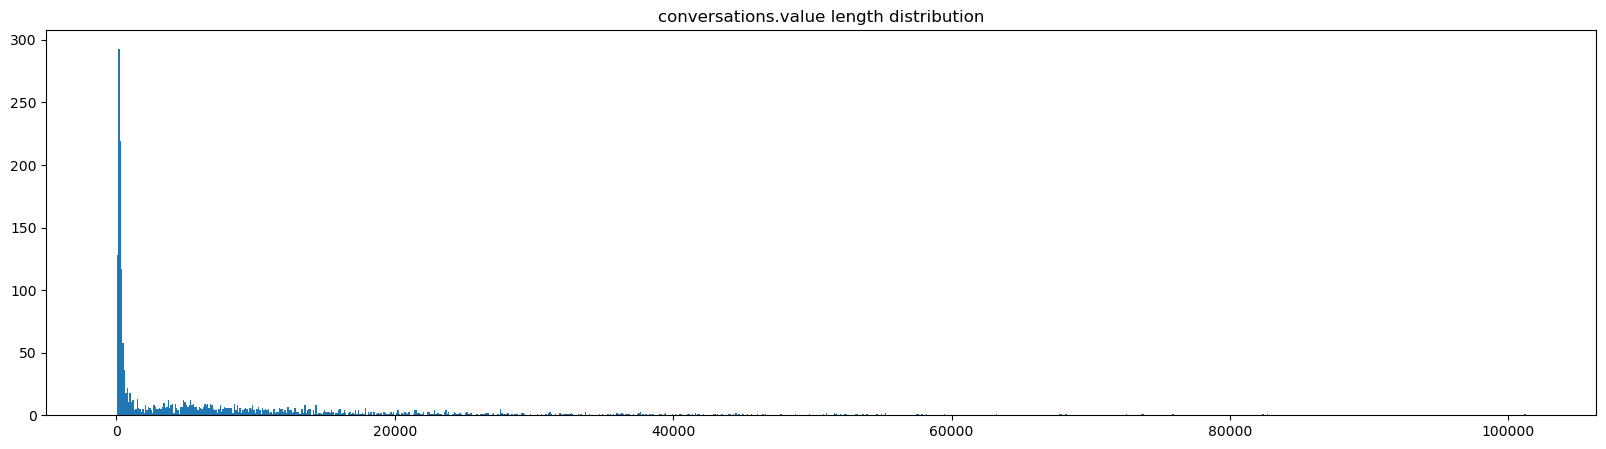

Number of 'None' question: 257


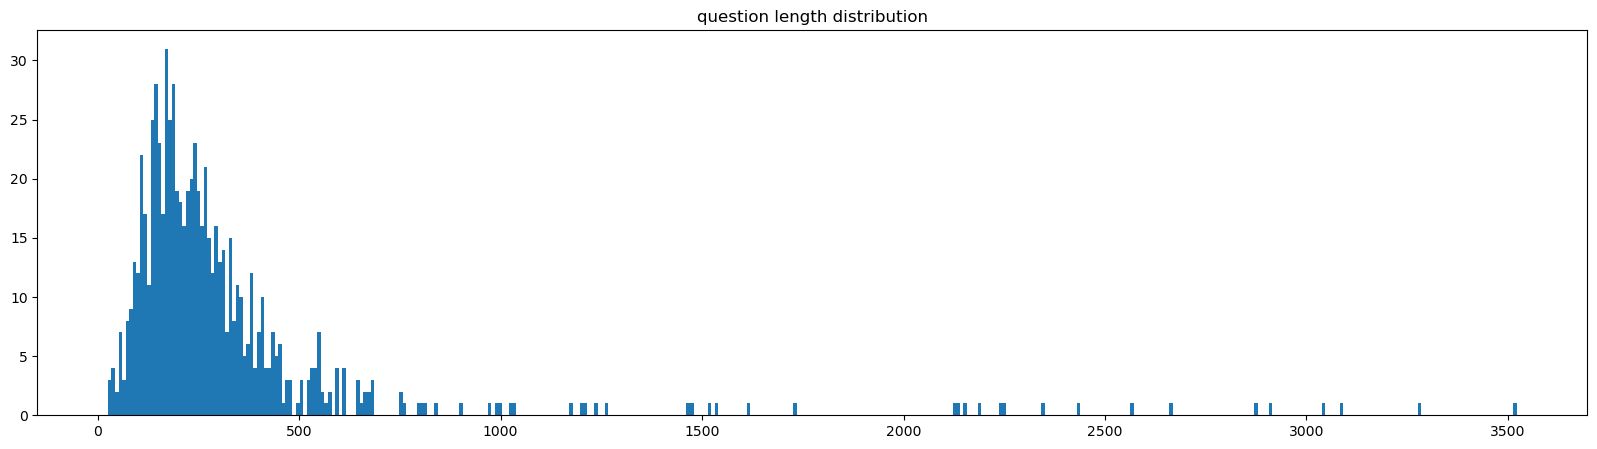

There are 742 question.
Number of 'None' source: 844


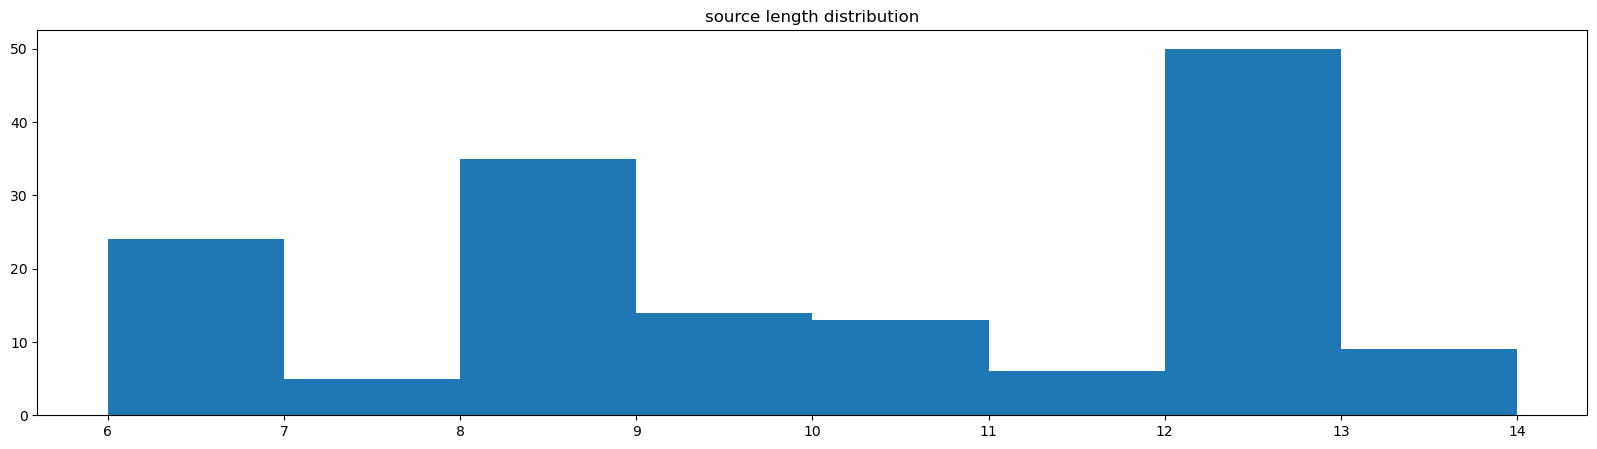

There are 10 source.


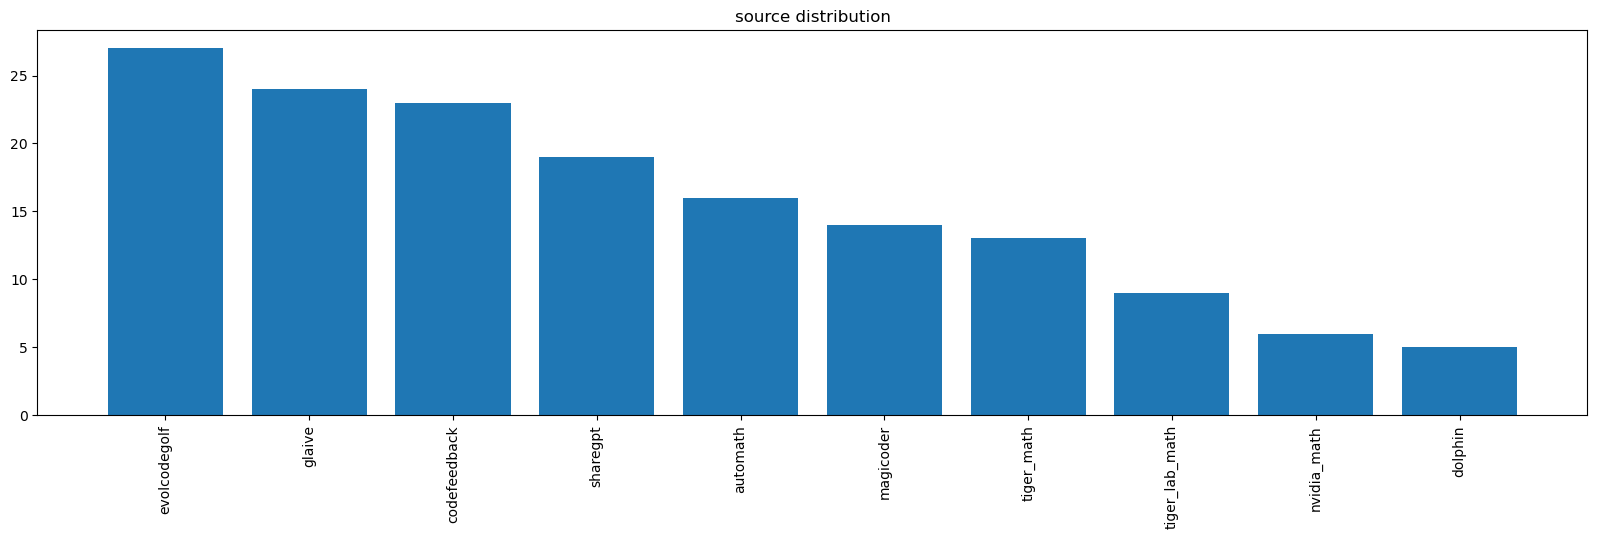

Number of 'None' id: 956


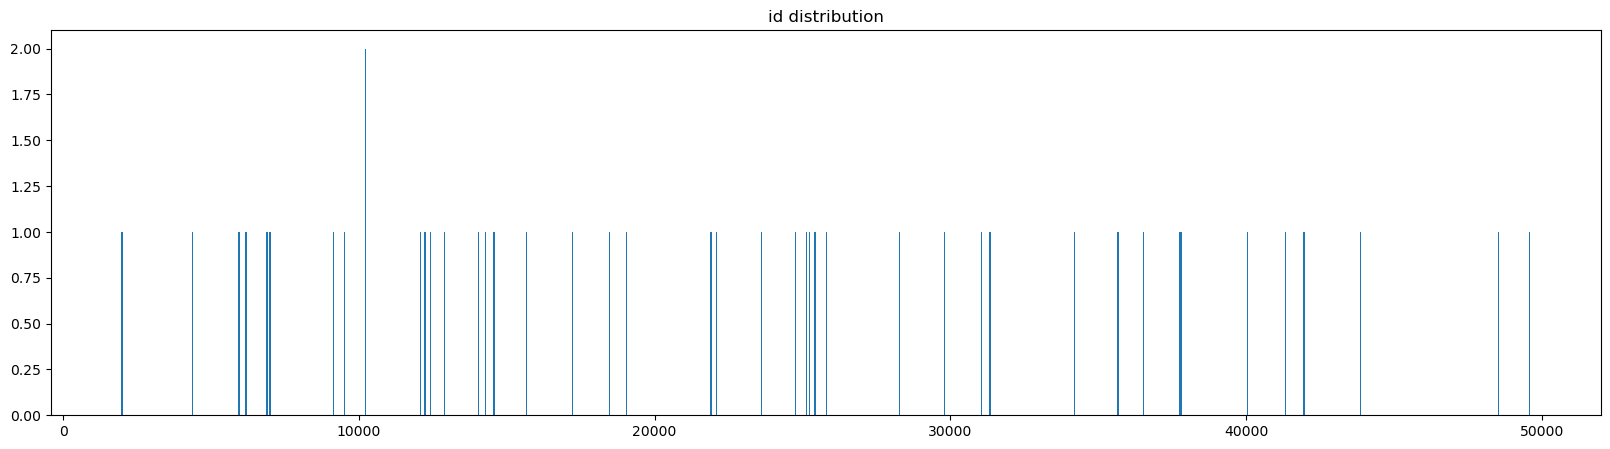

In [9]:
open_thoughts_2 = load_data("OpenThoughts2-1M").select(range(1000))
print_distributions(open_thoughts_2, ['conversations', 'question', 'source', 'id'])

### Pensez 0.1

In [10]:
# TODO: manually load every subset
# pensez_0_1 = load_data("Pensez-v0.1/*")
# print_distributions(pensez_0_1, ['question', 'answer', 'source', 'domain', 'llama8b_solve_rate'])

### S1K 1.1

Features: ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt', 'gemini_grade', 'gemini_grade_reason', 'deepseek_grade', 'deepseek_grade_reason']
Number of samples: 1000
Sample: {
    "cot_type": "math",
    "deepseek_attempt": "To solve the problem, we need to find the monic cubic polynomial \\( p(x) \\) with roots \\( \\sin^2(1^\\circ) \\), \\( \\sin^2(3^\\circ) \\), and \\( \\sin^2(9^\\circ) \\). We then evaluate \\( p\\left(\\frac{1}{4}\\right) \\) and express it in the form \\( \\frac{\\sin(a^\\circ)}{n \\sin(b^\\circ)} \\) where \\( 0 < a, b \\leq 90^\\circ \\) and \\( a, b, n \\) are positive integers. Finally, we find \\( a + b + n \\).\n\n1. **Roots and Polynomial Formation**:\n   The polynomial \\( p(x) \\) is given by:\n   \\[\n   p(x) = (x - \\sin^2(1^\\circ))(x - \\sin^2(3^\\circ))(x - \\sin^2(9^\\circ))\n   \\]\n\n2. **Substitution**:\n   We need to evaluate \\( p

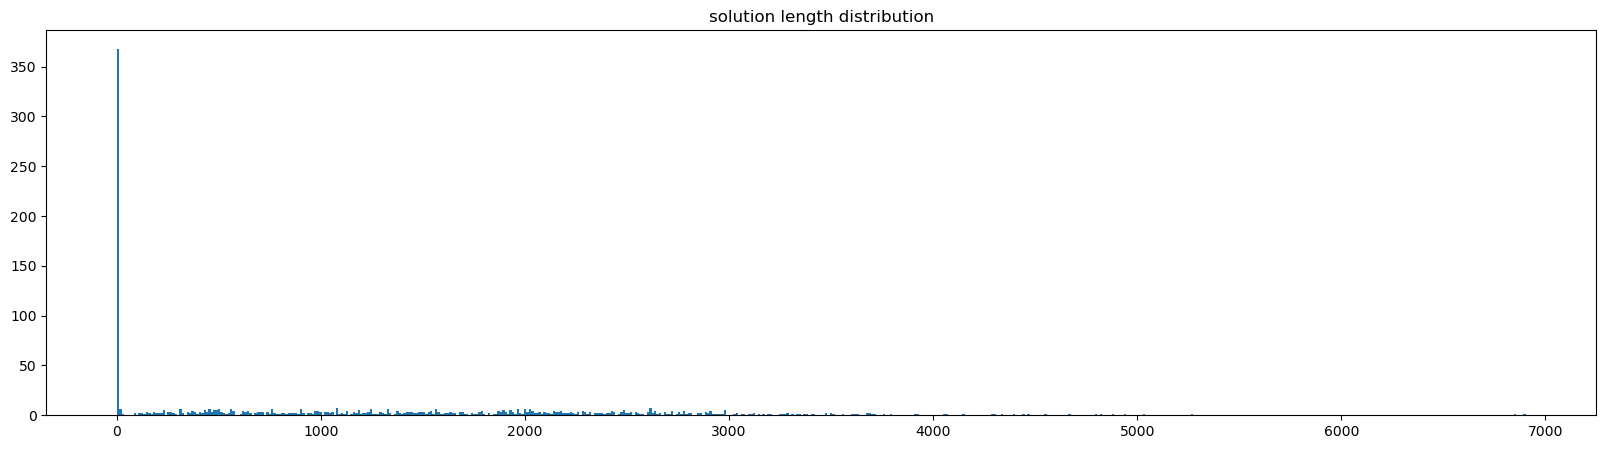

There are 906 solution.


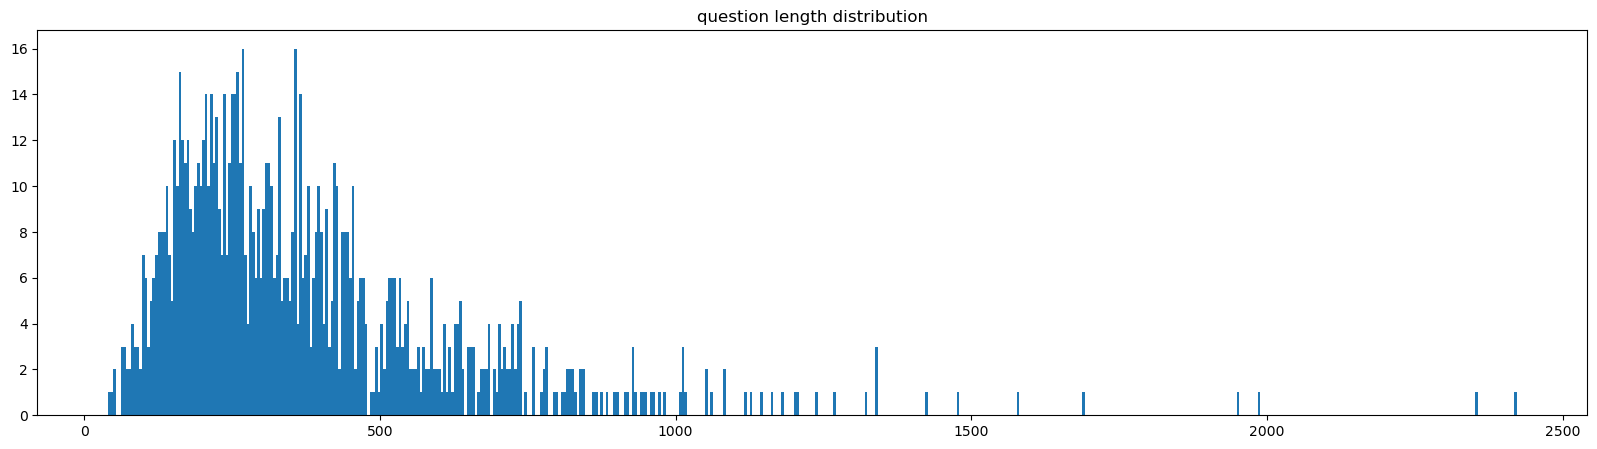

There are 1000 question.


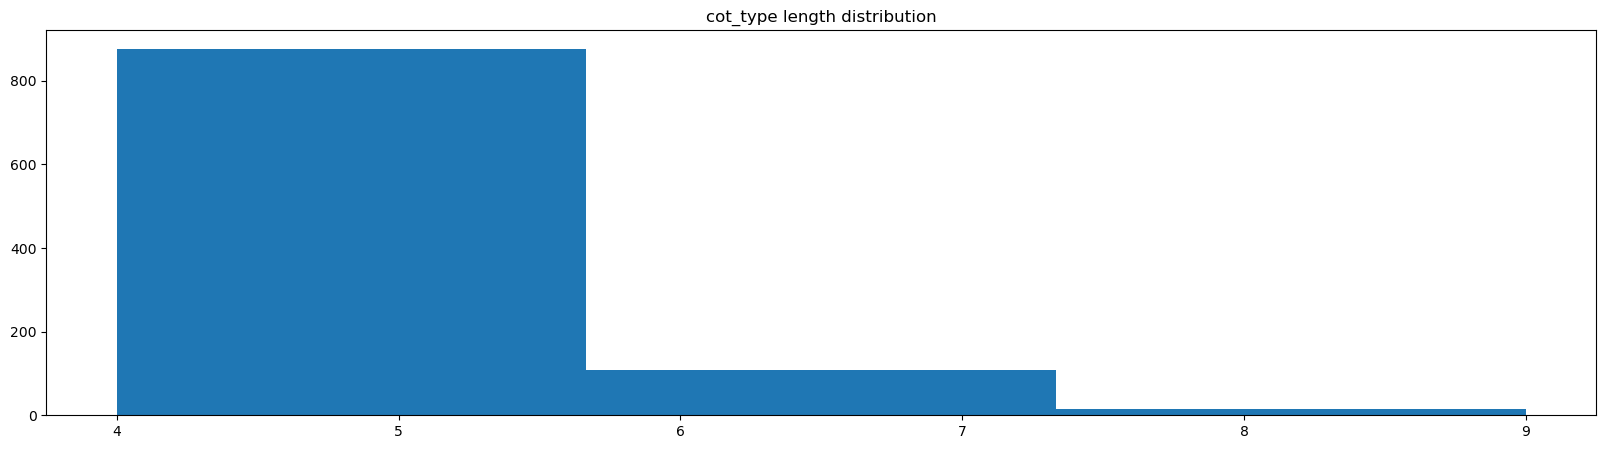

There are 3 cot_type.


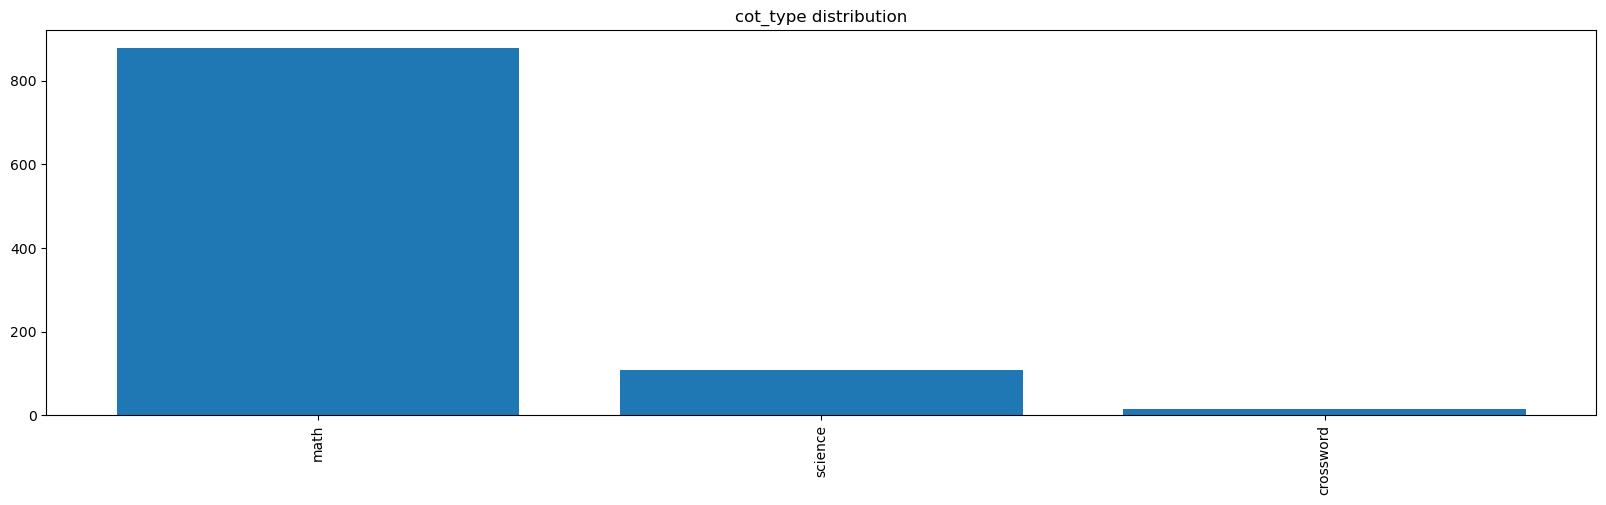

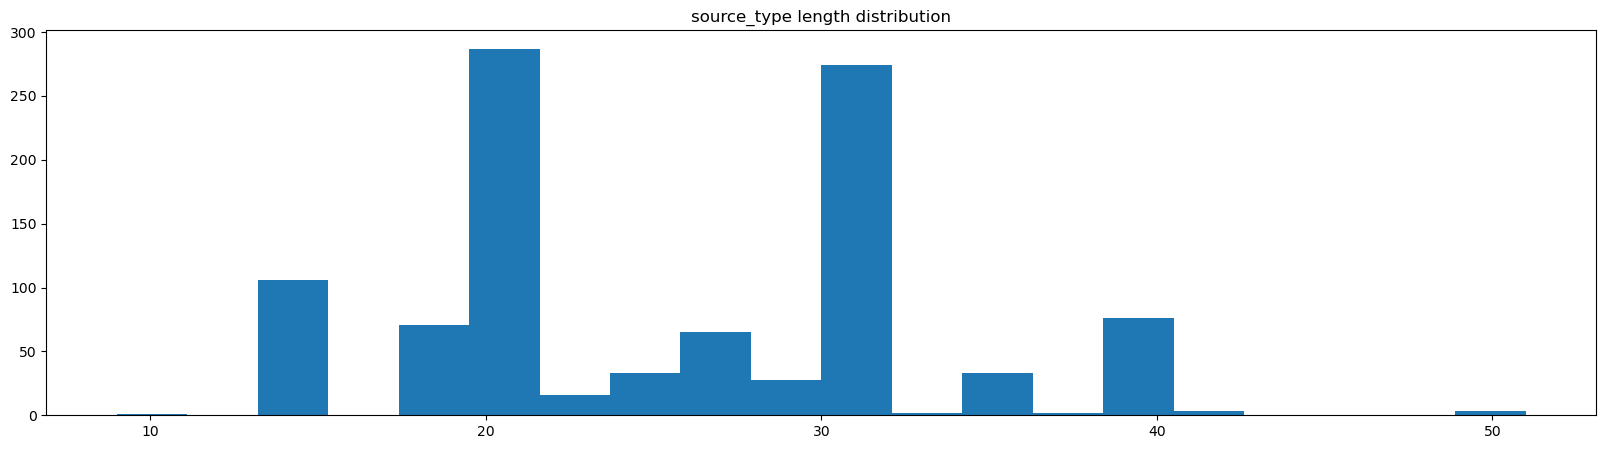

There are 34 source_type.


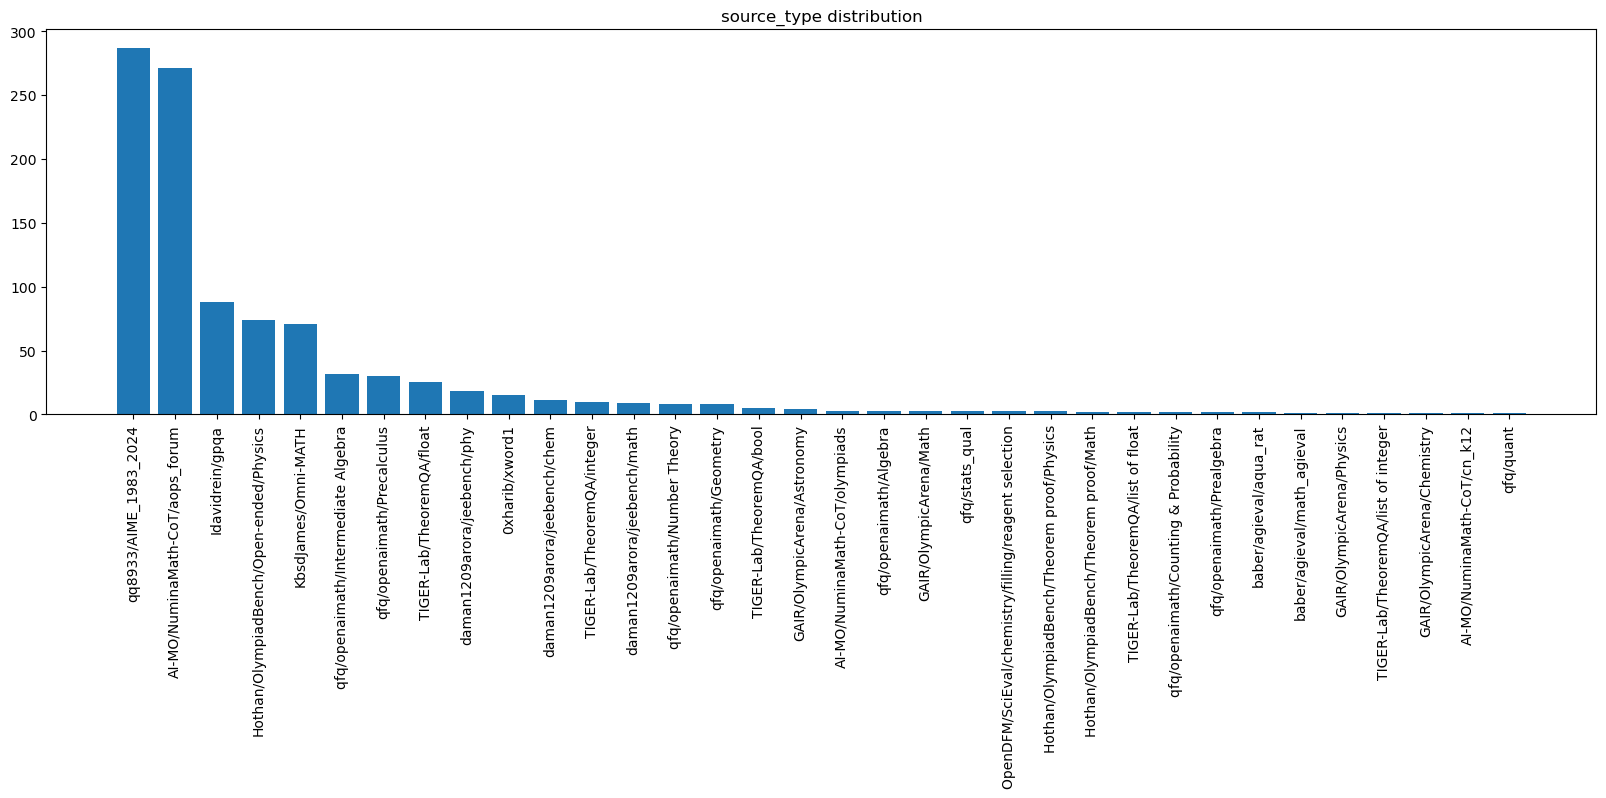

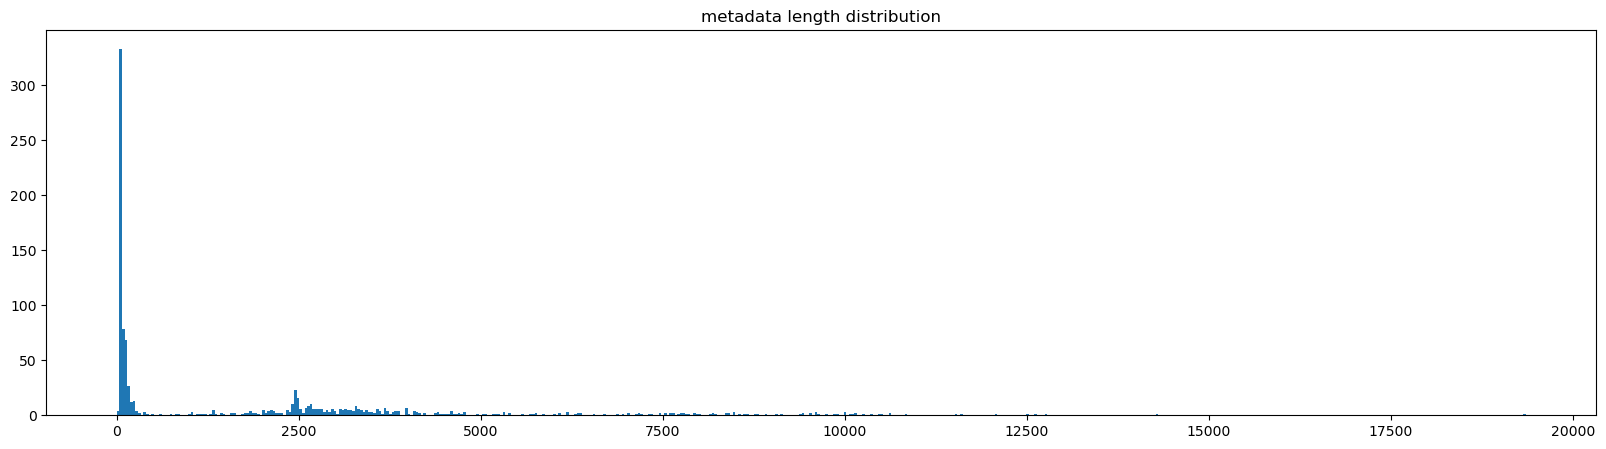

There are 948 metadata.


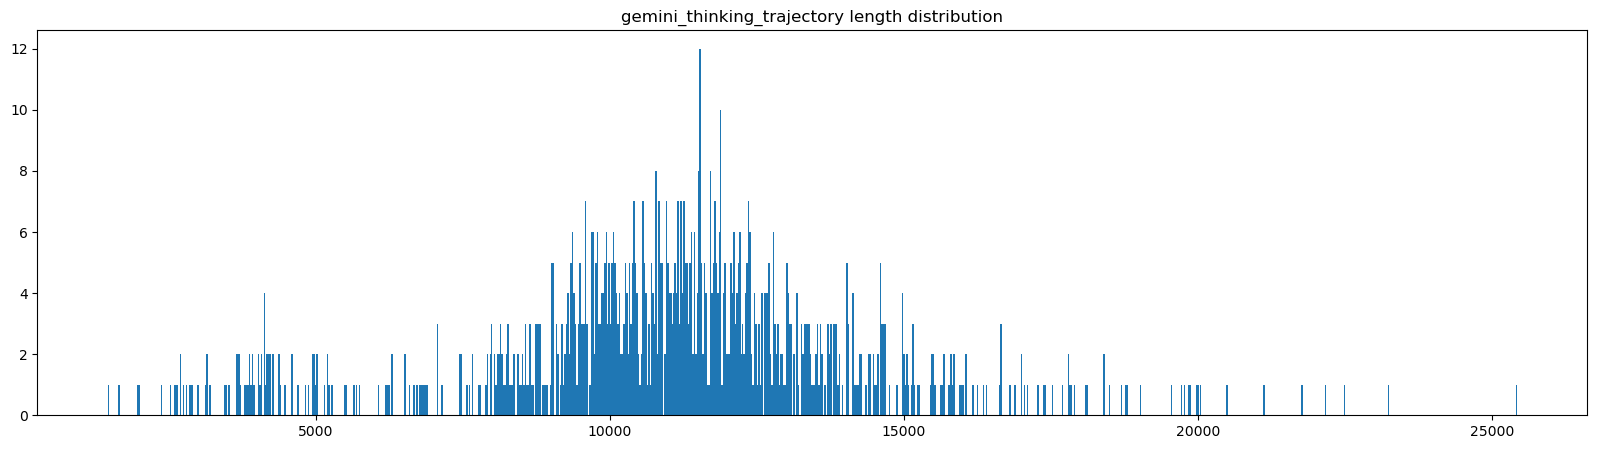

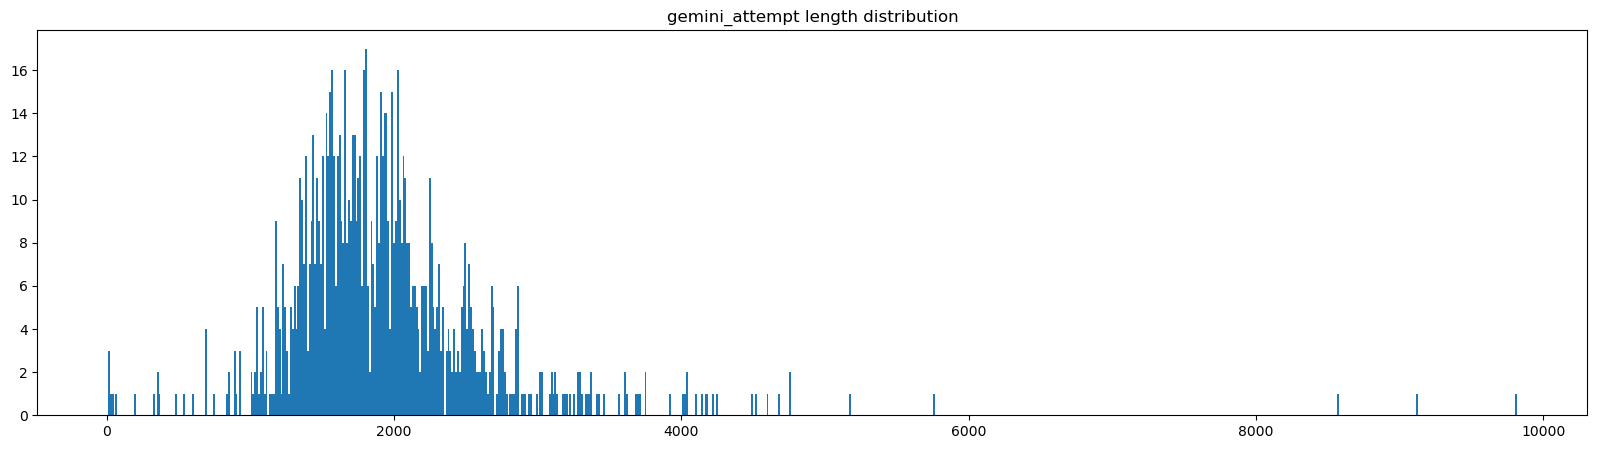

There are 1000 gemini_attempt.


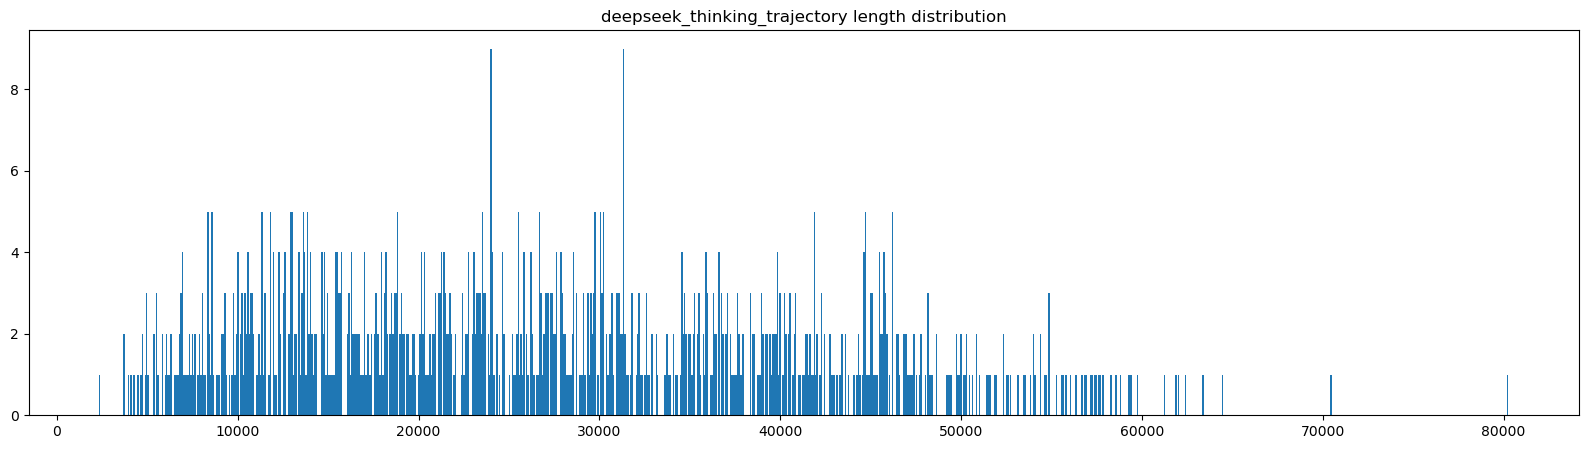

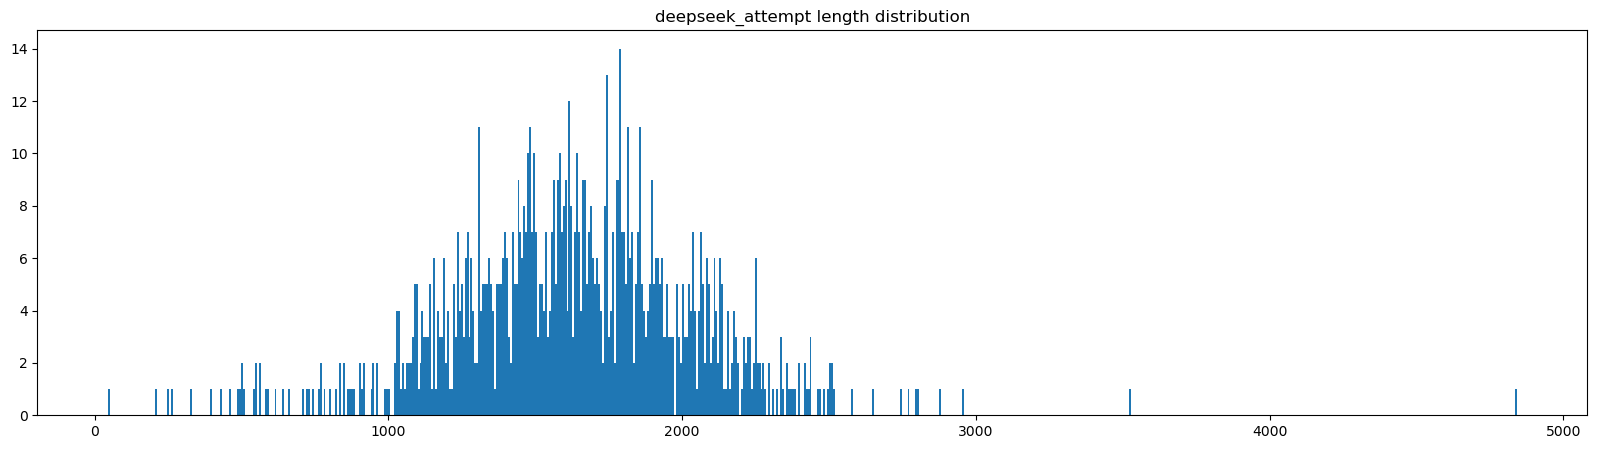

There are 1000 deepseek_attempt.


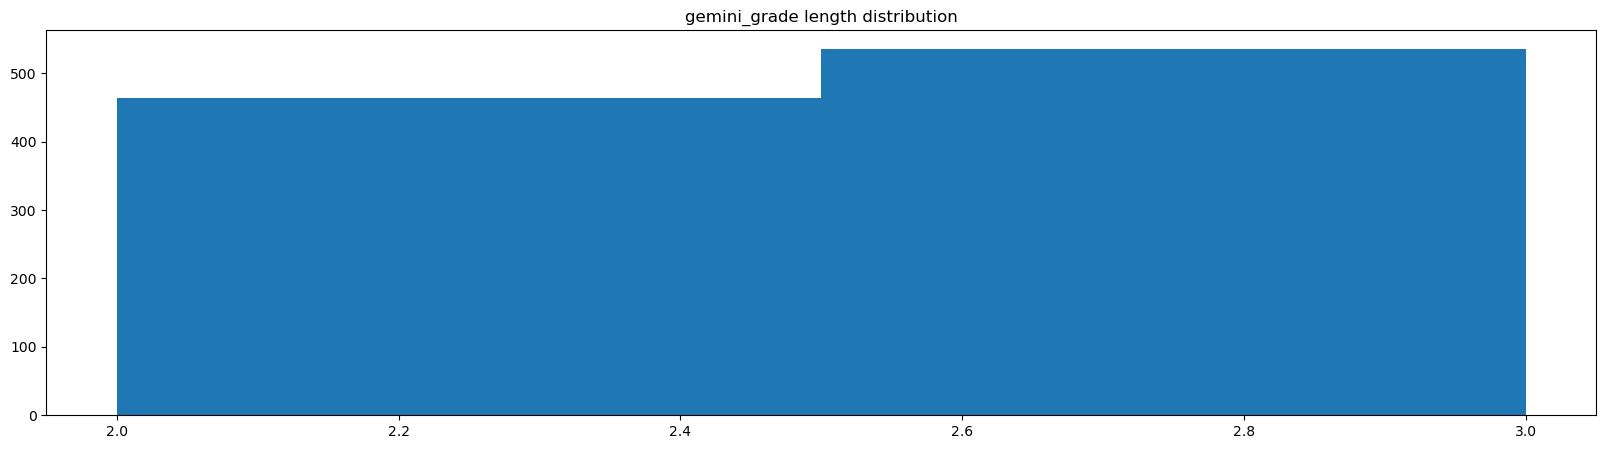

There are 2 gemini_grade.


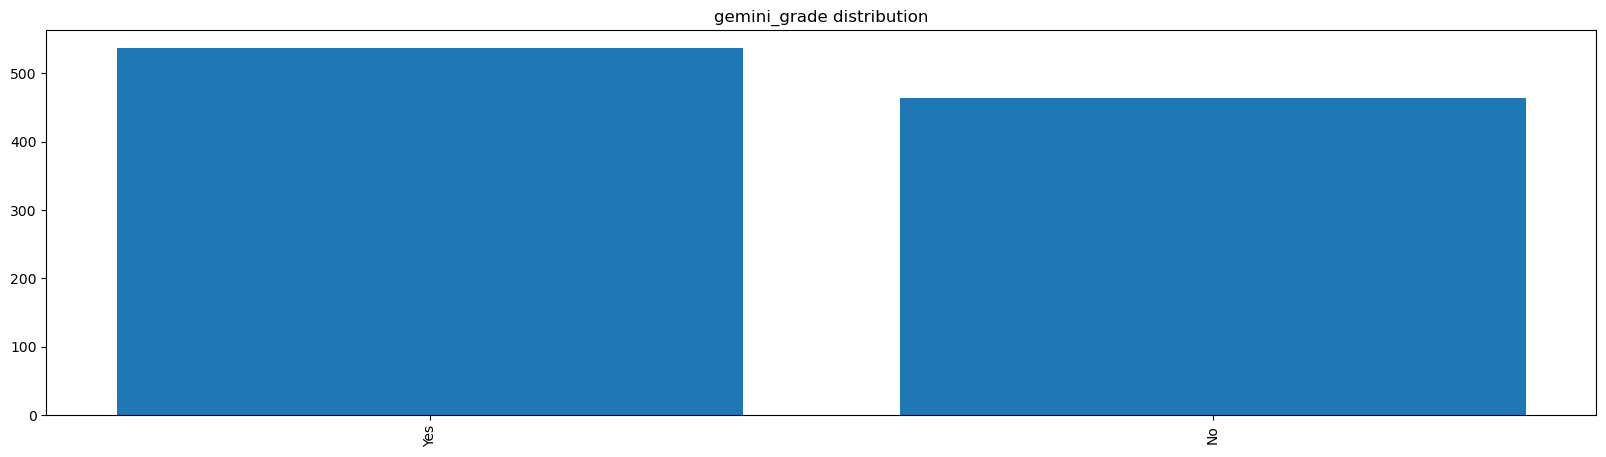

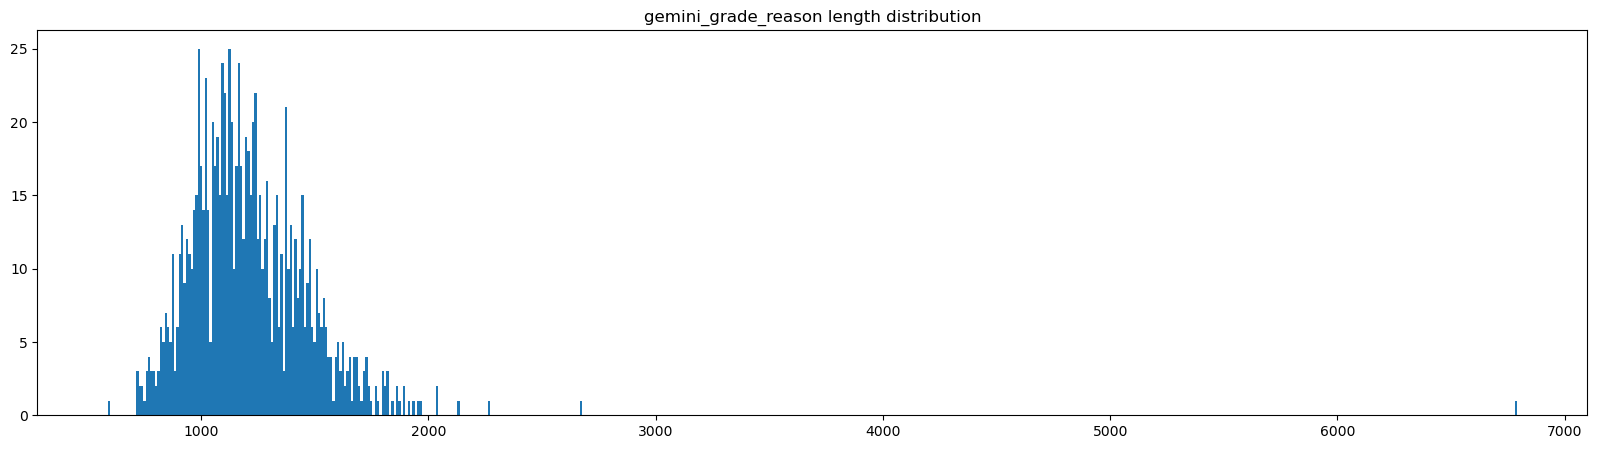

There are 1000 gemini_grade_reason.


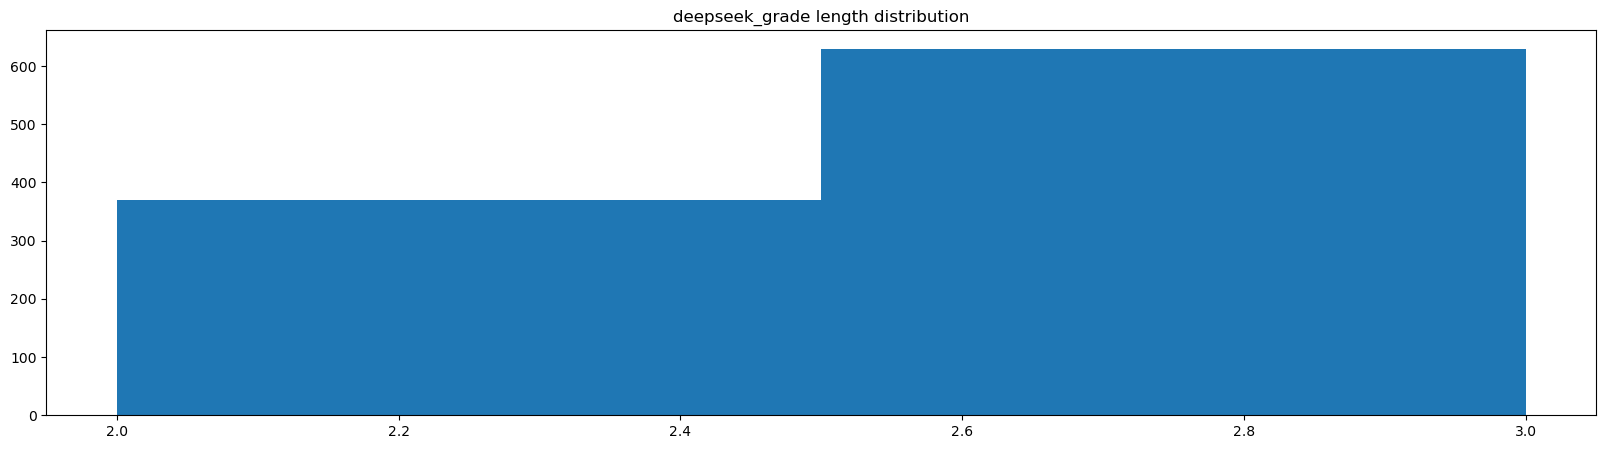

There are 2 deepseek_grade.


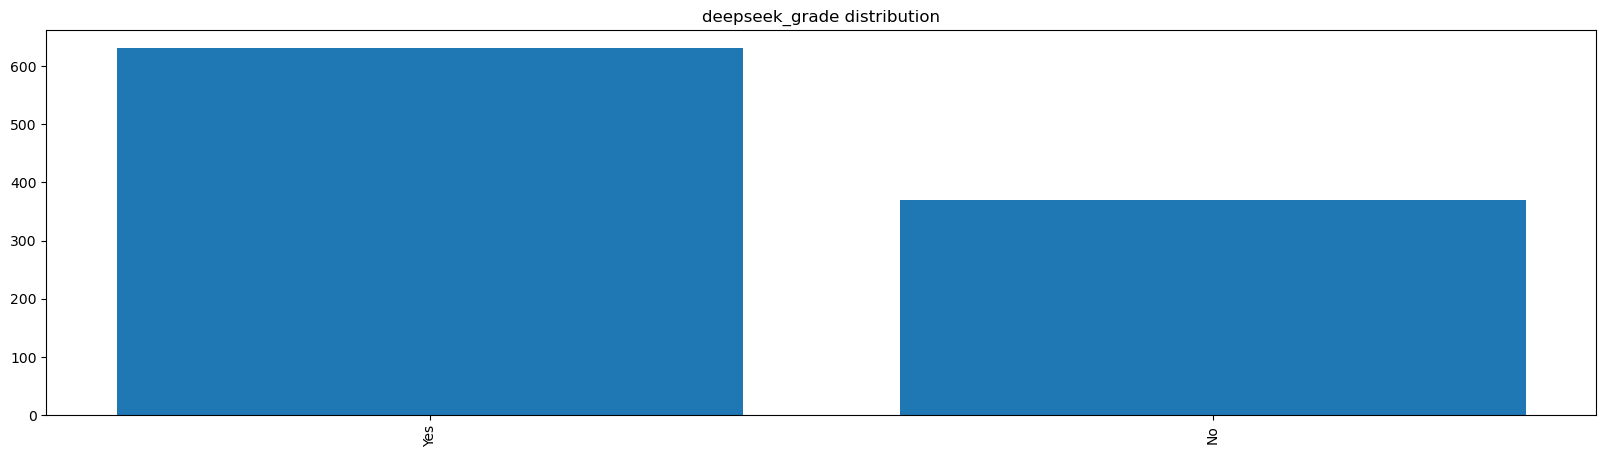

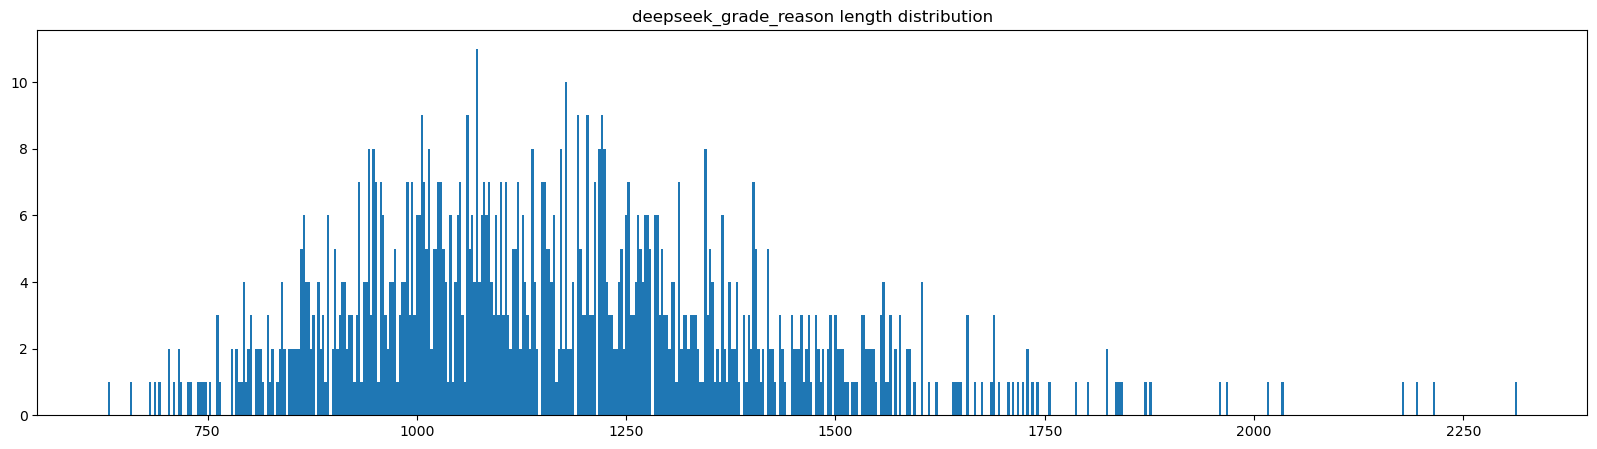

There are 1000 deepseek_grade_reason.


In [11]:
s1k_1_1 = load_data("s1K-1.1").select(range(1000))
print_distributions(s1k_1_1, ['solution', 'question', 'cot_type', 'source_type', 'metadata', 'gemini_thinking_trajectory', 'gemini_attempt', 'deepseek_thinking_trajectory', 'deepseek_attempt', 'gemini_grade', 'gemini_grade_reason', 'deepseek_grade', 'deepseek_grade_reason'])

# TODO: check models and sources

### Fusion of CoT datasets

Features: ['question', 'answer', 'solution', 'source', 'model']
Number of samples: 8876
Sample: {
    "answer": "1. Let \\( z = e^{\\frac{i\\pi}{180}} \\). Using Euler's formula, we have \\( \\sin(1^\\circ) = \\frac{z - \\frac{1}{z}}{2i} \\). Similarly, \\( \\sin(3^\\circ) = \\frac{z^3 - \\frac{1}{z^3}}{2i} \\), and \\( \\sin(9^\\circ) = \\frac{z^9 - \\frac{1}{z^9}}{2i} \\).\n\n2. We can compute their squares as follows:\n   \\[\n   \\sin^2(1^\\circ) = \\left( \\frac{z - \\frac{1}{z}}{2i} \\right)^2 = \\frac{(z - \\frac{1}{z})^2}{-4} = \\frac{z^2 + \\frac{1}{z^2} - 2}{-4}\n   \\]\n   Similarly,\n   \\[\n   \\sin^2(3^\\circ) = \\frac{z^6 + \\frac{1}{z^6} - 2}{-4}\n   \\]\n   and\n   \\[\n   \\sin^2(9^\\circ) = \\frac{z^{18} + \\frac{1}{z^{18}} - 2}{-4}\n   \\]\n\n3. The monic cubic polynomial \\( p(x) \\) with roots \\( \\sin^2(1^\\circ) \\), \\( \\sin^2(3^\\circ) \\), and \\( \\sin^2(9^\\circ) \\) can be written as:\n   \\[\n   p(x) = (x - \\sin^2(1^\\circ))(x - \\sin^2(3^\\circ))(x - 

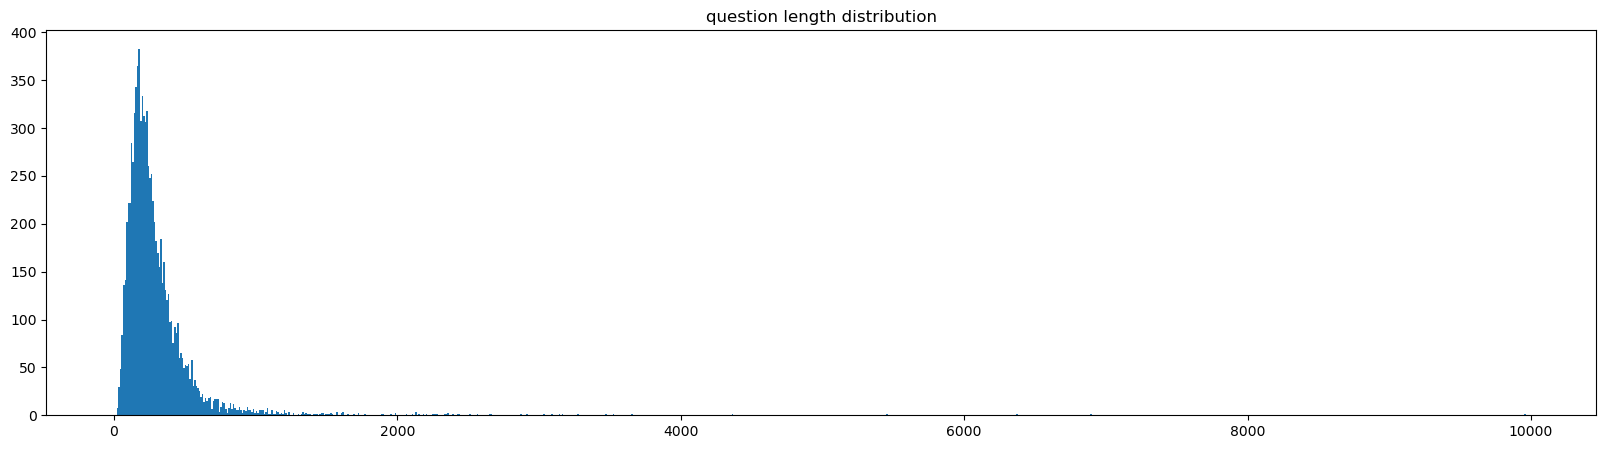

There are 7525 question.
Number of 'None' answer: 1000


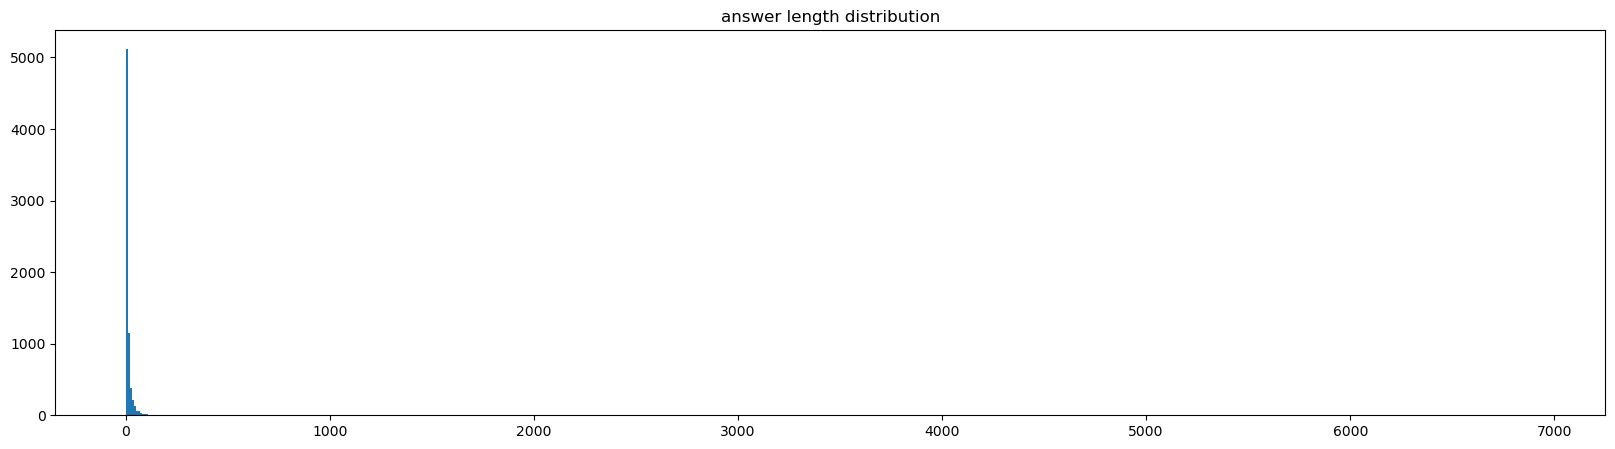

There are 3758 answer.
Number of 'None' solution: 1000


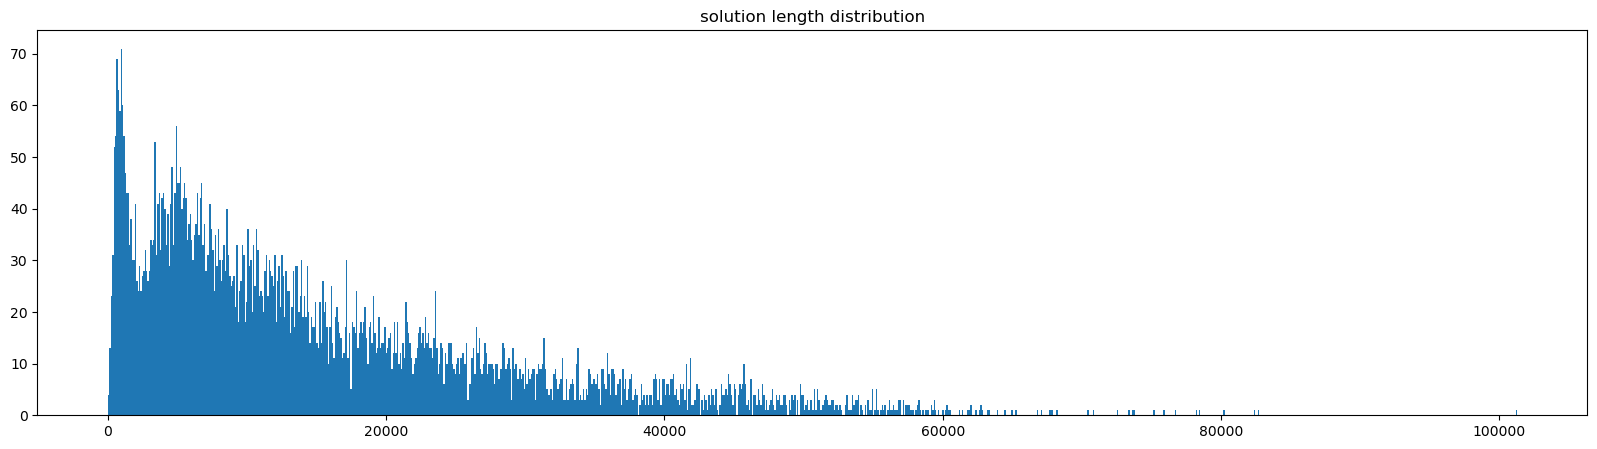

Number of 'None' source: 844


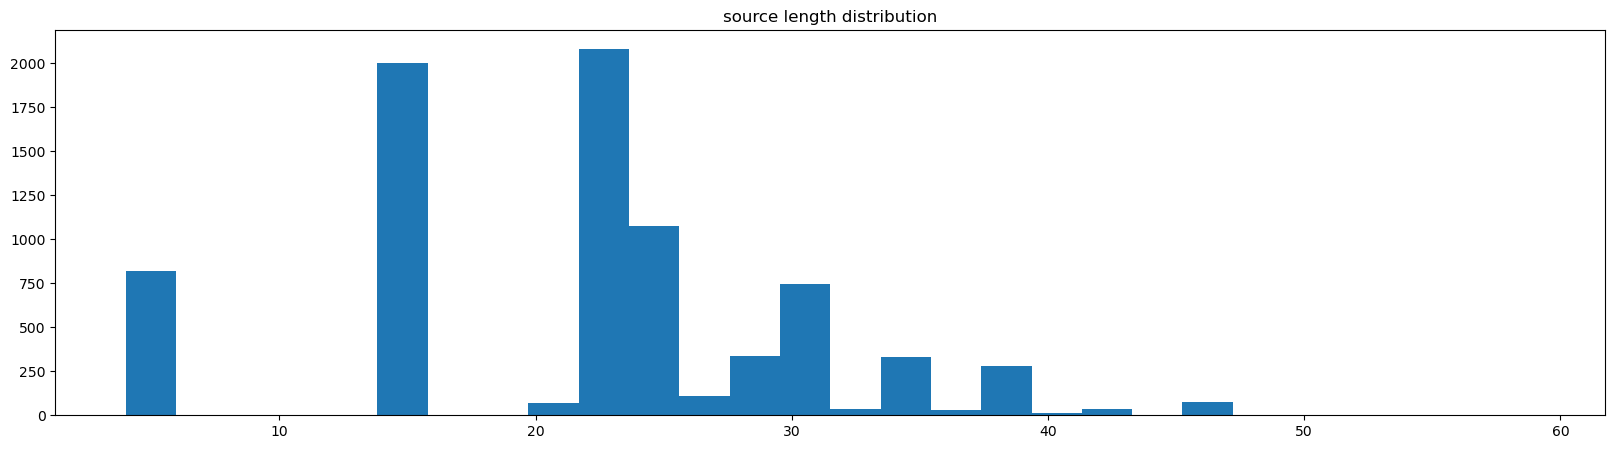

There are 61 source.


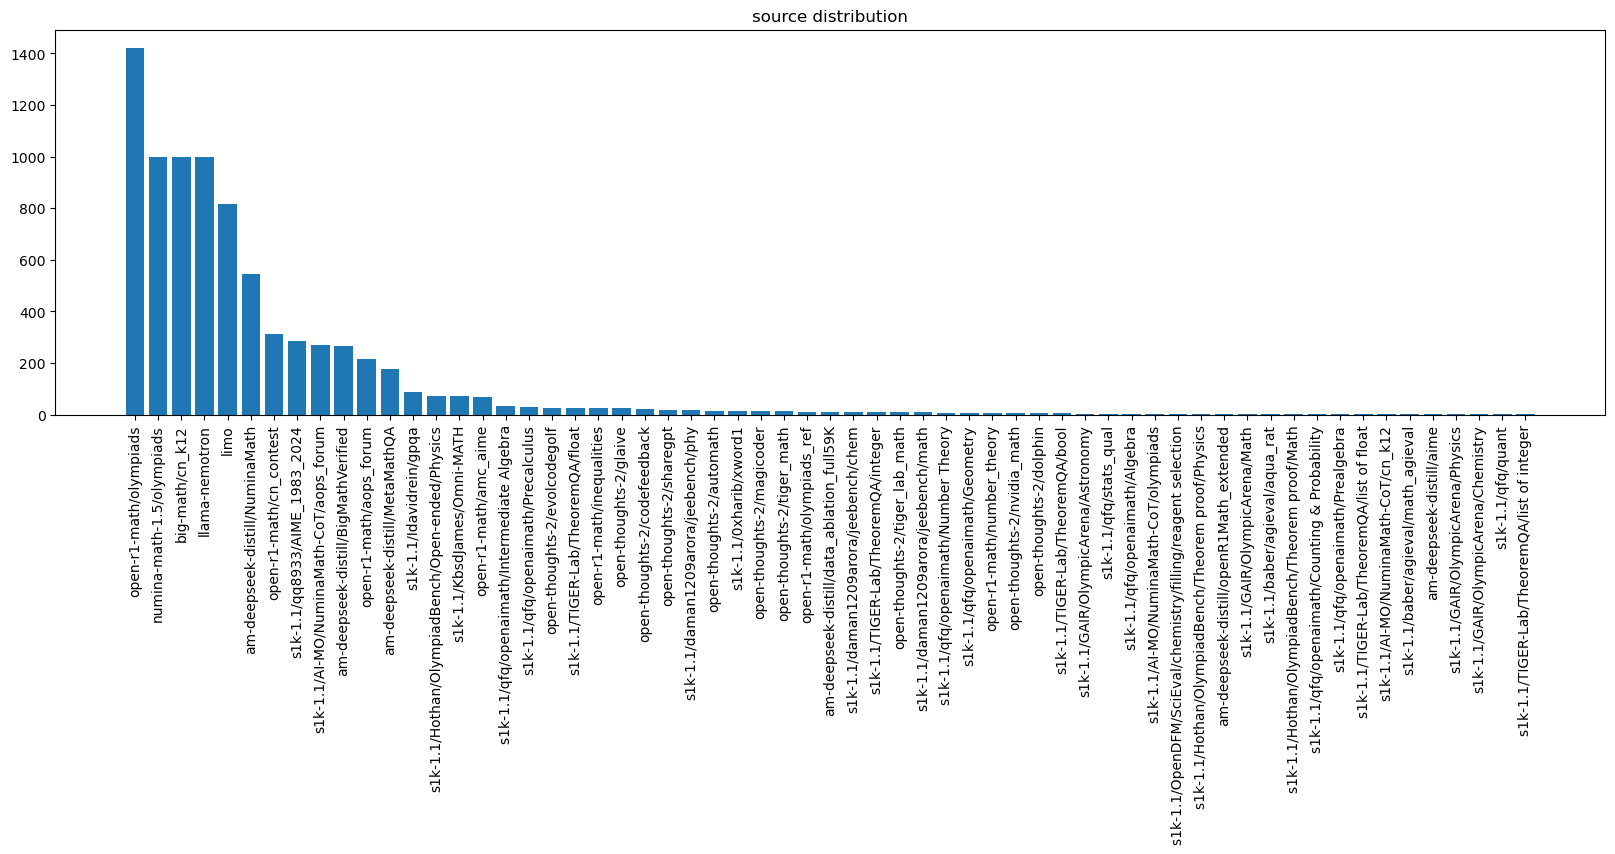

Number of 'None' model: 817


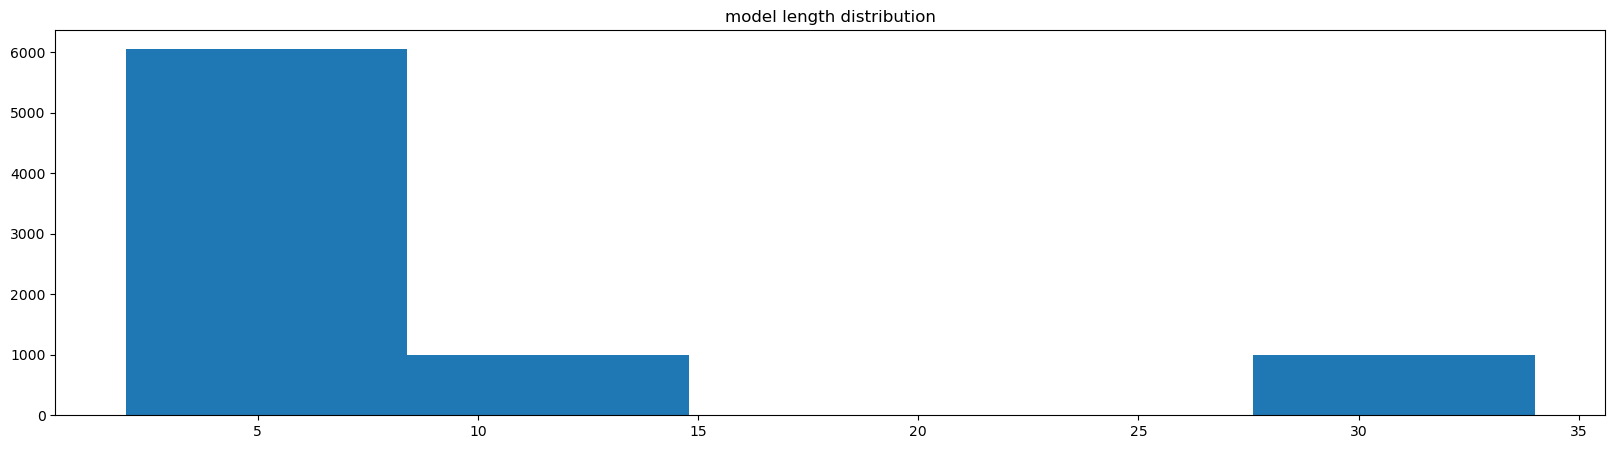

There are 6 model.


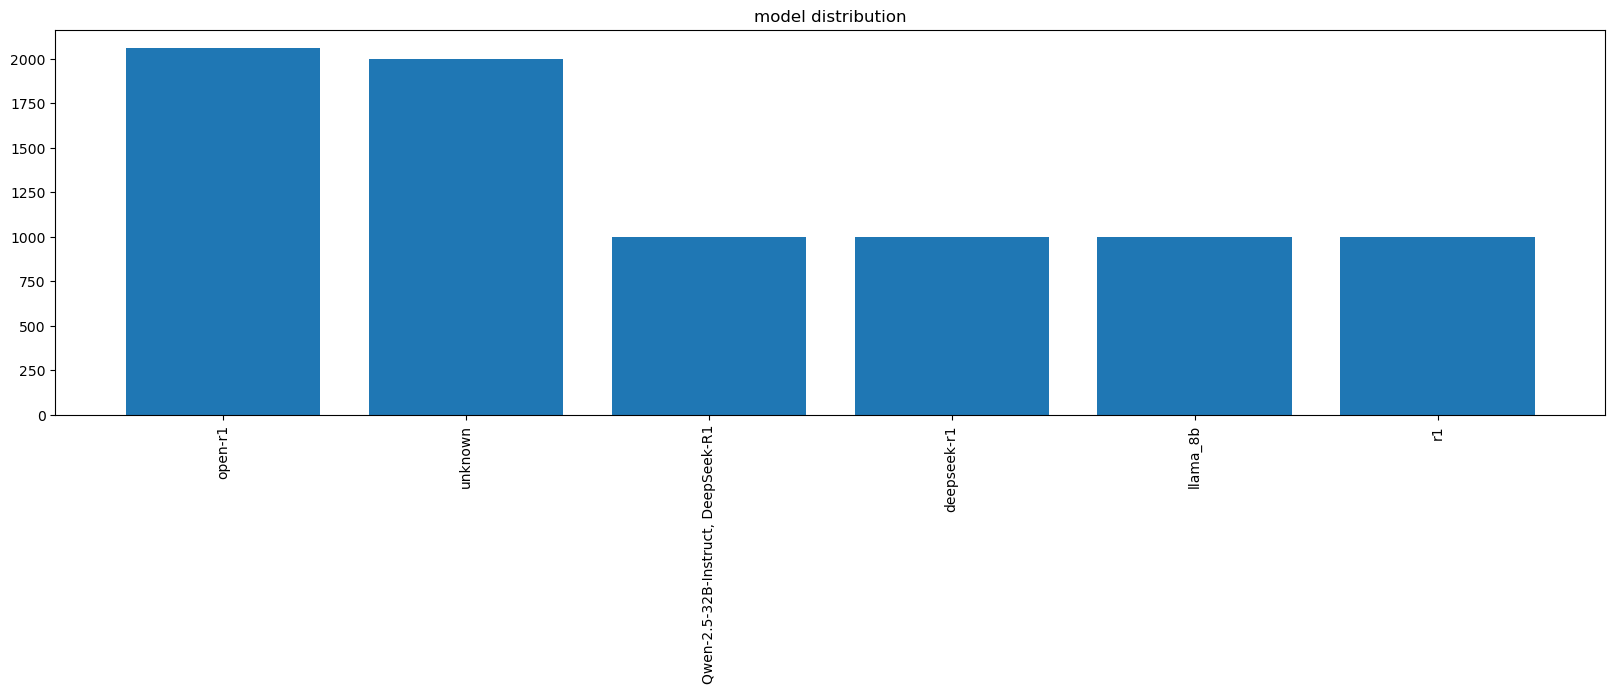

In [ ]:
cot_datasets = [
    {
        "name": "am-deepseek-distill",
        "dataset": am_deepseek_distill,
        "question": am_deepseek_distill["question"],        "answer": am_deepseek_distill["ground_truth"],
        "solution": am_deepseek_distill["answer"],
        "source": ["am-deepseek-distill/" + source for source in am_deepseek_distill["question_source"]],
        "model": am_deepseek_distill["model_name"],
    },
    {
        "name": "big-math",
        "dataset": big_math,
        "question": big_math["problem"],
        "answer": big_math["answer"],
        "solution": [None] * len(big_math),
        "source": ["big-math/" + source for source in big_math["source"]],
        "model": ["llama_8b"] * len(big_math),
    },
    {
        "name": "limo",
        "dataset": limo,
        "question": limo["question"],
        "answer": limo["answer"],
        "solution": limo["solution"],
        "source": ["limo/NuminaMath-CoT or AIME or MATH or other"] * len(limo),
        "model": ["DeepSeek R1 or DeepSeek-R1-Distill-Qwen-32B or Qwen2.5-32b-Instruct or other"] * len(limo)
    },
    {
        "name": "llama-nemotron",
        "dataset": llama_nemotron,
        "question": [x[0]["content"] for x in llama_nemotron["input"]],
        "answer": llama_nemotron["answer"],
        "solution": llama_nemotron["output"],
        "source": ["AoPS"] * len(llama_nemotron),
        "model": llama_nemotron["generator"],
    },
    {
        "name": "numina-math-1.5",
        "dataset": numina_math_1_5,
        "question": numina_math_1_5["problem"],
        "answer": numina_math_1_5["answer"],
        "solution": numina_math_1_5["solution"],
        "source": ["numina-math-1.5/" + source for source in numina_math_1_5["source"]],
        "model": ["unknown"] * len(numina_math_1_5),
    },
    {
        "name": "open-r1-math",
        "dataset": open_r1_math,
        "question": open_r1_math["problem"],
        "answer": open_r1_math["answer"],
        "solution": open_r1_math["generations"],
        "source": ["open-r1-math/" + source for source in open_r1_math["source"]],
        "model": ["open-r1"] * len(open_r1_math),
    },
    {
        "name": "open-thoughts-2",
        "dataset": open_thoughts_2,
        "question": [x[0]["value"] for x in open_thoughts_2["conversations"]],
        "answer": [None] * len(open_thoughts_2),
        "solution": [x[1]["value"] for x in open_thoughts_2["conversations"]],
        "source": ["open-thoughts-2/" + source if source is not None else None for source in open_thoughts_2["source"]],
        "model": ["unknown"] * len(open_thoughts_2),
    },
    {
        "name": "s1k-1.1",
        "dataset": s1k_1_1,
        "question": s1k_1_1["question"],
        "answer": s1k_1_1["solution"],
        "solution": s1k_1_1["deepseek_thinking_trajectory"],
        "source": ["s1k-1.1/" + source for source in s1k_1_1["source_type"]],
        "model": ["deepseek-r1"] * len(s1k_1_1),
    },
]

# Initialize an empty fused dataset
fused_dataset = {
    "question": [],
    "answer": [],
    "solution": [],
    "source": [],
    "model": [],
}

# Iterate through each dataset in cot_datasets and append its data to the fused dataset
for dataset in cot_datasets:
    print(f"Processing dataset: {dataset['name']}")
    print(dataset["dataset"][0])
    fused_dataset["question"].extend(dataset["question"])
    fused_dataset["answer"].extend(dataset["answer"])
    fused_dataset["solution"].extend(dataset["solution"])
    fused_dataset["source"].extend(dataset["source"])
    fused_dataset["model"].extend(dataset["model"])

# Convert the fused dataset dictionary to a Hugging Face Dataset object
fused_dataset = Dataset.from_dict(fused_dataset)

print_distributions(fused_dataset, ['question', 'answer', 'solution', 'source', 'model'])